# LIBS


In [3]:
install.packages(c("tseries", "ggplot2", "ggfortify", "xgboost","data.table", "readxl", "writexl", "dplyr", "VIM", "zoo", "lubridate", "forecast", "Metrics"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
library(tseries)
library(ggplot2)
library(ggfortify)
library(data.table)
library(readxl)
library(writexl)
library(VIM)
library(zoo)
library(lubridate)
library(forecast)
library(Metrics)

In [5]:
install.packages("reshape2")

library(reshape2)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’



Attaching package: ‘reshape2’


The following objects are masked from ‘package:data.table’:

    dcast, melt




In [6]:
install.packages("e1071")
library(e1071)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘e1071’


The following object is masked from ‘package:ggplot2’:

    element




In [7]:
install.packages("xgboost")
library(xgboost)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



#Import misingdata

In [8]:
data_miss <- read_excel("/content/DATA TOPIC 4.xlsx", sheet = 2)[1]
data_miss

New names:
• `` -> `...2`
• `` -> `...3`
• `` -> `...4`
• `` -> `...5`
• `` -> `...6`


Salinity_PSU
1   12.91       
2   15.00       
3   14.28       
4      NA       
5    6.42       
6    7.65       
7    4.57       
8    7.57       
9   10.27       
10   9.13       
11  11.32       
12  12.91       
13     NA       
14  13.36       
15  13.56       
16  12.57       
17   9.21       
18   8.19       
19   8.00       
20   8.39       
21   9.74       
22  11.49       
23  11.06       
24  14.18       
25  12.75       
26  13.36       
27     NA       
28  11.57       
29   6.86       
30   5.14       
⋮   ⋮           
93   9.18       
94  11.18       
95     NA       
96  14.03       
97  12.92       
98  12.64       
99     NA       
100 12.62       
101  7.64       
102  4.02       
103  7.71       
104 10.60       
105  8.98       
106 10.03       
107 12.18       
108 11.14       
109    NA       
110 12.39       
111 13.57       
112 14.24       
113  6.26       
114  6.50       
115  8.01       
116  8.28       
117  7.63       
118  9.67       
119    NA       
120 10.97       
121 13.72       
122 13.45

#check missing data

In [9]:
data_miss_ts = ts(data_miss,frequency=12, start=c(2015,1))
print (data_miss_ts)

       Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov   Dec
2015 12.91 15.00 14.28    NA  6.42  7.65  4.57  7.57 10.27  9.13 11.32 12.91
2016    NA 13.36 13.56 12.57  9.21  8.19  8.00  8.39  9.74 11.49 11.06 14.18
2017 12.75 13.36    NA 11.57  6.86  5.14  6.74  5.20  7.23  9.30    NA 12.83
2018 14.00 14.69 13.12 13.28  6.19  4.27  6.61  8.57  9.34  9.99    NA 13.41
2019 14.98 16.24 12.71 11.96  8.74  5.20  7.03  9.07  9.89    NA 13.50 14.07
2020 13.23 14.79 14.31    NA  8.42  6.81  7.05  7.77  7.80 10.20 12.47 12.17
2021    NA 12.90 11.88 14.04  6.60  5.87  6.16  6.39    NA  9.31 13.66 13.81
2022    NA 12.91 13.27 11.79  9.09  6.16  8.15  6.73  9.18 11.18    NA 14.03
2023 12.92 12.64    NA 12.62  7.64  4.02  7.71 10.60  8.98 10.03 12.18 11.14
2024    NA 12.39 13.57 14.24  6.26  6.50  8.01  8.28  7.63  9.67    NA 10.97
2025 13.72 13.45                                                            


In [10]:
sum(is.na(data_miss_ts))

[1] 14

In [11]:
percentage_na = (sum(is.na(data_miss_ts)) / length(data_miss_ts)) * 100
percentage_na

[1] 11.47541

#test data and OG data

In [12]:
dataOG <- read_excel("/content/DATA TOPIC 4.xlsx", sheet = 1)[1]
dataOG

New names:
• `` -> `...2`
• `` -> `...3`


Salinity_PSU
1   12.91       
2   15.00       
3   14.28       
4   11.49       
5    6.42       
6    7.65       
7    4.57       
8    7.57       
9   10.27       
10   9.13       
11  11.32       
12  12.91       
13  15.49       
14  13.36       
15  13.56       
16  12.57       
17   9.21       
18   8.19       
19   8.00       
20   8.39       
21   9.74       
22  11.49       
23  11.06       
24  14.18       
25  12.75       
26  13.36       
27  14.91       
28  11.57       
29   6.86       
30   5.14       
⋮   ⋮           
97  12.92       
98  12.64       
99  14.38       
100 12.62       
101  7.64       
102  4.02       
103  7.71       
104 10.60       
105  8.98       
106 10.03       
107 12.18       
108 11.14       
109 14.43       
110 12.39       
111 13.57       
112 14.24       
113  6.26       
114  6.50       
115  8.01       
116  8.28       
117  7.63       
118  9.67       
119 13.96       
120 10.97       
121 13.72       
122 13.45       
123 14.12       
124 13.75       
125  8.61       
126  5.73

       Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov   Dec
2015 12.91 15.00 14.28 11.49  6.42  7.65  4.57  7.57 10.27  9.13 11.32 12.91
2016 15.49 13.36 13.56 12.57  9.21  8.19  8.00  8.39  9.74 11.49 11.06 14.18
2017 12.75 13.36 14.91 11.57  6.86  5.14  6.74  5.20  7.23  9.30 12.93 12.83
2018 14.00 14.69 13.12 13.28  6.19  4.27  6.61  8.57  9.34  9.99 14.39 13.41
2019 14.98 16.24 12.71 11.96  8.74  5.20  7.03  9.07  9.89 11.75 13.50 14.07
2020 13.23 14.79 14.31 11.67  8.42  6.81  7.05  7.77  7.80 10.20 12.47 12.17
2021 15.16 12.90 11.88 14.04  6.60  5.87  6.16  6.39 10.26  9.31 13.66 13.81
2022 13.69 12.91 13.27 11.79  9.09  6.16  8.15  6.73  9.18 11.18 11.66 14.03
2023 12.92 12.64 14.38 12.62  7.64  4.02  7.71 10.60  8.98 10.03 12.18 11.14
2024 14.43 12.39 13.57 14.24  6.26  6.50  8.01  8.28  7.63  9.67 13.96 10.97
2025 13.72 13.45 14.12 13.75  8.61  5.73                                    


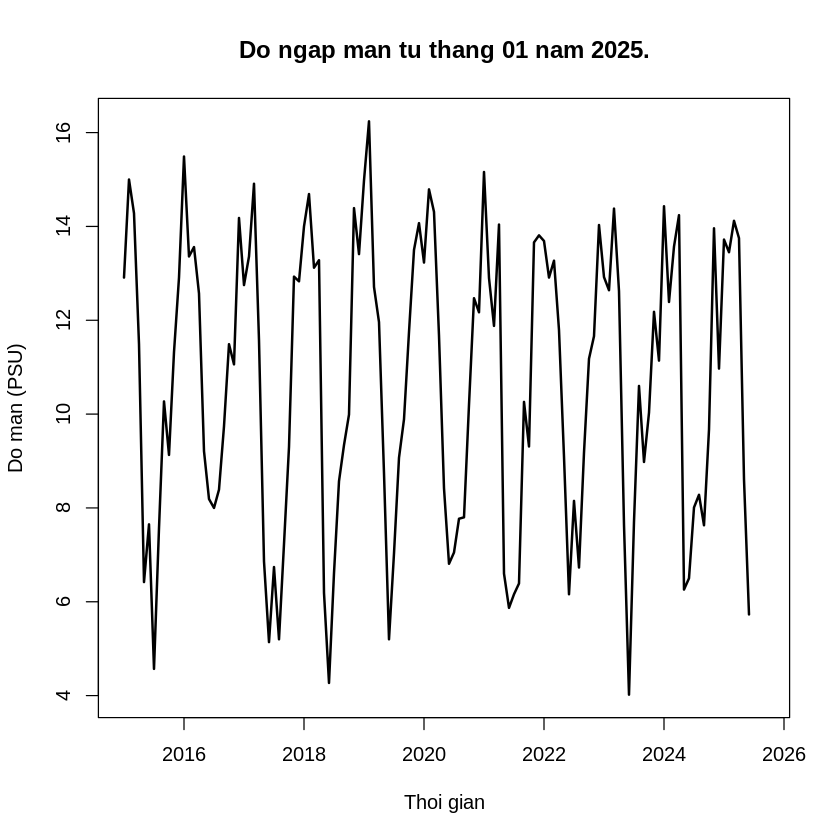

In [13]:
dataOG_ts = ts(dataOG, frequency = 12, start = c(2015, 1))
print(dataOG_ts)

plot(dataOG_ts, xlim = c(2015, 2025 + 8/12), lwd = 2, ylab = "Do man (PSU)", xlab = "Thoi gian", main = "Do ngap man tu thang 01 nam 2025.")

In [14]:

dlss <- window(dataOG_ts, end = c(2025, 2))
test <- window(dataOG_ts, start = c(2025, 3))
print(dlss)
print(test)

       Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov   Dec
2015 12.91 15.00 14.28 11.49  6.42  7.65  4.57  7.57 10.27  9.13 11.32 12.91
2016 15.49 13.36 13.56 12.57  9.21  8.19  8.00  8.39  9.74 11.49 11.06 14.18
2017 12.75 13.36 14.91 11.57  6.86  5.14  6.74  5.20  7.23  9.30 12.93 12.83
2018 14.00 14.69 13.12 13.28  6.19  4.27  6.61  8.57  9.34  9.99 14.39 13.41
2019 14.98 16.24 12.71 11.96  8.74  5.20  7.03  9.07  9.89 11.75 13.50 14.07
2020 13.23 14.79 14.31 11.67  8.42  6.81  7.05  7.77  7.80 10.20 12.47 12.17
2021 15.16 12.90 11.88 14.04  6.60  5.87  6.16  6.39 10.26  9.31 13.66 13.81
2022 13.69 12.91 13.27 11.79  9.09  6.16  8.15  6.73  9.18 11.18 11.66 14.03
2023 12.92 12.64 14.38 12.62  7.64  4.02  7.71 10.60  8.98 10.03 12.18 11.14
2024 14.43 12.39 13.57 14.24  6.26  6.50  8.01  8.28  7.63  9.67 13.96 10.97
2025 13.72 13.45                                                            
       Mar   Apr   May   Jun
2025 14.12 13.75  8.61  5.73


#datasets for missing methods

In [15]:
data_mean <- copy(data_miss_ts)
data_li <- copy(data_miss_ts)
data_knn <- copy(data_miss_ts)

In [16]:
miss_index <- which(is.na(data_miss_ts))
miss_index

[1]   4  13  27  35  47  58  64  73  81  85  95  99 109 119

#MEAN

In [17]:
data_mean[is.na(data_mean)] <- mean(data_mean, na.rm = TRUE)
print(paste0("mean= ", mean(data_mean, na.rm = TRUE)))
print("Data after replacing missing values with mean:")
data_mean

[1] "mean= 10.3048148148148"
[1] "Data after replacing missing values with mean:"


Jan      Feb      Mar      Apr      May      Jun      Jul      Aug     
2015 12.91000 15.00000 14.28000 10.30481  6.42000  7.65000  4.57000  7.57000
2016 10.30481 13.36000 13.56000 12.57000  9.21000  8.19000  8.00000  8.39000
2017 12.75000 13.36000 10.30481 11.57000  6.86000  5.14000  6.74000  5.20000
2018 14.00000 14.69000 13.12000 13.28000  6.19000  4.27000  6.61000  8.57000
2019 14.98000 16.24000 12.71000 11.96000  8.74000  5.20000  7.03000  9.07000
2020 13.23000 14.79000 14.31000 10.30481  8.42000  6.81000  7.05000  7.77000
2021 10.30481 12.90000 11.88000 14.04000  6.60000  5.87000  6.16000  6.39000
2022 10.30481 12.91000 13.27000 11.79000  9.09000  6.16000  8.15000  6.73000
2023 12.92000 12.64000 10.30481 12.62000  7.64000  4.02000  7.71000 10.60000
2024 10.30481 12.39000 13.57000 14.24000  6.26000  6.50000  8.01000  8.28000
2025 13.72000 13.45000                                                      
     Sep      Oct      Nov      Dec     
2015 10.27000  9.13000 11.32000 12.91000
2016  9.74000 11.49000 11.06000 14.18000
2017  7.23000  9.30000 10.30481 12.83000
2018  9.34000  9.99000 10.30481 13.41000
2019  9.89000 10.30481 13.50000 14.07000
2020  7.80000 10.20000 12.47000 12.17000
2021 10.30481  9.31000 13.66000 13.81000
2022  9.18000 11.18000 10.30481 14.03000
2023  8.98000 10.03000 12.18000 11.14000
2024  7.63000  9.67000 10.30481 10.97000
2025

#LI

In [18]:
data_li_interp <- approx(1:length(data_li), data_li, xout = 1:length(data_li))$y
data_li_interpts = ts(data_li_interp, frequency=12, start=c(2015, 1))
data_li_interpts

Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep    Oct   
2015 12.910 15.000 14.280 10.350  6.420  7.650  4.570  7.570 10.270  9.130
2016 13.135 13.360 13.560 12.570  9.210  8.190  8.000  8.390  9.740 11.490
2017 12.750 13.360 12.465 11.570  6.860  5.140  6.740  5.200  7.230  9.300
2018 14.000 14.690 13.120 13.280  6.190  4.270  6.610  8.570  9.340  9.990
2019 14.980 16.240 12.710 11.960  8.740  5.200  7.030  9.070  9.890 11.695
2020 13.230 14.790 14.310 11.365  8.420  6.810  7.050  7.770  7.800 10.200
2021 12.535 12.900 11.880 14.040  6.600  5.870  6.160  6.390  7.850  9.310
2022 13.360 12.910 13.270 11.790  9.090  6.160  8.150  6.730  9.180 11.180
2023 12.920 12.640 12.630 12.620  7.640  4.020  7.710 10.600  8.980 10.030
2024 11.765 12.390 13.570 14.240  6.260  6.500  8.010  8.280  7.630  9.670
2025 13.720 13.450                                                        
     Nov    Dec   
2015 11.320 12.910
2016 11.060 14.180
2017 11.065 12.830
2018 11.700 13.410
2019 13.500 14.070
2020 12.470 12.170
2021 13.660 13.810
2022 12.605 14.030
2023 12.180 11.140
2024 10.320 10.970
2025

#KNNI

In [19]:
data_knn

Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov   Dec  
2015 12.91 15.00 14.28    NA  6.42  7.65  4.57  7.57 10.27  9.13 11.32 12.91
2016    NA 13.36 13.56 12.57  9.21  8.19  8.00  8.39  9.74 11.49 11.06 14.18
2017 12.75 13.36    NA 11.57  6.86  5.14  6.74  5.20  7.23  9.30    NA 12.83
2018 14.00 14.69 13.12 13.28  6.19  4.27  6.61  8.57  9.34  9.99    NA 13.41
2019 14.98 16.24 12.71 11.96  8.74  5.20  7.03  9.07  9.89    NA 13.50 14.07
2020 13.23 14.79 14.31    NA  8.42  6.81  7.05  7.77  7.80 10.20 12.47 12.17
2021    NA 12.90 11.88 14.04  6.60  5.87  6.16  6.39    NA  9.31 13.66 13.81
2022    NA 12.91 13.27 11.79  9.09  6.16  8.15  6.73  9.18 11.18    NA 14.03
2023 12.92 12.64    NA 12.62  7.64  4.02  7.71 10.60  8.98 10.03 12.18 11.14
2024    NA 12.39 13.57 14.24  6.26  6.50  8.01  8.28  7.63  9.67    NA 10.97
2025 13.72 13.45

In [20]:
data_knn_df <- data.frame(
  time = as.numeric(time(data_knn)),
  value = as.numeric(data_knn)
)


In [21]:
data_knn_df <- data.frame(time = 1:nrow(data_knn_df), salinity = data_knn_df$value)
data_knn_df

time salinity
1    1   12.91   
2    2   15.00   
3    3   14.28   
4    4      NA   
5    5    6.42   
6    6    7.65   
7    7    4.57   
8    8    7.57   
9    9   10.27   
10  10    9.13   
11  11   11.32   
12  12   12.91   
13  13      NA   
14  14   13.36   
15  15   13.56   
16  16   12.57   
17  17    9.21   
18  18    8.19   
19  19    8.00   
20  20    8.39   
21  21    9.74   
22  22   11.49   
23  23   11.06   
24  24   14.18   
25  25   12.75   
26  26   13.36   
27  27      NA   
28  28   11.57   
29  29    6.86   
30  30    5.14   
⋮   ⋮    ⋮       
93   93   9.18   
94   94  11.18   
95   95     NA   
96   96  14.03   
97   97  12.92   
98   98  12.64   
99   99     NA   
100 100  12.62   
101 101   7.64   
102 102   4.02   
103 103   7.71   
104 104  10.60   
105 105   8.98   
106 106  10.03   
107 107  12.18   
108 108  11.14   
109 109     NA   
110 110  12.39   
111 111  13.57   
112 112  14.24   
113 113   6.26   
114 114   6.50   
115 115   8.01   
116 116   8.28   
117 117   7.63   
118 118   9.67   
119 119     NA   
120 120  10.97   
121 121  13.72   
122 122  13.45

In [22]:
data_imputed <- kNN(data_knn_df, variable = "salinity", k = 4, imp_var = FALSE)
data_imputed

time time 
   1  122 


time salinity
1    1   12.910  
2    2   15.000  
3    3   14.280  
4    4   10.965  
5    5    6.420  
6    6    7.650  
7    7    4.570  
8    8    7.570  
9    9   10.270  
10  10    9.130  
11  11   11.320  
12  12   12.910  
13  13   13.135  
14  14   13.360  
15  15   13.560  
16  16   12.570  
17  17    9.210  
18  18    8.190  
19  19    8.000  
20  20    8.390  
21  21    9.740  
22  22   11.490  
23  23   11.060  
24  24   14.180  
25  25   12.750  
26  26   13.360  
27  27   12.160  
28  28   11.570  
29  29    6.860  
30  30    5.140  
⋮   ⋮    ⋮       
93   93   9.180  
94   94  11.180  
95   95  12.050  
96   96  14.030  
97   97  12.920  
98   98  12.640  
99   99  12.630  
100 100  12.620  
101 101   7.640  
102 102   4.020  
103 103   7.710  
104 104  10.600  
105 105   8.980  
106 106  10.030  
107 107  12.180  
108 108  11.140  
109 109  12.285  
110 110  12.390  
111 111  13.570  
112 112  14.240  
113 113   6.260  
114 114   6.500  
115 115   8.010  
116 116   8.280  
117 117   7.630  
118 118   9.670  
119 119  10.320  
120 120  10.970  
121 121  13.720  
122 122  13.450

In [23]:
data_knn_ts = ts(data_imputed$salinity, frequency = 12, start = c(2015, 1))
data_knn_ts

Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep    Oct   
2015 12.910 15.000 14.280 10.965  6.420  7.650  4.570  7.570 10.270  9.130
2016 13.135 13.360 13.560 12.570  9.210  8.190  8.000  8.390  9.740 11.490
2017 12.750 13.360 12.160 11.570  6.860  5.140  6.740  5.200  7.230  9.300
2018 14.000 14.690 13.120 13.280  6.190  4.270  6.610  8.570  9.340  9.990
2019 14.980 16.240 12.710 11.960  8.740  5.200  7.030  9.070  9.890 11.695
2020 13.230 14.790 14.310 11.365  8.420  6.810  7.050  7.770  7.800 10.200
2021 12.320 12.900 11.880 14.040  6.600  5.870  6.160  6.390  7.850  9.310
2022 13.465 12.910 13.270 11.790  9.090  6.160  8.150  6.730  9.180 11.180
2023 12.920 12.640 12.630 12.620  7.640  4.020  7.710 10.600  8.980 10.030
2024 12.285 12.390 13.570 14.240  6.260  6.500  8.010  8.280  7.630  9.670
2025 13.720 13.450                                                        
     Nov    Dec   
2015 11.320 12.910
2016 11.060 14.180
2017 11.065 12.830
2018 11.700 13.410
2019 13.500 14.070
2020 12.470 12.170
2021 13.660 13.810
2022 12.050 14.030
2023 12.180 11.140
2024 10.320 10.970
2025

#svmi

In [24]:
data_svm <- data_knn_df

data_complete <- na.omit(data_svm)

svm_model <- svm(salinity ~ time, data = data_complete)

missing_index <- which(is.na(data_svm$salinity))

if (length(missing_index) > 0) {
  new_data <- data.frame(time = data_svm$time[missing_index])
  pred_values <- predict(svm_model, newdata = new_data)
  data_svm$salinity[missing_index] <- pred_values
} else {
  print("No values to predict.")
}

# check
print("Data after filling in missing values using SVM:")
data_svm

[1] "Data after filling in missing values using SVM:"


time salinity 
1    1   12.910000
2    2   15.000000
3    3   14.280000
4    4   10.805116
5    5    6.420000
6    6    7.650000
7    7    4.570000
8    8    7.570000
9    9   10.270000
10  10    9.130000
11  11   11.320000
12  12   12.910000
13  13   10.387945
14  14   13.360000
15  15   13.560000
16  16   12.570000
17  17    9.210000
18  18    8.190000
19  19    8.000000
20  20    8.390000
21  21    9.740000
22  22   11.490000
23  23   11.060000
24  24   14.180000
25  25   12.750000
26  26   13.360000
27  27    9.863188
28  28   11.570000
29  29    6.860000
30  30    5.140000
⋮   ⋮    ⋮        
93   93   9.18000 
94   94  11.18000 
95   95  10.41906 
96   96  14.03000 
97   97  12.92000 
98   98  12.64000 
99   99  10.37399 
100 100  12.62000 
101 101   7.64000 
102 102   4.02000 
103 103   7.71000 
104 104  10.60000 
105 105   8.98000 
106 106  10.03000 
107 107  12.18000 
108 108  11.14000 
109 109  10.34195 
110 110  12.39000 
111 111  13.57000 
112 112  14.24000 
113 113   6.26000 
114 114   6.50000 
115 115   8.01000 
116 116   8.28000 
117 117   7.63000 
118 118   9.67000 
119 119  10.47313 
120 120  10.97000 
121 121  13.72000 
122 122  13.45000

In [25]:
data_svm_ts <- ts(data_svm$salinity,start = c(2015, 1),frequency = 12)
data_svm_ts

Jan       Feb       Mar       Apr       May       Jun       Jul      
2015 12.910000 15.000000 14.280000 10.805116  6.420000  7.650000  4.570000
2016 10.387945 13.360000 13.560000 12.570000  9.210000  8.190000  8.000000
2017 12.750000 13.360000  9.863188 11.570000  6.860000  5.140000  6.740000
2018 14.000000 14.690000 13.120000 13.280000  6.190000  4.270000  6.610000
2019 14.980000 16.240000 12.710000 11.960000  8.740000  5.200000  7.030000
2020 13.230000 14.790000 14.310000 10.386458  8.420000  6.810000  7.050000
2021 10.541123 12.900000 11.880000 14.040000  6.600000  5.870000  6.160000
2022 10.537067 12.910000 13.270000 11.790000  9.090000  6.160000  8.150000
2023 12.920000 12.640000 10.373988 12.620000  7.640000  4.020000  7.710000
2024 10.341954 12.390000 13.570000 14.240000  6.260000  6.500000  8.010000
2025 13.720000 13.450000                                                  
     Aug       Sep       Oct       Nov       Dec      
2015  7.570000 10.270000  9.130000 11.320000 12.910000
2016  8.390000  9.740000 11.490000 11.060000 14.180000
2017  5.200000  7.230000  9.300000  9.759690 12.830000
2018  8.570000  9.340000  9.990000  9.909457 13.410000
2019  9.070000  9.890000 10.223948 13.500000 14.070000
2020  7.770000  7.800000 10.200000 12.470000 12.170000
2021  6.390000 10.562744  9.310000 13.660000 13.810000
2022  6.730000  9.180000 11.180000 10.419056 14.030000
2023 10.600000  8.980000 10.030000 12.180000 11.140000
2024  8.280000  7.630000  9.670000 10.473128 10.970000
2025

#compare methods

In [26]:
compare_results <- data.frame(
  Method = c("Mean", "Linear Interpolation", "KNNI", "SVMI"),
  MAE  = c(
    mae(dlss, data_mean),
    mae(dlss, data_li_interpts),
    mae(dlss, data_knn_ts),
    mae(dlss, data_svm_ts)

  ),
  RMSE = c(
    rmse(dlss, data_mean),
    rmse(dlss, data_li_interpts),
    rmse(dlss, data_knn_ts),
    rmse(dlss, data_svm_ts)

  ),
  MAPE = c(
    mape(dlss, data_mean),
    mape(dlss, data_li_interpts),
    mape(dlss, data_knn_ts),
    mape(dlss, data_svm_ts)
  ) * 100
)
print(compare_results)


                Method       MAE      RMSE     MAPE
1                 Mean 0.3441985 1.1483654 2.453187
2 Linear Interpolation 0.2067213 0.7056505 1.522580
3                 KNNI 0.1962705 0.6965022 1.432260
4                 SVMI 0.3458248 1.1590624 2.464317


#time series data

        Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep    Oct
2015 12.910 15.000 14.280 10.350  6.420  7.650  4.570  7.570 10.270  9.130
2016 13.135 13.360 13.560 12.570  9.210  8.190  8.000  8.390  9.740 11.490
2017 12.750 13.360 12.465 11.570  6.860  5.140  6.740  5.200  7.230  9.300
2018 14.000 14.690 13.120 13.280  6.190  4.270  6.610  8.570  9.340  9.990
2019 14.980 16.240 12.710 11.960  8.740  5.200  7.030  9.070  9.890 11.695
2020 13.230 14.790 14.310 11.365  8.420  6.810  7.050  7.770  7.800 10.200
2021 12.535 12.900 11.880 14.040  6.600  5.870  6.160  6.390  7.850  9.310
2022 13.360 12.910 13.270 11.790  9.090  6.160  8.150  6.730  9.180 11.180
2023 12.920 12.640 12.630 12.620  7.640  4.020  7.710 10.600  8.980 10.030
2024 11.765 12.390 13.570 14.240  6.260  6.500  8.010  8.280  7.630  9.670
2025 13.720 13.450                                                        
        Nov    Dec
2015 11.320 12.910
2016 11.060 14.180
2017 11.065 12.830
2018 11.700 13.410
2019 

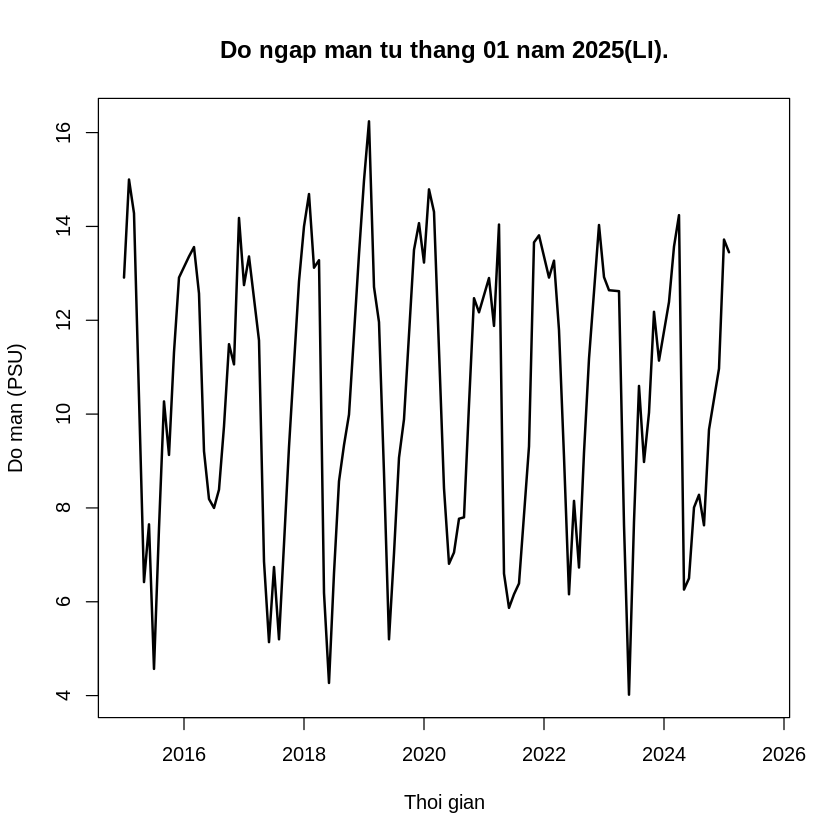

In [27]:
DL_LI = ts(data_li_interpts, frequency = 12, start = c(2015, 1))
print(data_li_interpts)

plot(data_li_interpts, xlim = c(2015, 2025 + 8/12), lwd = 2, ylab = "Do man (PSU)", xlab = "Thoi gian", main = "Do ngap man tu thang 01 nam 2025(LI).")

        Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep    Oct
2015 12.910 15.000 14.280 10.965  6.420  7.650  4.570  7.570 10.270  9.130
2016 13.135 13.360 13.560 12.570  9.210  8.190  8.000  8.390  9.740 11.490
2017 12.750 13.360 12.160 11.570  6.860  5.140  6.740  5.200  7.230  9.300
2018 14.000 14.690 13.120 13.280  6.190  4.270  6.610  8.570  9.340  9.990
2019 14.980 16.240 12.710 11.960  8.740  5.200  7.030  9.070  9.890 11.695
2020 13.230 14.790 14.310 11.365  8.420  6.810  7.050  7.770  7.800 10.200
2021 12.320 12.900 11.880 14.040  6.600  5.870  6.160  6.390  7.850  9.310
2022 13.465 12.910 13.270 11.790  9.090  6.160  8.150  6.730  9.180 11.180
2023 12.920 12.640 12.630 12.620  7.640  4.020  7.710 10.600  8.980 10.030
2024 12.285 12.390 13.570 14.240  6.260  6.500  8.010  8.280  7.630  9.670
2025 13.720 13.450                                                        
        Nov    Dec
2015 11.320 12.910
2016 11.060 14.180
2017 11.065 12.830
2018 11.700 13.410
2019 

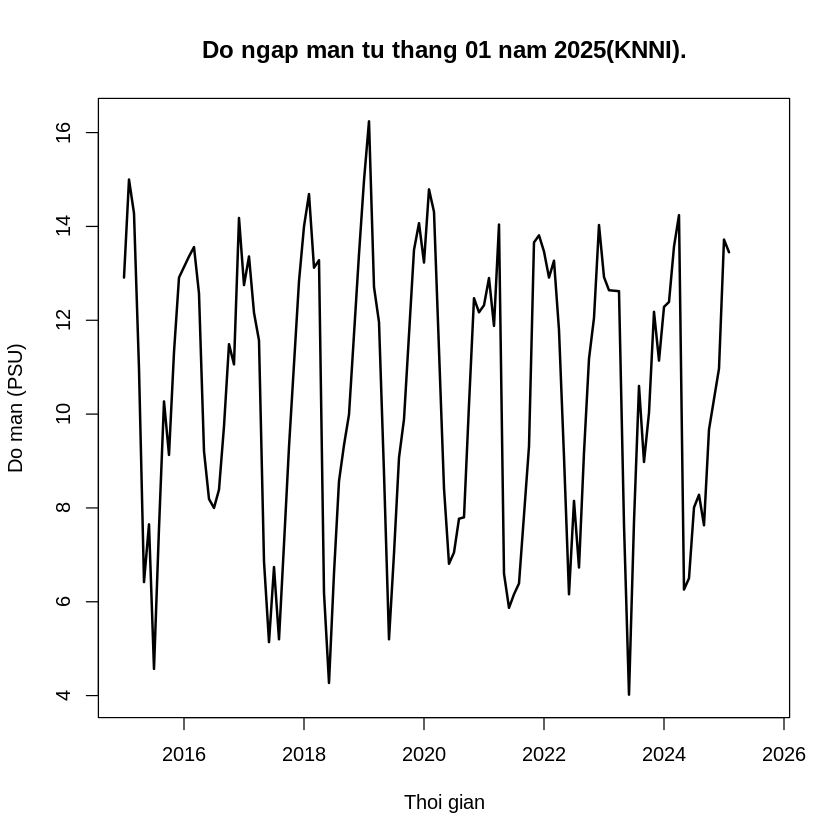

In [28]:
DL_KNN = ts(data_knn_ts, frequency = 12, start = c(2015, 1))
print(data_knn_ts)

plot(data_knn_ts, xlim = c(2015, 2025 + 8/12), lwd = 2, ylab = "Do man (PSU)", xlab = "Thoi gian", main = "Do ngap man tu thang 01 nam 2025(KNNI).")

           Jan       Feb       Mar       Apr       May       Jun       Jul
2015 12.910000 15.000000 14.280000 10.805116  6.420000  7.650000  4.570000
2016 10.387945 13.360000 13.560000 12.570000  9.210000  8.190000  8.000000
2017 12.750000 13.360000  9.863188 11.570000  6.860000  5.140000  6.740000
2018 14.000000 14.690000 13.120000 13.280000  6.190000  4.270000  6.610000
2019 14.980000 16.240000 12.710000 11.960000  8.740000  5.200000  7.030000
2020 13.230000 14.790000 14.310000 10.386458  8.420000  6.810000  7.050000
2021 10.541123 12.900000 11.880000 14.040000  6.600000  5.870000  6.160000
2022 10.537067 12.910000 13.270000 11.790000  9.090000  6.160000  8.150000
2023 12.920000 12.640000 10.373988 12.620000  7.640000  4.020000  7.710000
2024 10.341954 12.390000 13.570000 14.240000  6.260000  6.500000  8.010000
2025 13.720000 13.450000                                                  
           Aug       Sep       Oct       Nov       Dec
2015  7.570000 10.270000  9.130000 11.320000 

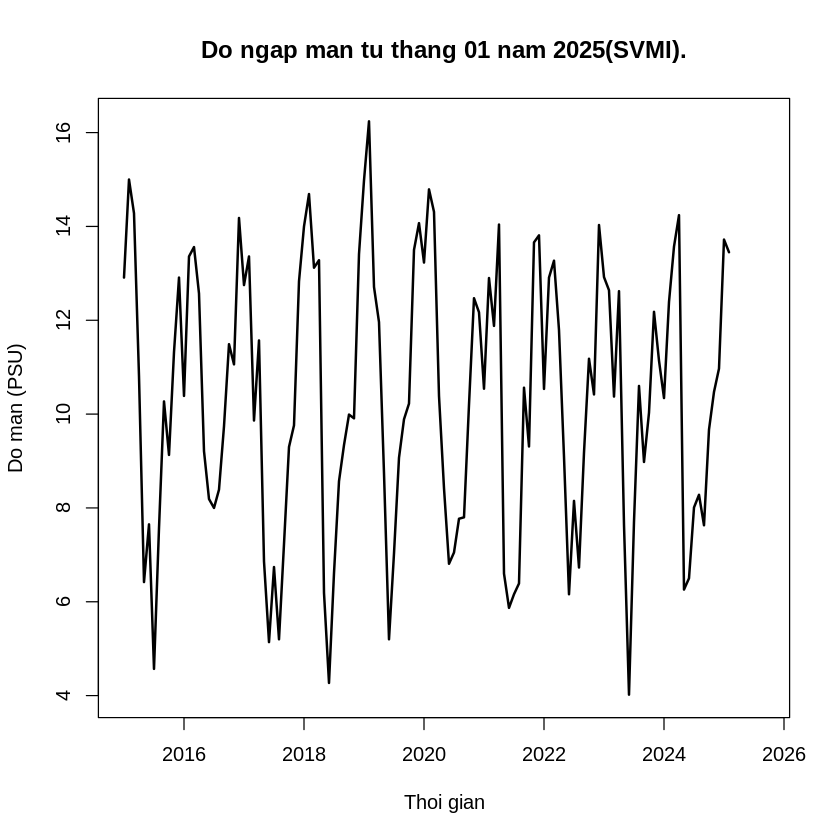

In [29]:
DL_SVM = ts(data_svm_ts, frequency = 12, start = c(2015, 1))
print(data_svm_ts)

plot(data_svm_ts, xlim = c(2015, 2025 + 8/12), lwd = 2, ylab = "Do man (PSU)", xlab = "Thoi gian", main = "Do ngap man tu thang 01 nam 2025(SVMI).")

#Stationarity Tests & Differencing LI


In [30]:
adf_DL_LI=adf.test(DL_LI)
print(adf_DL_LI)
kpss_DL_LI= kpss.test(DL_LI)
print(kpss_DL_LI)

Warning message in adf.test(DL_LI):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  DL_LI
Dickey-Fuller = -9.1038, Lag order = 4, p-value = 0.01
alternative hypothesis: stationary



Warning message in kpss.test(DL_LI):
“p-value greater than printed p-value”



	KPSS Test for Level Stationarity

data:  DL_LI
KPSS Level = 0.015557, Truncation lag parameter = 4, p-value = 0.1



#Stationarity Tests & Differencing KNNI


In [31]:
adf_DL_KNN=adf.test(DL_KNN)
print(adf_DL_KNN)
kpss_DL_KNN= kpss.test(DL_KNN)
print(kpss_DL_KNN)

Warning message in adf.test(DL_KNN):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  DL_KNN
Dickey-Fuller = -9.0688, Lag order = 4, p-value = 0.01
alternative hypothesis: stationary



Warning message in kpss.test(DL_KNN):
“p-value greater than printed p-value”



	KPSS Test for Level Stationarity

data:  DL_KNN
KPSS Level = 0.015728, Truncation lag parameter = 4, p-value = 0.1



#Stationarity Tests & Differencing SVMI


In [32]:
adf_DL_SVM=adf.test(DL_SVM)
print(adf_DL_SVM)
kpss_DL_SVM= kpss.test(DL_SVM)
print(kpss_DL_SVM)

Warning message in adf.test(DL_SVM):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  DL_SVM
Dickey-Fuller = -8.3713, Lag order = 4, p-value = 0.01
alternative hypothesis: stationary



Warning message in kpss.test(DL_SVM):
“p-value greater than printed p-value”



	KPSS Test for Level Stationarity

data:  DL_SVM
KPSS Level = 0.016408, Truncation lag parameter = 4, p-value = 0.1



#Decomposition & Seasonal Adjustment LI

Jan        Feb        Mar        Apr        May        Jun       
2015  2.7241960  3.2166497  2.5850293  2.1414182 -2.7925633 -4.6511744
2016  2.7241960  3.2166497  2.5850293  2.1414182 -2.7925633 -4.6511744
2017  2.7241960  3.2166497  2.5850293  2.1414182 -2.7925633 -4.6511744
2018  2.7241960  3.2166497  2.5850293  2.1414182 -2.7925633 -4.6511744
2019  2.7241960  3.2166497  2.5850293  2.1414182 -2.7925633 -4.6511744
2020  2.7241960  3.2166497  2.5850293  2.1414182 -2.7925633 -4.6511744
2021  2.7241960  3.2166497  2.5850293  2.1414182 -2.7925633 -4.6511744
2022  2.7241960  3.2166497  2.5850293  2.1414182 -2.7925633 -4.6511744
2023  2.7241960  3.2166497  2.5850293  2.1414182 -2.7925633 -4.6511744
2024  2.7241960  3.2166497  2.5850293  2.1414182 -2.7925633 -4.6511744
2025  2.7241960  3.2166497                                            
     Jul        Aug        Sep        Oct        Nov        Dec       
2015 -3.4151698 -2.5580864 -1.5053873 -0.1817762  1.7159552  2.7209090
2016 -3.4151698 -2.5580864 -1.5053873 -0.1817762  1.7159552  2.7209090
2017 -3.4151698 -2.5580864 -1.5053873 -0.1817762  1.7159552  2.7209090
2018 -3.4151698 -2.5580864 -1.5053873 -0.1817762  1.7159552  2.7209090
2019 -3.4151698 -2.5580864 -1.5053873 -0.1817762  1.7159552  2.7209090
2020 -3.4151698 -2.5580864 -1.5053873 -0.1817762  1.7159552  2.7209090
2021 -3.4151698 -2.5580864 -1.5053873 -0.1817762  1.7159552  2.7209090
2022 -3.4151698 -2.5580864 -1.5053873 -0.1817762  1.7159552  2.7209090
2023 -3.4151698 -2.5580864 -1.5053873 -0.1817762  1.7159552  2.7209090
2024 -3.4151698 -2.5580864 -1.5053873 -0.1817762  1.7159552  2.7209090
2025

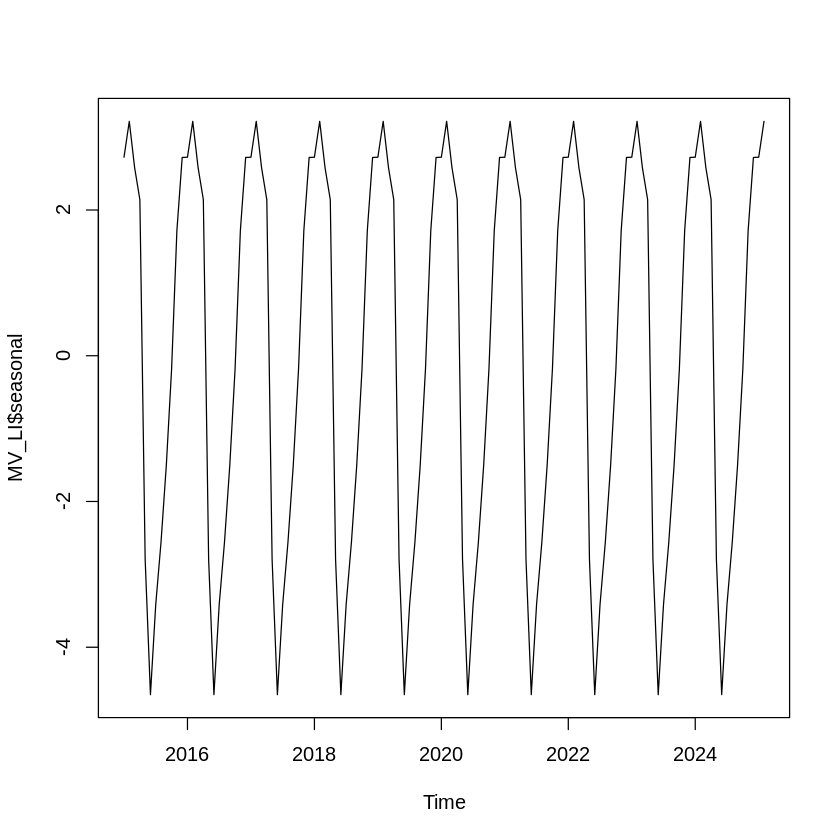

In [33]:
MV_LI= decompose(DL_LI)
MV_LI$seasonal
plot(MV_LI$seasonal)

In [34]:
KhuMua_LI = DL_LI - MV_LI$seasonal

plot(KhuMua_LI,
     xlim = c(2015, 2025),
     lwd = 2,
     ylab = "Do man(PSU)",
     xlab = "Thoi gian",
     main = "Do ngap man tu thang 01 nam 2025")
print(KhuMua_LI)

           Jan       Feb       Mar       Apr       May       Jun       Jul
2015 10.185804 11.783350 11.694971  8.208582  9.212563 12.301174  7.985170
2016 10.410804 10.143350 10.974971 10.428582 12.002563 12.841174 11.415170
2017 10.025804 10.143350  9.879971  9.428582  9.652563  9.791174 10.155170
2018 11.275804 11.473350 10.534971 11.138582  8.982563  8.921174 10.025170
2019 12.255804 13.023350 10.124971  9.818582 11.532563  9.851174 10.445170
2020 10.505804 11.573350 11.724971  9.223582 11.212563 11.461174 10.465170
2021  9.810804  9.683350  9.294971 11.898582  9.392563 10.521174  9.575170
2022 10.635804  9.693350 10.684971  9.648582 11.882563 10.811174 11.565170
2023 10.195804  9.423350 10.044971 10.478582 10.432563  8.671174 11.125170
2024  9.040804  9.173350 10.984971 12.098582  9.052563 11.151174 11.425170
2025 10.995804 10.233350                                                  
           Aug       Sep       Oct       Nov       Dec
2015 10.128086 11.775387  9.311776  9.604045 

In [35]:
adf_DL_LIkm= adf.test(KhuMua_LI)
print(adf_DL_LIkm)
kpss_DL_LIkm= kpss.test(KhuMua_LI)
print(kpss_DL_LIkm)

Warning message in adf.test(KhuMua_LI):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  KhuMua_LI
Dickey-Fuller = -4.4744, Lag order = 4, p-value = 0.01
alternative hypothesis: stationary



Warning message in kpss.test(KhuMua_LI):
“p-value greater than printed p-value”



	KPSS Test for Level Stationarity

data:  KhuMua_LI
KPSS Level = 0.090707, Truncation lag parameter = 4, p-value = 0.1



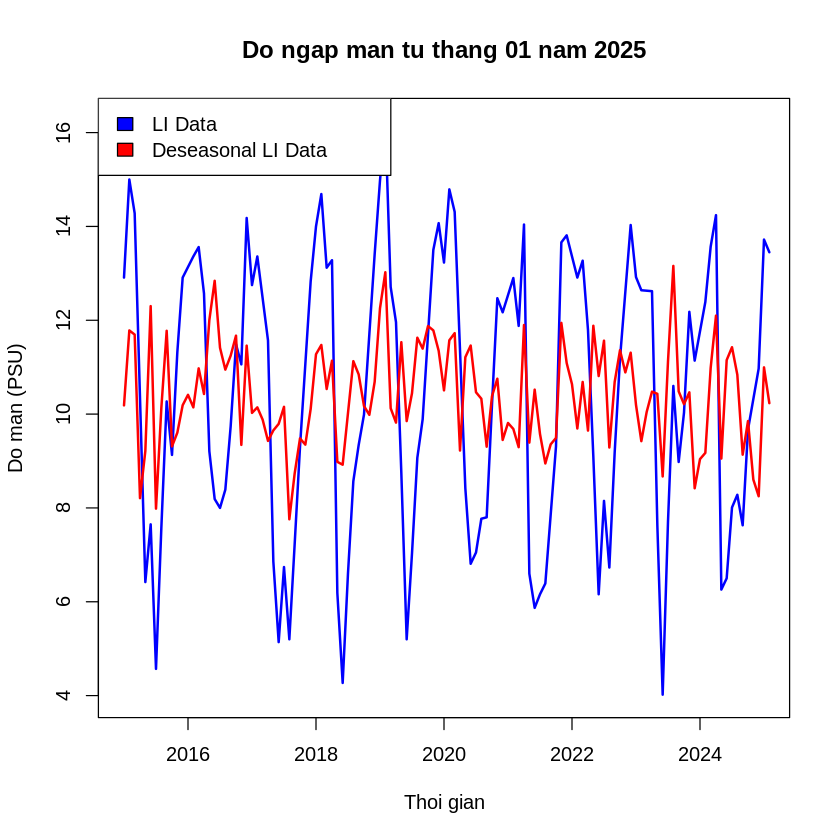

In [36]:
x = ts(DL_LI, start = c(2015), frequency = 12)
y = ts(KhuMua_LI,start=c(2015), frequency = 12)
ts.plot(x,y, lwd=2,col = c("blue","red"),xlim=c(2015,2025),
        ylab="Do man (PSU)",xlab="Thoi gian",
        main="Do ngap man tu thang 01 nam 2025")
legend("topleft" , legend = c("LI Data", "Deseasonal LI Data"), fill = c("blue","red"))

#Decomposition & Seasonal Adjustment KNNI

In [37]:
MV_KNN= decompose(DL_KNN)
MV_KNN$seasonal
plot(MV_KNN$seasonal)

Jan        Feb        Mar        Apr        May        Jun       
2015  2.7755536  3.2224518  2.5569425  2.1472203 -2.7867612 -4.6453723
2016  2.7755536  3.2224518  2.5569425  2.1472203 -2.7867612 -4.6453723
2017  2.7755536  3.2224518  2.5569425  2.1472203 -2.7867612 -4.6453723
2018  2.7755536  3.2224518  2.5569425  2.1472203 -2.7867612 -4.6453723
2019  2.7755536  3.2224518  2.5569425  2.1472203 -2.7867612 -4.6453723
2020  2.7755536  3.2224518  2.5569425  2.1472203 -2.7867612 -4.6453723
2021  2.7755536  3.2224518  2.5569425  2.1472203 -2.7867612 -4.6453723
2022  2.7755536  3.2224518  2.5569425  2.1472203 -2.7867612 -4.6453723
2023  2.7755536  3.2224518  2.5569425  2.1472203 -2.7867612 -4.6453723
2024  2.7755536  3.2224518  2.5569425  2.1472203 -2.7867612 -4.6453723
2025  2.7755536  3.2224518                                            
     Jul        Aug        Sep        Oct        Nov        Dec       
2015 -3.4149093 -2.5578260 -1.5052797 -0.1788214  1.6600907  2.7267110
2016 -3.4149093 -2.5578260 -1.5052797 -0.1788214  1.6600907  2.7267110
2017 -3.4149093 -2.5578260 -1.5052797 -0.1788214  1.6600907  2.7267110
2018 -3.4149093 -2.5578260 -1.5052797 -0.1788214  1.6600907  2.7267110
2019 -3.4149093 -2.5578260 -1.5052797 -0.1788214  1.6600907  2.7267110
2020 -3.4149093 -2.5578260 -1.5052797 -0.1788214  1.6600907  2.7267110
2021 -3.4149093 -2.5578260 -1.5052797 -0.1788214  1.6600907  2.7267110
2022 -3.4149093 -2.5578260 -1.5052797 -0.1788214  1.6600907  2.7267110
2023 -3.4149093 -2.5578260 -1.5052797 -0.1788214  1.6600907  2.7267110
2024 -3.4149093 -2.5578260 -1.5052797 -0.1788214  1.6600907  2.7267110
2025

           Jan       Feb       Mar       Apr       May       Jun       Jul
2015 10.134446 11.777548 11.723057  8.817780  9.206761 12.295372  7.984909
2016 10.359446 10.137548 11.003057 10.422780 11.996761 12.835372 11.414909
2017  9.974446 10.137548  9.603057  9.422780  9.646761  9.785372 10.154909
2018 11.224446 11.467548 10.563057 11.132780  8.976761  8.915372 10.024909
2019 12.204446 13.017548 10.153057  9.812780 11.526761  9.845372 10.444909
2020 10.454446 11.567548 11.753057  9.217780 11.206761 11.455372 10.464909
2021  9.544446  9.677548  9.323057 11.892780  9.386761 10.515372  9.574909
2022 10.689446  9.687548 10.713057  9.642780 11.876761 10.805372 11.564909
2023 10.144446  9.417548 10.073057 10.472780 10.426761  8.665372 11.124909
2024  9.509446  9.167548 11.013057 12.092780  9.046761 11.145372 11.424909
2025 10.944446 10.227548                                                  
           Aug       Sep       Oct       Nov       Dec
2015 10.127826 11.775280  9.308821  9.659909 

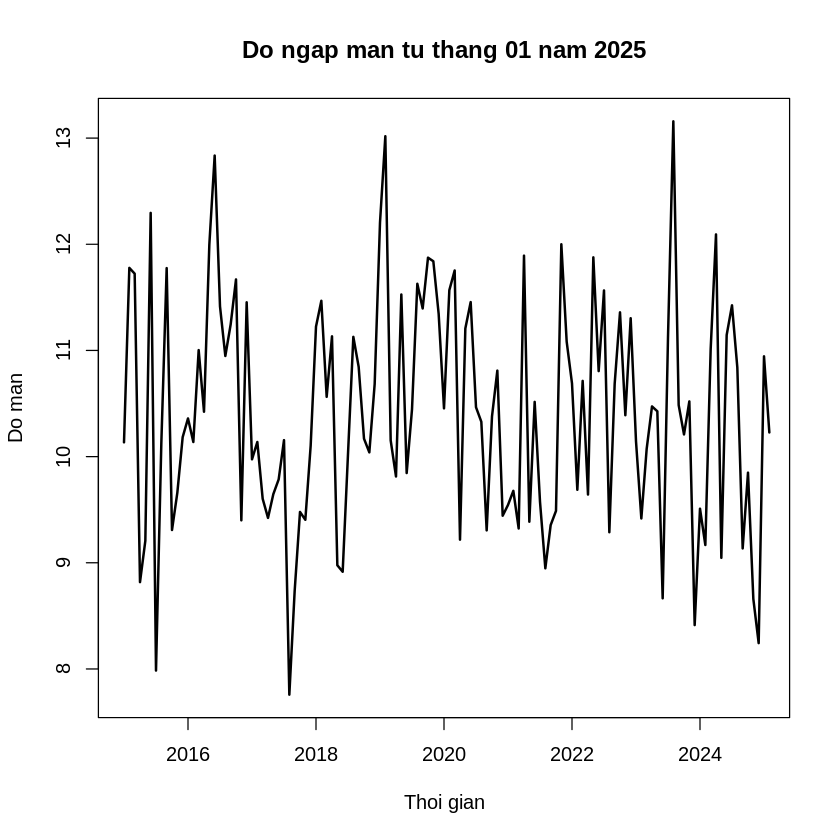

In [38]:
KhuMua_KNN = DL_KNN - MV_KNN$seasonal

plot(KhuMua_KNN,
     xlim = c(2015, 2025),
     lwd = 2,
     ylab = "Do man",
     xlab = "Thoi gian",
     main = "Do ngap man tu thang 01 nam 2025")
print(KhuMua_KNN)

In [39]:
adf_DL_KNN= adf.test(KhuMua_KNN)
print(adf_DL_KNN)
kpss_DL_KNN= kpss.test(KhuMua_KNN)
print(kpss_DL_KNN)

Warning message in adf.test(KhuMua_KNN):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  KhuMua_KNN
Dickey-Fuller = -4.3785, Lag order = 4, p-value = 0.01
alternative hypothesis: stationary



Warning message in kpss.test(KhuMua_KNN):
“p-value greater than printed p-value”



	KPSS Test for Level Stationarity

data:  KhuMua_KNN
KPSS Level = 0.091263, Truncation lag parameter = 4, p-value = 0.1



In [40]:
x = ts(DL_KNN, start = c(2015), frequency = 12)
y = ts(KhuMua_KNN,start=c(2015), frequency = 12)
ts.plot(x,y, lwd=2,col = c("blue","red"),xlim=c(2015,2025),
        ylab="Do man (PSU)",xlab="Thoi gian",
        main="Do ngap man tu thang 01 nam 2025")
legend("topleft" , legend = c("KNNI Data", "Deseasonal KNNI Data"), fill = c("blue","red"))

#Decomposition & Seasonal Adjustment SVMI

In [41]:
MV_SVM= decompose(DL_SVM)
MV_SVM$seasonal
plot(MV_SVM$seasonal)

Jan        Feb        Mar        Apr        May        Jun       
2015  1.9047711  3.3957704  2.2243919  2.2118120 -2.6141515 -4.4734715
2016  1.9047711  3.3957704  2.2243919  2.2118120 -2.6141515 -4.4734715
2017  1.9047711  3.3957704  2.2243919  2.2118120 -2.6141515 -4.4734715
2018  1.9047711  3.3957704  2.2243919  2.2118120 -2.6141515 -4.4734715
2019  1.9047711  3.3957704  2.2243919  2.2118120 -2.6141515 -4.4734715
2020  1.9047711  3.3957704  2.2243919  2.2118120 -2.6141515 -4.4734715
2021  1.9047711  3.3957704  2.2243919  2.2118120 -2.6141515 -4.4734715
2022  1.9047711  3.3957704  2.2243919  2.2118120 -2.6141515 -4.4734715
2023  1.9047711  3.3957704  2.2243919  2.2118120 -2.6141515 -4.4734715
2024  1.9047711  3.3957704  2.2243919  2.2118120 -2.6141515 -4.4734715
2025  1.9047711  3.3957704                                            
     Jul        Aug        Sep        Oct        Nov        Dec       
2015 -3.2585838 -2.4015005 -1.0290647 -0.1682127  1.3082096  2.9000297
2016 -3.2585838 -2.4015005 -1.0290647 -0.1682127  1.3082096  2.9000297
2017 -3.2585838 -2.4015005 -1.0290647 -0.1682127  1.3082096  2.9000297
2018 -3.2585838 -2.4015005 -1.0290647 -0.1682127  1.3082096  2.9000297
2019 -3.2585838 -2.4015005 -1.0290647 -0.1682127  1.3082096  2.9000297
2020 -3.2585838 -2.4015005 -1.0290647 -0.1682127  1.3082096  2.9000297
2021 -3.2585838 -2.4015005 -1.0290647 -0.1682127  1.3082096  2.9000297
2022 -3.2585838 -2.4015005 -1.0290647 -0.1682127  1.3082096  2.9000297
2023 -3.2585838 -2.4015005 -1.0290647 -0.1682127  1.3082096  2.9000297
2024 -3.2585838 -2.4015005 -1.0290647 -0.1682127  1.3082096  2.9000297
2025

           Jan       Feb       Mar       Apr       May       Jun       Jul
2015 11.005229 11.604230 12.055608  8.753188  9.034151 12.123472  7.828584
2016 11.230229  9.964230 11.335608 10.358188 11.824151 12.663472 11.258584
2017 10.845229  9.964230  9.935608  9.358188  9.474151  9.613472  9.998584
2018 12.095229 11.294230 10.895608 11.068188  8.804151  8.743472  9.868584
2019 13.075229 12.844230 10.485608  9.748188 11.354151  9.673472 10.288584
2020 11.325229 11.394230 12.085608  9.153188 11.034151 11.283472 10.308584
2021 10.415229  9.504230  9.655608 11.828188  9.214151 10.343472  9.418584
2022 11.560229  9.514230 11.045608  9.578188 11.704151 10.633472 11.408584
2023 11.015229  9.244230 10.405608 10.408188 10.254151  8.493472 10.968584
2024 10.380229  8.994230 11.345608 12.028188  8.874151 10.973472 11.268584
2025 11.815229 10.054230                                                  
           Aug       Sep       Oct       Nov       Dec
2015  9.971500 11.299065  9.298213 10.011790 

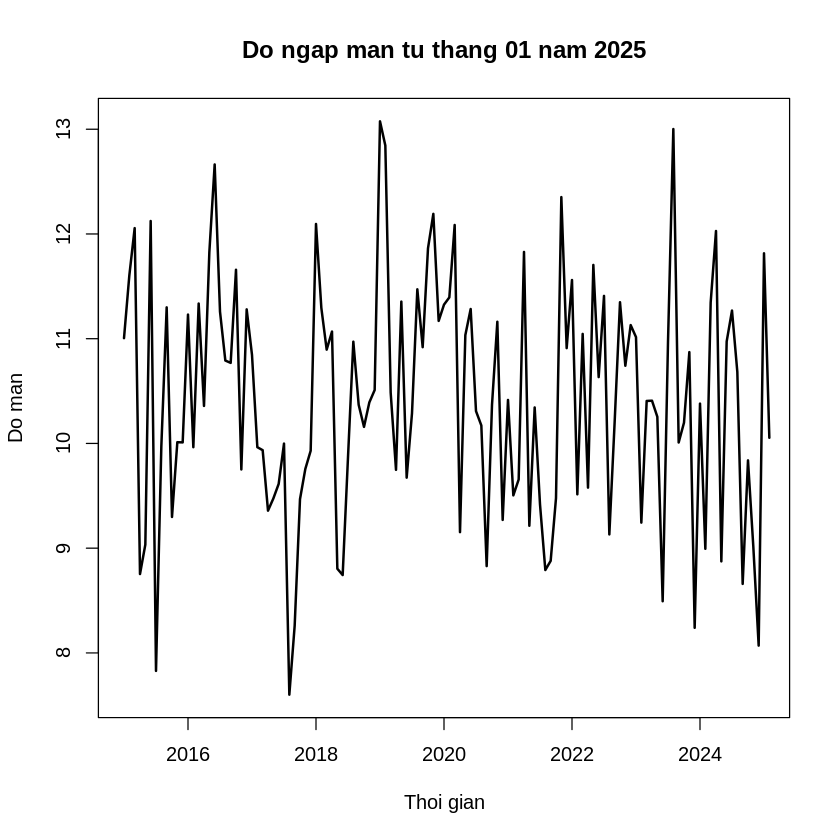

In [42]:
KhuMua_SVM = DL_KNN - MV_SVM$seasonal

plot(KhuMua_SVM,
     xlim = c(2015, 2025),
     lwd = 2,
     ylab = "Do man",
     xlab = "Thoi gian",
     main = "Do ngap man tu thang 01 nam 2025")
print(KhuMua_SVM)

In [43]:
adf_DL_SVM= adf.test(KhuMua_SVM)
print(adf_DL_SVM)
kpss_DL_SVM= kpss.test(KhuMua_SVM)
print(kpss_DL_SVM)

Warning message in adf.test(KhuMua_SVM):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  KhuMua_SVM
Dickey-Fuller = -4.4812, Lag order = 4, p-value = 0.01
alternative hypothesis: stationary



Warning message in kpss.test(KhuMua_SVM):
“p-value greater than printed p-value”



	KPSS Test for Level Stationarity

data:  KhuMua_SVM
KPSS Level = 0.085558, Truncation lag parameter = 4, p-value = 0.1



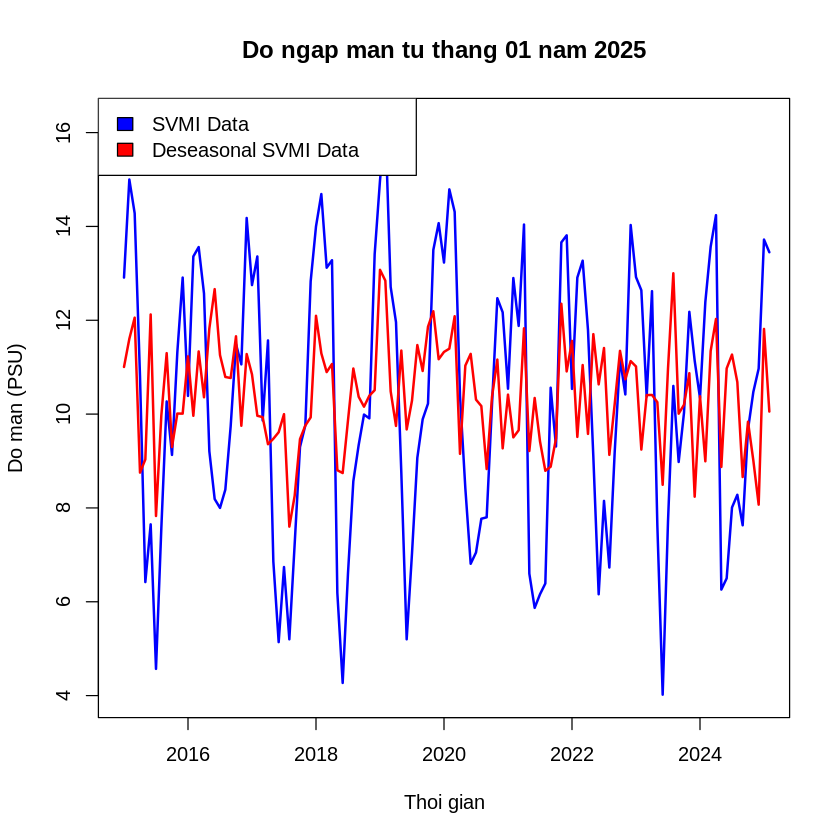

In [44]:
x = ts(DL_SVM, start = c(2015), frequency = 12)
y = ts(KhuMua_SVM,start=c(2015), frequency = 12)
ts.plot(x,y, lwd=2,col = c("blue","red"),xlim=c(2015,2025),
        ylab="Do man (PSU)",xlab="Thoi gian",
        main="Do ngap man tu thang 01 nam 2025")
legend("topleft" , legend = c("SVMI Data", "Deseasonal SVMI Data"), fill = c("blue","red"))

#ACF and PACF LI DATA



Autocorrelations of series ‘DL_LI’, by lag

0.0000 0.0833 0.1667 0.2500 0.3333 0.4167 0.5000 0.5833 0.6667 0.7500 0.8333 
 1.000  0.711  0.331 -0.027 -0.378 -0.632 -0.723 -0.611 -0.378 -0.042  0.320 
0.9167 1.0000 1.0833 1.1667 1.2500 1.3333 1.4167 1.5000 1.5833 1.6667 1.7500 
 0.621  0.773  0.622  0.287 -0.039 -0.354 -0.606 -0.677 -0.594 -0.350 -0.020 
1.8333 1.9167 2.0000 2.0833 2.1667 2.2500 2.3333 2.4167 2.5000 2.5833 2.6667 
 0.308  0.576  0.698  0.576  0.284 -0.030 -0.306 -0.544 -0.637 -0.513 -0.304 
2.7500 2.8333 2.9167 3.0000 3.0833 3.1667 3.2500 3.3333 3.4167 3.5000 3.5833 
-0.022  0.279  0.520  0.648  0.511  0.270 -0.031 -0.288 -0.447 -0.516 -0.430 
3.6667 3.7500 3.8333 3.9167 4.0000 4.0833 4.1667 4.2500 4.3333 4.4167 4.5000 
-0.237 -0.006  0.236  0.446  0.528  0.419  0.206 -0.039 -0.261 -0.406 -0.421 
4.5833 4.6667 4.7500 4.8333 4.9167 5.0000 
-0.352 -0.204 -0.029  0.157  0.347  0.429 

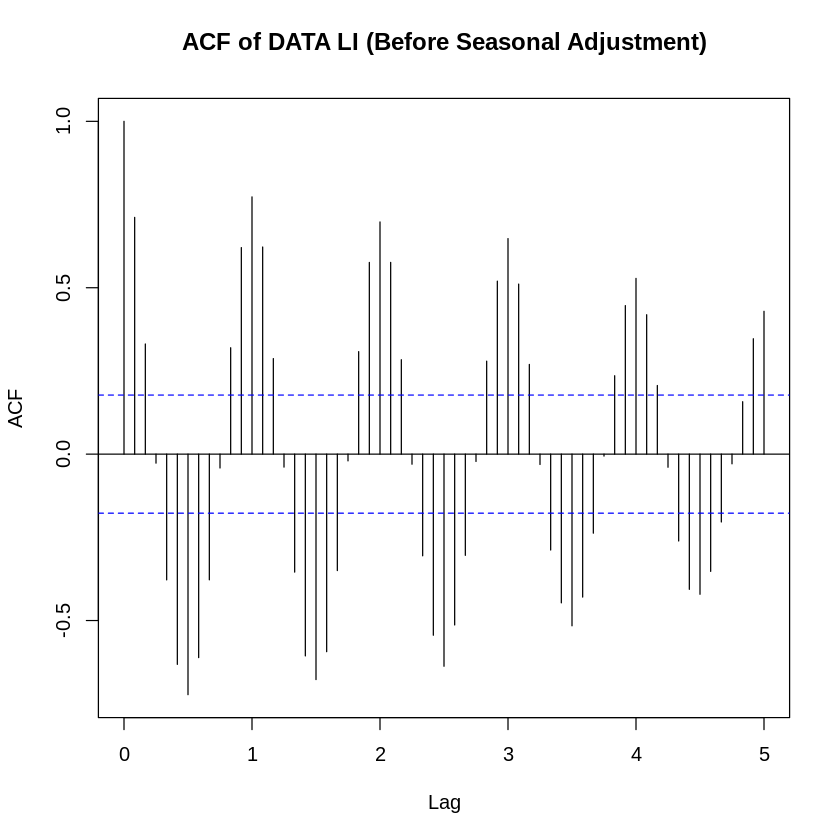

In [45]:
acf(DL_LI,lag.max = 60,na.action = na.pass,main = "ACF of DATA LI (Before Seasonal Adjustment)")
acf(DL_LI, lag.max = 60, plot = FALSE)


        Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep    Oct
2015         2.090 -0.720 -3.930 -3.930  1.230 -3.080  3.000  2.700 -1.140
2016  0.225  0.225  0.200 -0.990 -3.360 -1.020 -0.190  0.390  1.350  1.750
2017 -1.430  0.610 -0.895 -0.895 -4.710 -1.720  1.600 -1.540  2.030  2.070
2018  1.170  0.690 -1.570  0.160 -7.090 -1.920  2.340  1.960  0.770  0.650
2019  1.570  1.260 -3.530 -0.750 -3.220 -3.540  1.830  2.040  0.820  1.805
2020 -0.840  1.560 -0.480 -2.945 -2.945 -1.610  0.240  0.720  0.030  2.400
2021  0.365  0.365 -1.020  2.160 -7.440 -0.730  0.290  0.230  1.460  1.460
2022 -0.450 -0.450  0.360 -1.480 -2.700 -2.930  1.990 -1.420  2.450  2.000
2023 -1.110 -0.280 -0.010 -0.010 -4.980 -3.620  3.690  2.890 -1.620  1.050
2024  0.625  0.625  1.180  0.670 -7.980  0.240  1.510  0.270 -0.650  2.040
2025  2.750 -0.270                                                        
        Nov    Dec
2015  2.190  1.590
2016 -0.430  3.120
2017  1.765  1.765
2018  1.710  1.710
2019 

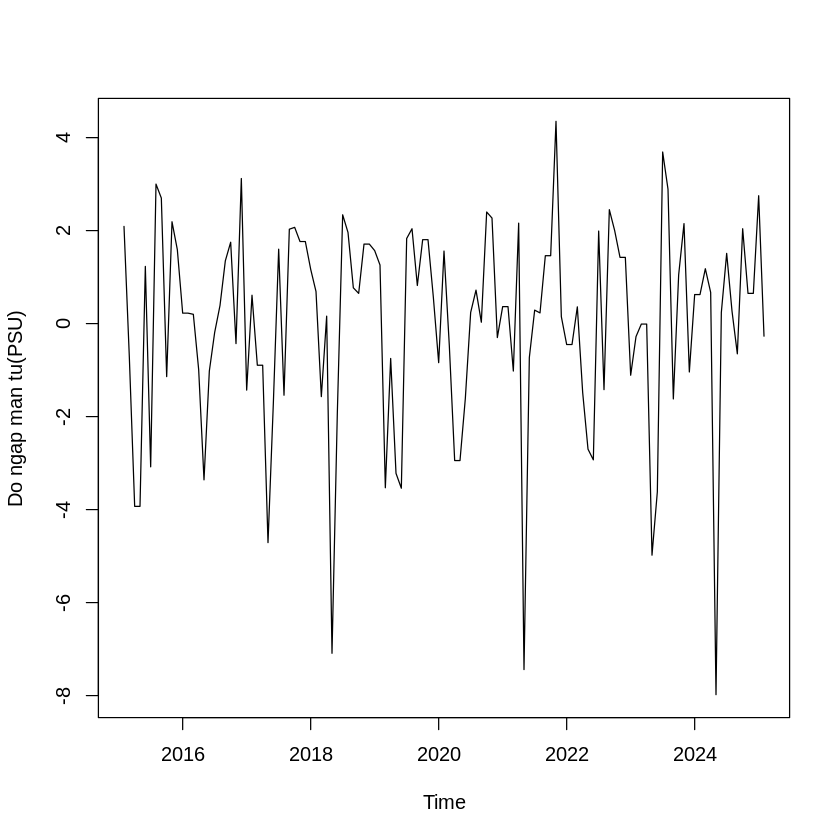

In [46]:
D1_LI= diff(DL_LI, differences=1)
print(D1_LI)
plot.ts(D1_LI, ylab = "Do ngap man tu(PSU)")

In [47]:
adf_D1_LI=adf.test(D1_LI)
print(adf_D1_LI)
kpss_D1_LI= kpss.test(D1_LI)
print(kpss_D1_LI)

Warning message in adf.test(D1_LI):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  D1_LI
Dickey-Fuller = -6.7639, Lag order = 4, p-value = 0.01
alternative hypothesis: stationary



Warning message in kpss.test(D1_LI):
“p-value greater than printed p-value”



	KPSS Test for Level Stationarity

data:  D1_LI
KPSS Level = 0.023607, Truncation lag parameter = 4, p-value = 0.1



In [48]:
acf(D1_LI,lag.max = 60,na.action = na.pass,main = "ACF of diff_1 (Before Seasonal Adjustment)")
acf(D1_LI, lag.max = 60, plot = FALSE)

grid(col = "lightgray", lty = "dotted")



Autocorrelations of series ‘D1_LI’, by lag

0.0000 0.0833 0.1667 0.2500 0.3333 0.4167 0.5000 0.5833 0.6667 0.7500 0.8333 
 1.000  0.153 -0.023  0.007 -0.152 -0.284 -0.350 -0.228 -0.185 -0.039  0.057 
0.9167 1.0000 1.0833 1.1667 1.2500 1.3333 1.4167 1.5000 1.5833 1.6667 1.7500 
 0.261  0.543  0.330 -0.014 -0.020 -0.088 -0.311 -0.283 -0.271 -0.139 -0.023 
1.8333 1.9167 2.0000 2.0833 2.1667 2.2500 2.3333 2.4167 2.5000 2.5833 2.6667 
 0.083  0.247  0.438  0.300  0.036 -0.058 -0.038 -0.241 -0.380 -0.152 -0.128 
2.7500 2.8333 2.9167 3.0000 3.0833 3.1667 3.2500 3.3333 3.4167 3.5000 3.5833 
-0.057  0.087  0.185  0.467  0.181  0.109 -0.077 -0.123 -0.144 -0.278 -0.195 
3.6667 3.7500 3.8333 3.9167 4.0000 4.0833 4.1667 4.2500 4.3333 4.4167 4.5000 
-0.072 -0.024  0.010  0.233  0.327  0.180  0.075 -0.041 -0.111 -0.205 -0.156 
4.5833 4.6667 4.7500 4.8333 4.9167 5.0000 
-0.146 -0.049 -0.037 -0.027  0.172  0.300 

In [49]:
D2_LI= diff(DL_LI, differences=2)
print(D2_LI)
plot.ts(D2_LI, ylab = "Do ngap man tu(PSU)")

               Jan           Feb           Mar           Apr           May
2015                             -2.810000e+00 -3.210000e+00  0.000000e+00
2016 -1.365000e+00  0.000000e+00 -2.500000e-02 -1.190000e+00 -2.370000e+00
2017 -4.550000e+00  2.040000e+00 -1.505000e+00  0.000000e+00 -3.815000e+00
2018 -5.950000e-01 -4.800000e-01 -2.260000e+00  1.730000e+00 -7.250000e+00
2019 -1.400000e-01 -3.100000e-01 -4.790000e+00  2.780000e+00 -2.470000e+00
2020 -1.410000e+00  2.400000e+00 -2.040000e+00 -2.465000e+00  0.000000e+00
2021  6.650000e-01  0.000000e+00 -1.385000e+00  3.180000e+00 -9.600000e+00
2022 -6.000000e-01  1.776357e-15  8.100000e-01 -1.840000e+00 -1.220000e+00
2023 -2.535000e+00  8.300000e-01  2.700000e-01  1.776357e-15 -4.970000e+00
2024  1.665000e+00  0.000000e+00  5.550000e-01 -5.100000e-01 -8.650000e+00
2025  2.100000e+00 -3.020000e+00                                          
               Jun           Jul           Aug           Sep           Oct
2015  5.160000e+00 -4.310

In [50]:
adf_D2_LI=adf.test(D2_LI)
print(adf_D2_LI)
kpss_D2_LI= kpss.test(D2_LI)
print(kpss_D2_LI)

Warning message in adf.test(D2_LI):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  D2_LI
Dickey-Fuller = -6.2485, Lag order = 4, p-value = 0.01
alternative hypothesis: stationary



Warning message in kpss.test(D2_LI):
“p-value greater than printed p-value”



	KPSS Test for Level Stationarity

data:  D2_LI
KPSS Level = 0.02024, Truncation lag parameter = 4, p-value = 0.1




Autocorrelations of series ‘D2_LI’, by lag

0.0000 0.0833 0.1667 0.2500 0.3333 0.4167 0.5000 0.5833 0.6667 0.7500 0.8333 
 1.000 -0.391 -0.115  0.112 -0.027 -0.030 -0.124  0.048 -0.054  0.020 -0.060 
0.9167 1.0000 1.0833 1.1667 1.2500 1.3333 1.4167 1.5000 1.5833 1.6667 1.7500 
-0.044  0.293  0.078 -0.199  0.043  0.087 -0.152  0.010 -0.073  0.006  0.010 
1.8333 1.9167 2.0000 2.0833 2.1667 2.2500 2.3333 2.4167 2.5000 2.5833 2.6667 
-0.040 -0.007  0.191  0.077 -0.099 -0.059  0.126 -0.044 -0.213  0.115 -0.029 
2.7500 2.8333 2.9167 3.0000 3.0833 3.1667 3.2500 3.3333 3.4167 3.5000 3.5833 
-0.043  0.028 -0.108  0.338 -0.123  0.065 -0.067 -0.026  0.058 -0.128 -0.021 
3.6667 3.7500 3.8333 3.9167 4.0000 4.0833 4.1667 4.2500 4.3333 4.4167 4.5000 
 0.044  0.005 -0.110  0.076  0.144 -0.014  0.000 -0.021  0.015 -0.097  0.023 
4.5833 4.6667 4.7500 4.8333 4.9167 5.0000 
-0.050  0.048  0.001 -0.110  0.046  0.165 

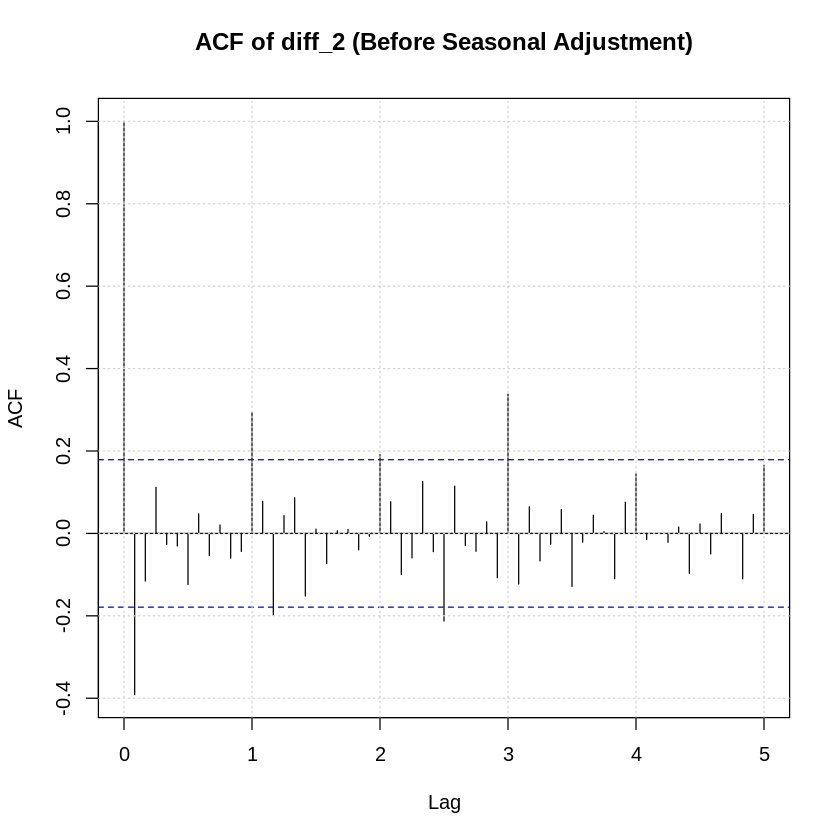

In [51]:
acf(D2_LI,lag.max = 60,na.action = na.pass,main = "ACF of diff_2 (Before Seasonal Adjustment)")
acf(D2_LI, lag.max = 60, plot = FALSE)

grid(col = "lightgray", lty = "dotted")


In [52]:
pacf(D2_LI, lag.max = 60, na.action = na.pass,
     main = "PACF of DATA LI (Before Seasonal Adjustment)")

grid(col = "lightgray", lty = "dotted")


# ACF and PACF deseasonal LI data

In [53]:
acf(KhuMua_LI,lag.max = 60,na.action = na.pass,main = "ACF of deseasonal Li DATA ")
acf(KhuMua_LI, lag.max = 60, plot = FALSE)

grid(col = "lightgray", lty = "dotted")


Autocorrelations of series ‘KhuMua_LI’, by lag

0.0000 0.0833 0.1667 0.2500 0.3333 0.4167 0.5000 0.5833 0.6667 0.7500 0.8333 
 1.000  0.204  0.003  0.156 -0.013 -0.058  0.048  0.062 -0.045  0.042  0.043 
0.9167 1.0000 1.0833 1.1667 1.2500 1.3333 1.4167 1.5000 1.5833 1.6667 1.7500 
-0.005 -0.034 -0.029 -0.252 -0.156 -0.109 -0.159  0.010 -0.062  0.002  0.026 
1.8333 1.9167 2.0000 2.0833 2.1667 2.2500 2.3333 2.4167 2.5000 2.5833 2.6667 
-0.015 -0.095 -0.208 -0.056 -0.087 -0.012  0.135 -0.024 -0.142  0.030  0.010 
2.7500 2.8333 2.9167 3.0000 3.0833 3.1667 3.2500 3.3333 3.4167 3.5000 3.5833 
-0.017  0.037 -0.001  0.036  0.021  0.189  0.094  0.084  0.161 -0.024 -0.054 
3.6667 3.7500 3.8333 3.9167 4.0000 4.0833 4.1667 4.2500 4.3333 4.4167 4.5000 
 0.096  0.108  0.049  0.143  0.005 -0.048 -0.008 -0.051 -0.115 -0.053  0.031 
4.5833 4.6667 4.7500 4.8333 4.9167 5.0000 
-0.068  0.015 -0.040 -0.118 -0.058 -0.094 


Partial autocorrelations of series ‘KhuMua_LI’, by lag

0.0833 0.1667 0.2500 0.3333 0.4167 0.5000 0.5833 0.6667 0.7500 0.8333 0.9167 
 0.204 -0.040  0.171 -0.088 -0.026  0.040  0.058 -0.059  0.055 -0.001  0.017 
1.0000 1.0833 1.1667 1.2500 1.3333 1.4167 1.5000 1.5833 1.6667 1.7500 1.8333 
-0.055 -0.023 -0.262 -0.028 -0.117 -0.053  0.055 -0.095  0.081  0.013 -0.006 
1.9167 2.0000 2.0833 2.1667 2.2500 2.3333 2.4167 2.5000 2.5833 2.6667 2.7500 
-0.081 -0.204  0.036 -0.100  0.071  0.052 -0.131 -0.163 -0.035  0.001  0.009 
2.8333 2.9167 3.0000 3.0833 3.1667 3.2500 3.3333 3.4167 3.5000 3.5833 3.6667 
-0.001 -0.004  0.042  0.000  0.085 -0.029  0.022  0.072 -0.034 -0.097  0.074 
3.7500 3.8333 3.9167 4.0000 4.0833 4.1667 4.2500 4.3333 4.4167 4.5000 4.5833 
 0.067  0.033  0.094 -0.140 -0.060  0.002 -0.012  0.021 -0.028  0.038  0.021 
4.6667 4.7500 4.8333 4.9167 5.0000 
 0.003 -0.046 -0.065 -0.047 -0.057 

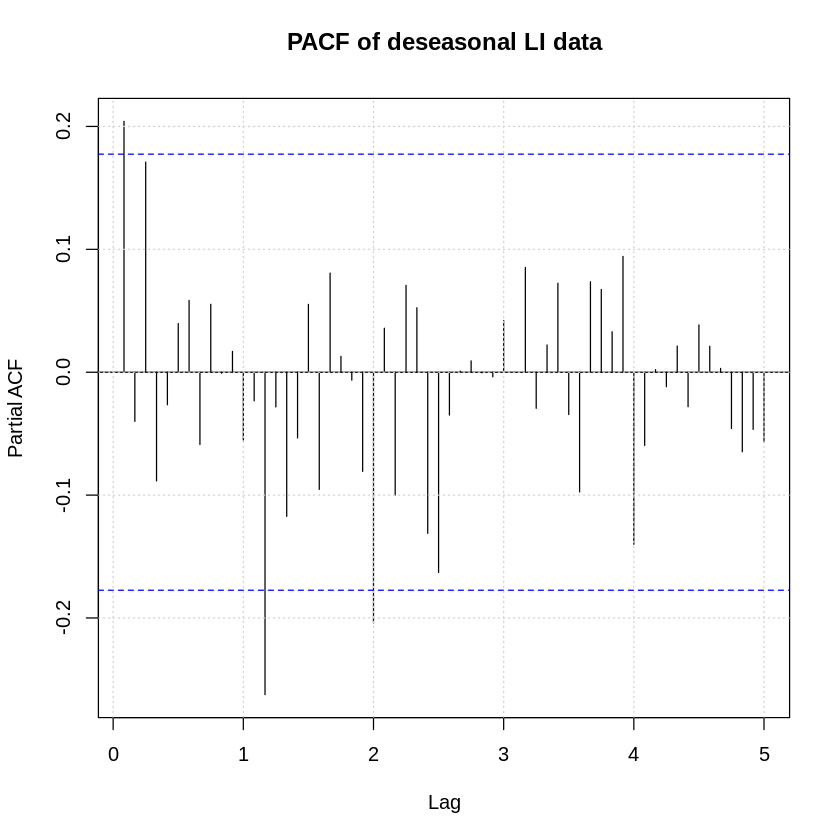

In [54]:
pacf(KhuMua_LI,lag.max = 60,na.action = na.pass,main = "PACF of deseasonal LI data")
pacf(KhuMua_LI, lag.max = 60, plot = FALSE)

grid(col = "lightgray", lty = "dotted")


#ACF and PACF KNNI DATA




In [55]:
acf(DL_KNN,lag.max = 60,na.action = na.pass,main = "ACF of DATA KNNI (Before Seasonal Adjustment)")
acf(DL_KNN, lag.max = 60, plot = FALSE)



Autocorrelations of series ‘DL_KNN’, by lag

0.0000 0.0833 0.1667 0.2500 0.3333 0.4167 0.5000 0.5833 0.6667 0.7500 0.8333 
 1.000  0.710  0.335 -0.027 -0.381 -0.632 -0.723 -0.612 -0.379 -0.040  0.320 
0.9167 1.0000 1.0833 1.1667 1.2500 1.3333 1.4167 1.5000 1.5833 1.6667 1.7500 
 0.620  0.773  0.623  0.287 -0.038 -0.355 -0.608 -0.674 -0.594 -0.347 -0.019 
1.8333 1.9167 2.0000 2.0833 2.1667 2.2500 2.3333 2.4167 2.5000 2.5833 2.6667 
 0.312  0.575  0.697  0.574  0.282 -0.032 -0.307 -0.545 -0.639 -0.516 -0.307 
2.7500 2.8333 2.9167 3.0000 3.0833 3.1667 3.2500 3.3333 3.4167 3.5000 3.5833 
-0.022  0.280  0.520  0.648  0.509  0.268 -0.032 -0.287 -0.444 -0.516 -0.431 
3.6667 3.7500 3.8333 3.9167 4.0000 4.0833 4.1667 4.2500 4.3333 4.4167 4.5000 
-0.238 -0.006  0.238  0.448  0.529  0.418  0.207 -0.039 -0.259 -0.403 -0.420 
4.5833 4.6667 4.7500 4.8333 4.9167 5.0000 
-0.355 -0.205 -0.030  0.158  0.350  0.431 

In [185]:
D1_KNN= diff(DL_KNN, differences=1)
print(D1_KNN)
plot.ts(D1_KNN, ylab = "Do ngap man tu(PSU)")

        Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep    Oct
2015         2.090 -0.720 -3.315 -4.545  1.230 -3.080  3.000  2.700 -1.140
2016  0.225  0.225  0.200 -0.990 -3.360 -1.020 -0.190  0.390  1.350  1.750
2017 -1.430  0.610 -1.200 -0.590 -4.710 -1.720  1.600 -1.540  2.030  2.070
2018  1.170  0.690 -1.570  0.160 -7.090 -1.920  2.340  1.960  0.770  0.650
2019  1.570  1.260 -3.530 -0.750 -3.220 -3.540  1.830  2.040  0.820  1.805
2020 -0.840  1.560 -0.480 -2.945 -2.945 -1.610  0.240  0.720  0.030  2.400
2021  0.150  0.580 -1.020  2.160 -7.440 -0.730  0.290  0.230  1.460  1.460
2022 -0.345 -0.555  0.360 -1.480 -2.700 -2.930  1.990 -1.420  2.450  2.000
2023 -1.110 -0.280 -0.010 -0.010 -4.980 -3.620  3.690  2.890 -1.620  1.050
2024  1.145  0.105  1.180  0.670 -7.980  0.240  1.510  0.270 -0.650  2.040
2025  2.750 -0.270                                                        
        Nov    Dec
2015  2.190  1.590
2016 -0.430  3.120
2017  1.765  1.765
2018  1.710  1.710
2019 

In [57]:
adf_D1_KNN=adf.test(D1_KNN)
print(adf_D1_KNN)
kpss_D1_KNN= kpss.test(D1_KNN)
print(kpss_D1_KNN)

Warning message in adf.test(D1_KNN):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  D1_KNN
Dickey-Fuller = -6.7552, Lag order = 4, p-value = 0.01
alternative hypothesis: stationary



Warning message in kpss.test(D1_KNN):
“p-value greater than printed p-value”



	KPSS Test for Level Stationarity

data:  D1_KNN
KPSS Level = 0.023636, Truncation lag parameter = 4, p-value = 0.1



In [58]:
acf(D1_KNN,lag.max = 60,na.action = na.pass,main = "ACF of diff_1 (Before Seasonal Adjustment)")
acf(D1_KNN, lag.max = 60, plot = FALSE)

grid(col = "lightgray", lty = "dotted")



Autocorrelations of series ‘D1_KNN’, by lag

0.0000 0.0833 0.1667 0.2500 0.3333 0.4167 0.5000 0.5833 0.6667 0.7500 0.8333 
 1.000  0.141 -0.008  0.004 -0.161 -0.276 -0.348 -0.226 -0.190 -0.033  0.057 
0.9167 1.0000 1.0833 1.1667 1.2500 1.3333 1.4167 1.5000 1.5833 1.6667 1.7500 
 0.257  0.539  0.329 -0.014 -0.016 -0.090 -0.320 -0.265 -0.282 -0.130 -0.030 
1.8333 1.9167 2.0000 2.0833 2.1667 2.2500 2.3333 2.4167 2.5000 2.5833 2.6667 
 0.094  0.239  0.438  0.295  0.037 -0.054 -0.042 -0.238 -0.377 -0.153 -0.133 
2.7500 2.8333 2.9167 3.0000 3.0833 3.1667 3.2500 3.3333 3.4167 3.5000 3.5833 
-0.053  0.089  0.182  0.470  0.174  0.108 -0.080 -0.120 -0.136 -0.279 -0.198 
3.6667 3.7500 3.8333 3.9167 4.0000 4.0833 4.1667 4.2500 4.3333 4.4167 4.5000 
-0.070 -0.028  0.016  0.231  0.328  0.176  0.075 -0.042 -0.110 -0.200 -0.150 
4.5833 4.6667 4.7500 4.8333 4.9167 5.0000 
-0.155 -0.047 -0.039 -0.028  0.179  0.298 

               Jan           Feb           Mar           Apr           May
2015                             -2.810000e+00 -2.595000e+00 -1.230000e+00
2016 -1.365000e+00  0.000000e+00 -2.500000e-02 -1.190000e+00 -2.370000e+00
2017 -4.550000e+00  2.040000e+00 -1.810000e+00  6.100000e-01 -4.120000e+00
2018 -5.950000e-01 -4.800000e-01 -2.260000e+00  1.730000e+00 -7.250000e+00
2019 -1.400000e-01 -3.100000e-01 -4.790000e+00  2.780000e+00 -2.470000e+00
2020 -1.410000e+00  2.400000e+00 -2.040000e+00 -2.465000e+00  0.000000e+00
2021  4.500000e-01  4.300000e-01 -1.600000e+00  3.180000e+00 -9.600000e+00
2022 -4.950000e-01 -2.100000e-01  9.150000e-01 -1.840000e+00 -1.220000e+00
2023 -3.090000e+00  8.300000e-01  2.700000e-01  1.776357e-15 -4.970000e+00
2024  2.185000e+00 -1.040000e+00  1.075000e+00 -5.100000e-01 -8.650000e+00
2025  2.100000e+00 -3.020000e+00                                          
               Jun           Jul           Aug           Sep           Oct
2015  5.775000e+00 -4.310

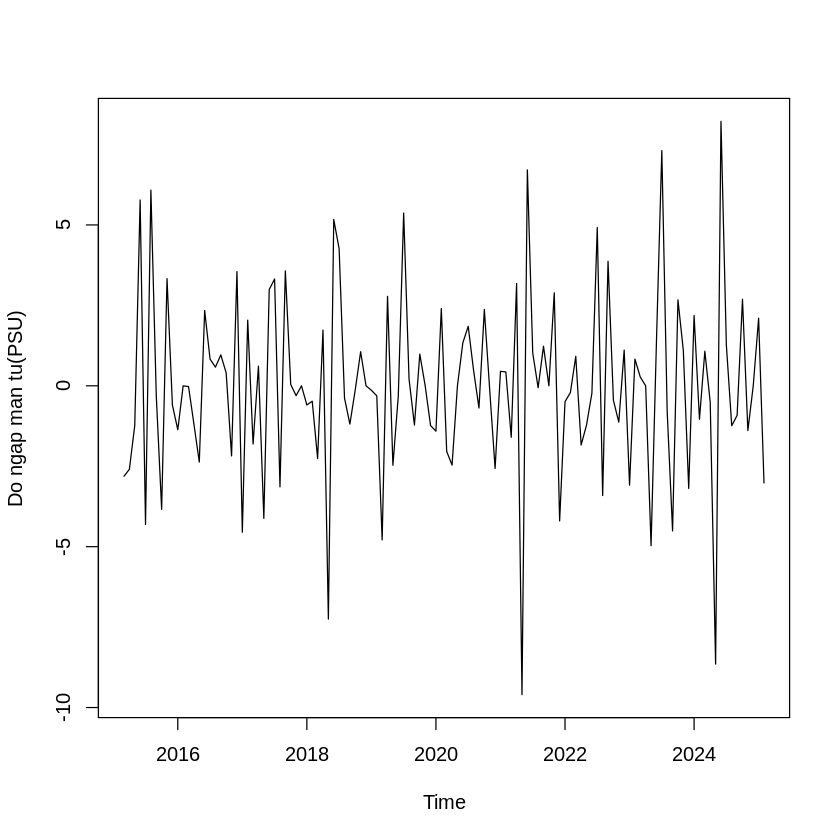

In [59]:
D2_KNN= diff(DL_KNN, differences=2)
print(D2_KNN)
plot.ts(D2_KNN, ylab = "Do ngap man tu(PSU)")

In [60]:
adf_D2_KNN=adf.test(D2_KNN)
print(adf_D2_KNN)
kpss_D2_KNN= kpss.test(D2_KNN)
print(kpss_D2_KNN)

Warning message in adf.test(D2_KNN):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  D2_KNN
Dickey-Fuller = -6.2537, Lag order = 4, p-value = 0.01
alternative hypothesis: stationary



Warning message in kpss.test(D2_KNN):
“p-value greater than printed p-value”



	KPSS Test for Level Stationarity

data:  D2_KNN
KPSS Level = 0.020342, Truncation lag parameter = 4, p-value = 0.1




Autocorrelations of series ‘D2_KNN’, by lag

0.0000 0.0833 0.1667 0.2500 0.3333 0.4167 0.5000 0.5833 0.6667 0.7500 0.8333 
 1.000 -0.409 -0.089  0.106 -0.040 -0.017 -0.126  0.051 -0.062  0.029 -0.060 
0.9167 1.0000 1.0833 1.1667 1.2500 1.3333 1.4167 1.5000 1.5833 1.6667 1.7500 
-0.046  0.288  0.078 -0.197  0.048  0.086 -0.169  0.041 -0.100  0.027 -0.010 
1.8333 1.9167 2.0000 2.0833 2.1667 2.2500 2.3333 2.4167 2.5000 2.5833 2.6667 
-0.018 -0.023  0.196  0.071 -0.098 -0.052  0.115 -0.039 -0.207  0.113 -0.037 
2.7500 2.8333 2.9167 3.0000 3.0833 3.1667 3.2500 3.3333 3.4167 3.5000 3.5833 
-0.035  0.028 -0.113  0.343 -0.130  0.068 -0.070 -0.025  0.065 -0.131 -0.025 
3.6667 3.7500 3.8333 3.9167 4.0000 4.0833 4.1667 4.2500 4.3333 4.4167 4.5000 
 0.050 -0.006 -0.097  0.068  0.147 -0.020  0.003 -0.023  0.014 -0.093  0.032 
4.5833 4.6667 4.7500 4.8333 4.9167 5.0000 
-0.063  0.056 -0.002 -0.112  0.055  0.158 

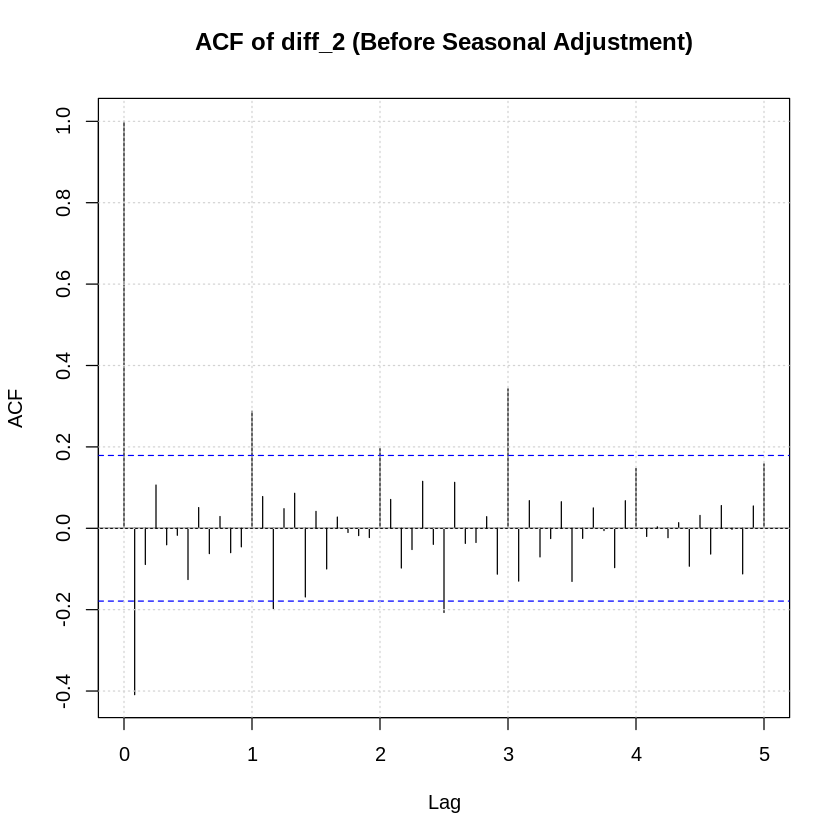

In [186]:
acf(D2_KNN,lag.max = 60,na.action = na.pass,main = "ACF of diff_2 (Before Seasonal Adjustment)")
acf(D2_KNN, lag.max = 60, plot = FALSE)

grid(col = "lightgray", lty = "dotted")



Partial autocorrelations of series ‘D2_KNN’, by lag

0.0833 0.1667 0.2500 0.3333 0.4167 0.5000 0.5833 0.6667 0.7500 0.8333 0.9167 
-0.409 -0.307 -0.089 -0.065 -0.051 -0.222 -0.176 -0.251 -0.192 -0.307 -0.484 
1.0000 1.0833 1.1667 1.2500 1.3333 1.4167 1.5000 1.5833 1.6667 1.7500 1.8333 
-0.278  0.090  0.051  0.007  0.093 -0.038  0.101 -0.021 -0.031 -0.034  0.025 
1.9167 2.0000 2.0833 2.1667 2.2500 2.3333 2.4167 2.5000 2.5833 2.6667 2.7500 
-0.096  0.011  0.013  0.077 -0.054 -0.005  0.123 -0.056 -0.003  0.039  0.035 
2.8333 2.9167 3.0000 3.0833 3.1667 3.2500 3.3333 3.4167 3.5000 3.5833 3.6667 
 0.078 -0.188  0.067 -0.077  0.093  0.068 -0.105 -0.120  0.003 -0.052 -0.010 
3.7500 3.8333 3.9167 4.0000 4.0833 4.1667 4.2500 4.3333 4.4167 4.5000 4.5833 
 0.076 -0.030  0.026  0.093 -0.055 -0.010 -0.026  0.053 -0.053 -0.115 -0.027 
4.6667 4.7500 4.8333 4.9167 5.0000 
 0.058  0.112  0.048 -0.040 -0.055 

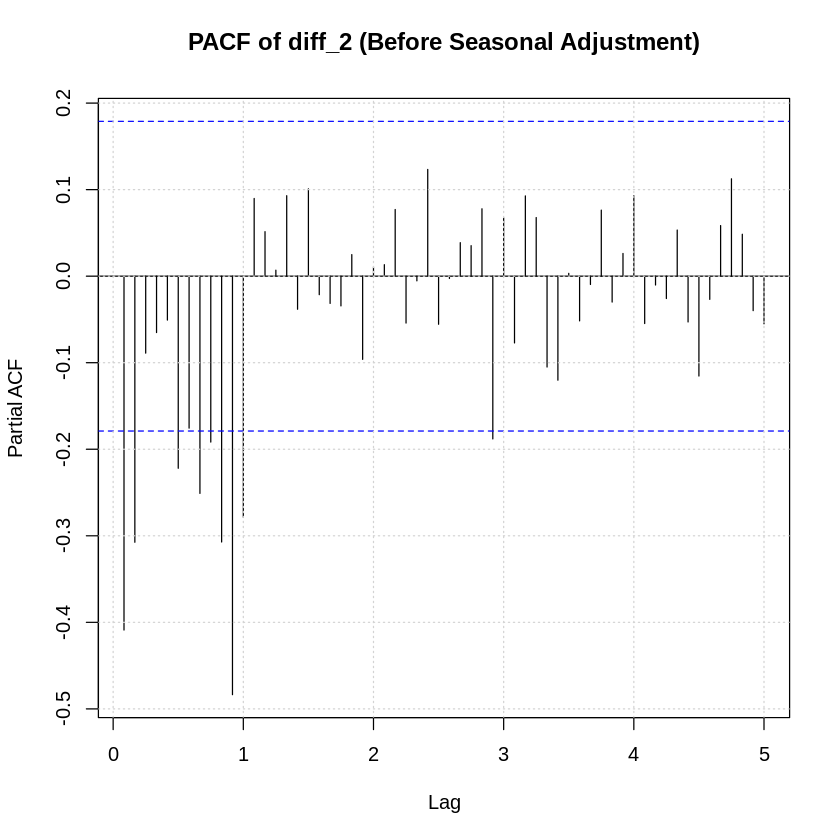

In [62]:
pacf(D2_KNN,lag.max = 60,na.action = na.pass,main = "PACF of diff_2 (Before Seasonal Adjustment)")
pacf(D2_KNN, lag.max = 60, plot = FALSE)

grid(col = "lightgray", lty = "dotted")


#ACF AND PACF  DESEASONAL KNNI DATA


Autocorrelations of series ‘KhuMua_KNN’, by lag

0.0000 0.0833 0.1667 0.2500 0.3333 0.4167 0.5000 0.5833 0.6667 0.7500 0.8333 
 1.000  0.194  0.024  0.159 -0.016 -0.040  0.047  0.065 -0.054  0.035  0.023 
0.9167 1.0000 1.0833 1.1667 1.2500 1.3333 1.4167 1.5000 1.5833 1.6667 1.7500 
-0.021 -0.043 -0.012 -0.237 -0.138 -0.109 -0.173  0.023 -0.072  0.019  0.020 
1.8333 1.9167 2.0000 2.0833 2.1667 2.2500 2.3333 2.4167 2.5000 2.5833 2.6667 
-0.009 -0.104 -0.216 -0.052 -0.083 -0.014  0.121 -0.037 -0.157  0.023  0.001 
2.7500 2.8333 2.9167 3.0000 3.0833 3.1667 3.2500 3.3333 3.4167 3.5000 3.5833 
-0.012  0.035 -0.008  0.030  0.010  0.182  0.084  0.088  0.175 -0.028 -0.054 
3.6667 3.7500 3.8333 3.9167 4.0000 4.0833 4.1667 4.2500 4.3333 4.4167 4.5000 
 0.106  0.112  0.063  0.152  0.006 -0.044 -0.003 -0.054 -0.110 -0.037  0.044 
4.5833 4.6667 4.7500 4.8333 4.9167 5.0000 
-0.074  0.019 -0.046 -0.124 -0.043 -0.092 

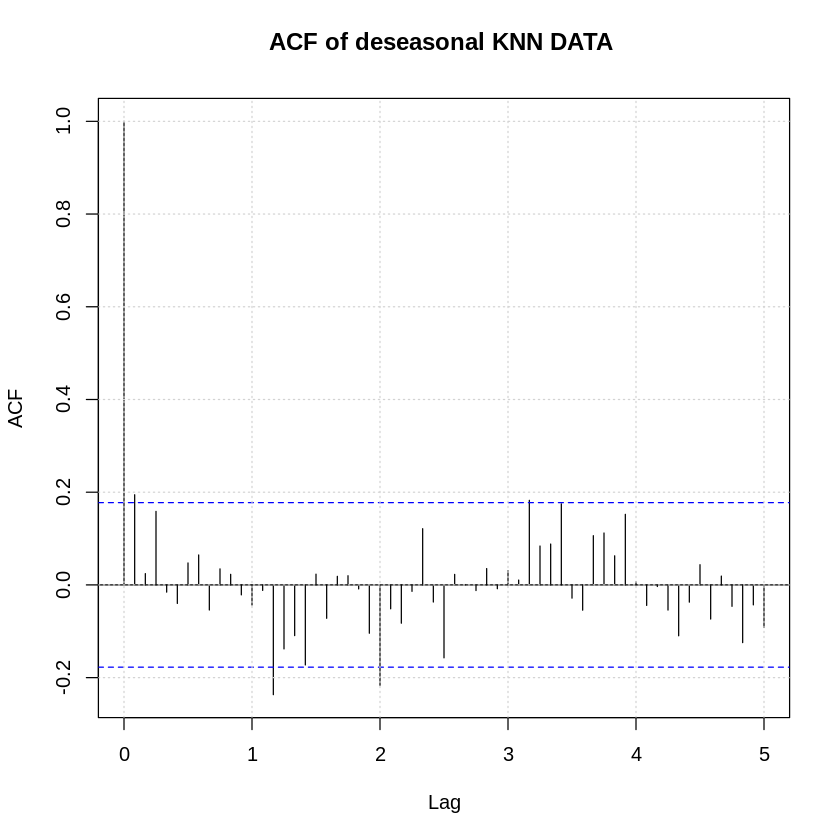

In [183]:
acf(KhuMua_KNN,lag.max = 60,na.action = na.pass,main = "ACF of deseasonal KNN DATA ")
acf(KhuMua_KNN, lag.max = 60, plot = FALSE)

grid(col = "lightgray", lty = "dotted")


Partial autocorrelations of series ‘KhuMua_KNN’, by lag

0.0833 0.1667 0.2500 0.3333 0.4167 0.5000 0.5833 0.6667 0.7500 0.8333 0.9167 
 0.194 -0.014  0.163 -0.083 -0.018  0.035  0.066 -0.075  0.051 -0.016  0.009 
1.0000 1.0833 1.1667 1.2500 1.3333 1.4167 1.5000 1.5833 1.6667 1.7500 1.8333 
-0.062  0.004 -0.253 -0.015 -0.123 -0.059  0.070 -0.095  0.097 -0.001  0.004 
1.9167 2.0000 2.0833 2.1667 2.2500 2.3333 2.4167 2.5000 2.5833 2.6667 2.7500 
-0.111 -0.206  0.021 -0.081  0.060  0.057 -0.135 -0.170 -0.042  0.010  0.001 
2.8333 2.9167 3.0000 3.0833 3.1667 3.2500 3.3333 3.4167 3.5000 3.5833 3.6667 
 0.006 -0.022  0.039 -0.006  0.073 -0.027  0.005  0.084 -0.050 -0.106  0.098 
3.7500 3.8333 3.9167 4.0000 4.0833 4.1667 4.2500 4.3333 4.4167 4.5000 4.5833 
 0.071  0.049  0.073 -0.135 -0.073  0.014 -0.018  0.022 -0.026  0.034  0.017 
4.6667 4.7500 4.8333 4.9167 5.0000 
 0.003 -0.051 -0.067 -0.045 -0.061 

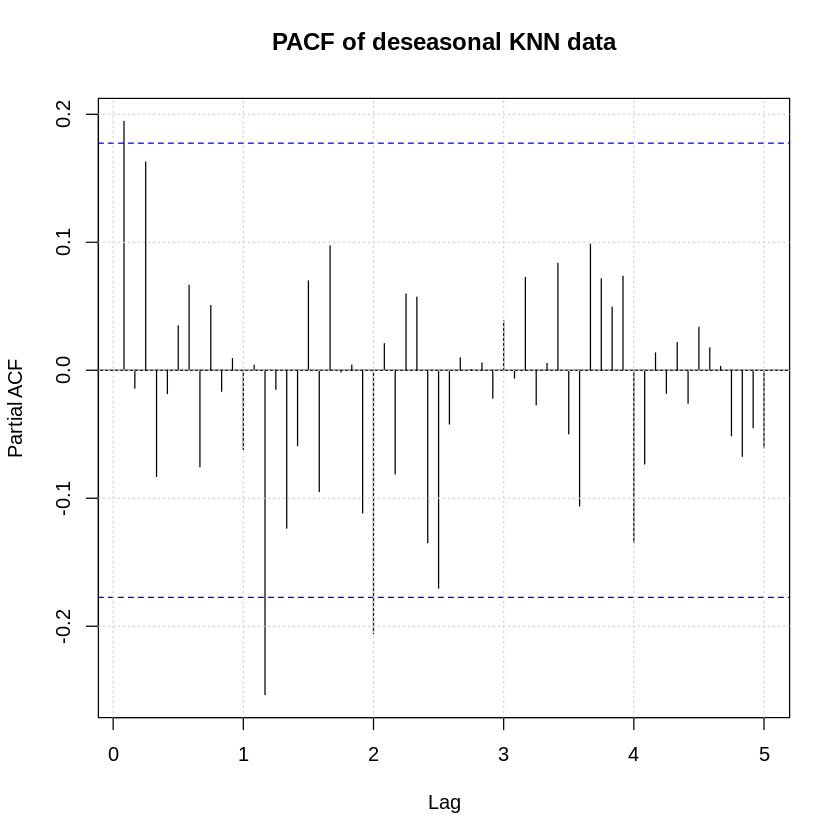

In [64]:
pacf(KhuMua_KNN,lag.max = 60,na.action = na.pass,main = "PACF of deseasonal KNN data")
pacf(KhuMua_KNN, lag.max = 60, plot = FALSE)

grid(col = "lightgray", lty = "dotted")


#ACF and PACF SVMI DATA



Autocorrelations of series ‘DL_SVM’, by lag

0.0000 0.0833 0.1667 0.2500 0.3333 0.4167 0.5000 0.5833 0.6667 0.7500 0.8333 
 1.000  0.643  0.289 -0.043 -0.358 -0.571 -0.643 -0.529 -0.345 -0.071  0.291 
0.9167 1.0000 1.0833 1.1667 1.2500 1.3333 1.4167 1.5000 1.5833 1.6667 1.7500 
 0.545  0.709  0.566  0.277 -0.042 -0.329 -0.544 -0.621 -0.529 -0.310 -0.023 
1.8333 1.9167 2.0000 2.0833 2.1667 2.2500 2.3333 2.4167 2.5000 2.5833 2.6667 
 0.308  0.523  0.655  0.521  0.247 -0.063 -0.273 -0.497 -0.584 -0.453 -0.287 
2.7500 2.8333 2.9167 3.0000 3.0833 3.1667 3.2500 3.3333 3.4167 3.5000 3.5833 
-0.044  0.266  0.482  0.584  0.465  0.249 -0.058 -0.274 -0.398 -0.479 -0.384 
3.6667 3.7500 3.8333 3.9167 4.0000 4.0833 4.1667 4.2500 4.3333 4.4167 4.5000 
-0.201 -0.004  0.216  0.415  0.494  0.353  0.186 -0.049 -0.256 -0.372 -0.393 
4.5833 4.6667 4.7500 4.8333 4.9167 5.0000 
-0.307 -0.178 -0.023  0.159  0.332  0.413 

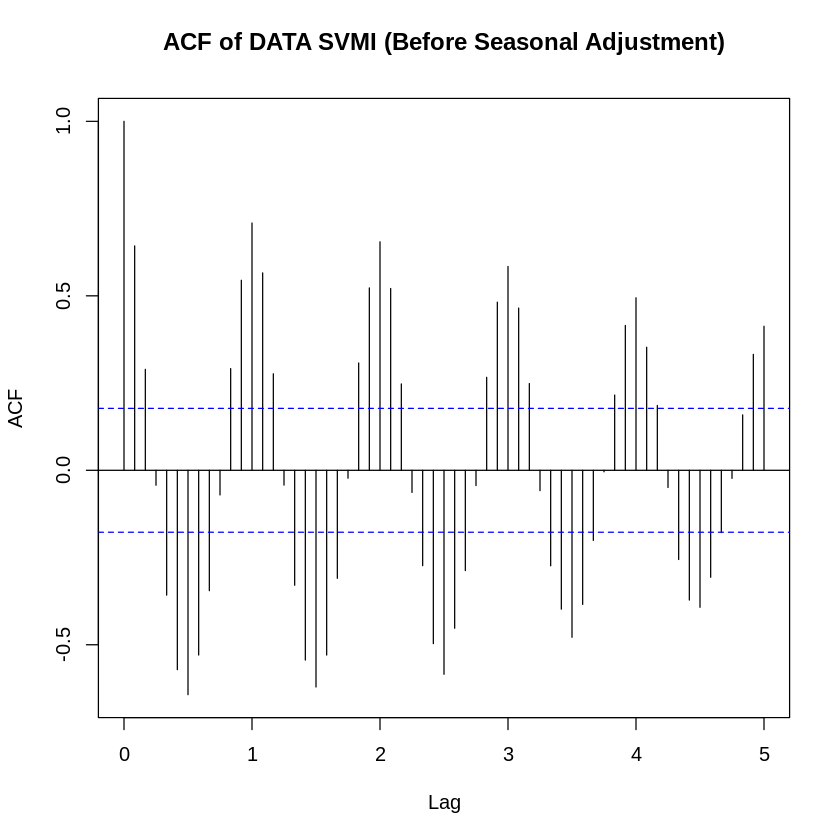

In [65]:
acf(DL_SVM,lag.max = 60,na.action = na.pass,main = "ACF of DATA SVMI (Before Seasonal Adjustment)")
acf(DL_SVM, lag.max = 60, plot = FALSE)


             Jan         Feb         Mar         Apr         May         Jun
2015              2.09000000 -0.72000000 -3.47488412 -4.38511588  1.23000000
2016 -2.52205475  2.97205475  0.20000000 -0.99000000 -3.36000000 -1.02000000
2017 -1.43000000  0.61000000 -3.49681163  1.70681163 -4.71000000 -1.72000000
2018  1.17000000  0.69000000 -1.57000000  0.16000000 -7.09000000 -1.92000000
2019  1.57000000  1.26000000 -3.53000000 -0.75000000 -3.22000000 -3.54000000
2020 -0.84000000  1.56000000 -0.48000000 -3.92354243 -1.96645757 -1.61000000
2021 -1.62887740  2.35887740 -1.02000000  2.16000000 -7.44000000 -0.73000000
2022 -3.27293273  2.37293273  0.36000000 -1.48000000 -2.70000000 -2.93000000
2023 -1.11000000 -0.28000000 -2.26601157  2.24601157 -4.98000000 -3.62000000
2024 -0.79804577  2.04804577  1.18000000  0.67000000 -7.98000000  0.24000000
2025  2.75000000 -0.27000000                                                
             Jul         Aug         Sep         Oct         Nov         Dec

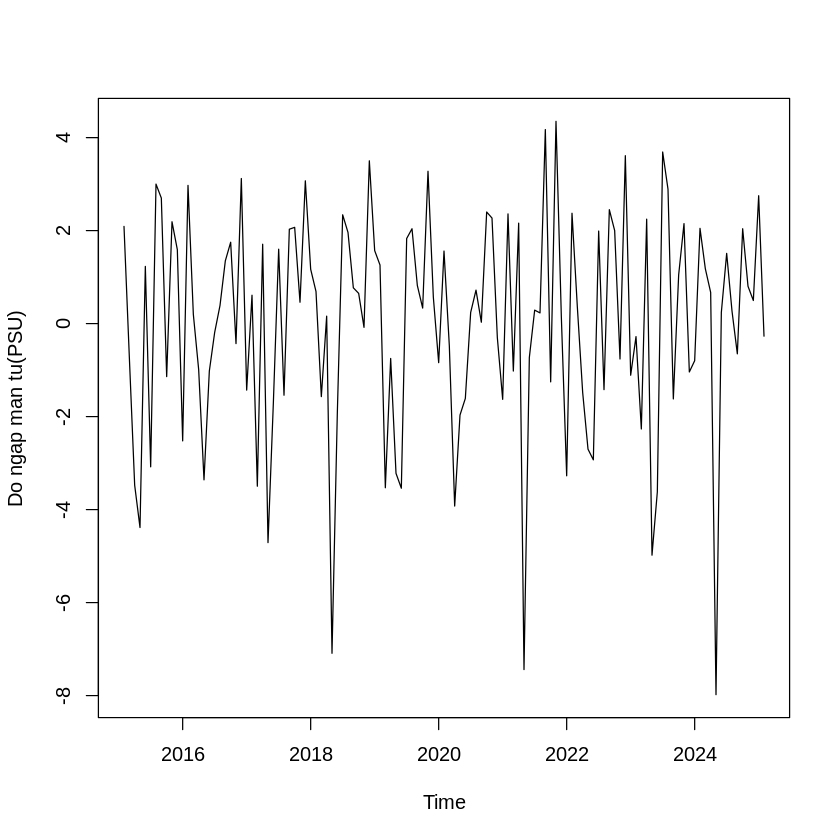

In [66]:
D1_SVM= diff(DL_SVM, differences=1)
print(D1_SVM)
plot.ts(D1_SVM, ylab = "Do ngap man tu(PSU)")

In [67]:
adf_D1_SVM=adf.test(D1_SVM)
print(adf_D1_SVM)
kpss_D1_SVM= kpss.test(D1_SVM)
print(kpss_D1_SVM)

Warning message in adf.test(D1_SVM):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  D1_SVM
Dickey-Fuller = -6.5474, Lag order = 4, p-value = 0.01
alternative hypothesis: stationary



Warning message in kpss.test(D1_SVM):
“p-value greater than printed p-value”



	KPSS Test for Level Stationarity

data:  D1_SVM
KPSS Level = 0.026452, Truncation lag parameter = 4, p-value = 0.1




Autocorrelations of series ‘D1_SVM’, by lag

0.0000 0.0833 0.1667 0.2500 0.3333 0.4167 0.5000 0.5833 0.6667 0.7500 0.8333 
 1.000 -0.014 -0.016 -0.009 -0.125 -0.199 -0.257 -0.111 -0.132 -0.120  0.112 
0.9167 1.0000 1.0833 1.1667 1.2500 1.3333 1.4167 1.5000 1.5833 1.6667 1.7500 
 0.125  0.455  0.208  0.038 -0.047 -0.082 -0.188 -0.249 -0.172 -0.085 -0.085 
1.8333 1.9167 2.0000 2.0833 2.1667 2.2500 2.3333 2.4167 2.5000 2.5833 2.6667 
 0.144  0.117  0.376  0.197  0.062 -0.135  0.033 -0.179 -0.310 -0.048 -0.111 
2.7500 2.8333 2.9167 3.0000 3.0833 3.1667 3.2500 3.3333 3.4167 3.5000 3.5833 
-0.116  0.122  0.144  0.315  0.147  0.121 -0.131 -0.085 -0.061 -0.241 -0.134 
3.6667 3.7500 3.8333 3.9167 4.0000 4.0833 4.1667 4.2500 4.3333 4.4167 4.5000 
-0.021 -0.039 -0.004  0.169  0.307  0.042  0.104 -0.039 -0.107 -0.113 -0.160 
4.5833 4.6667 4.7500 4.8333 4.9167 5.0000 
-0.065 -0.041 -0.047 -0.009  0.113  0.271 

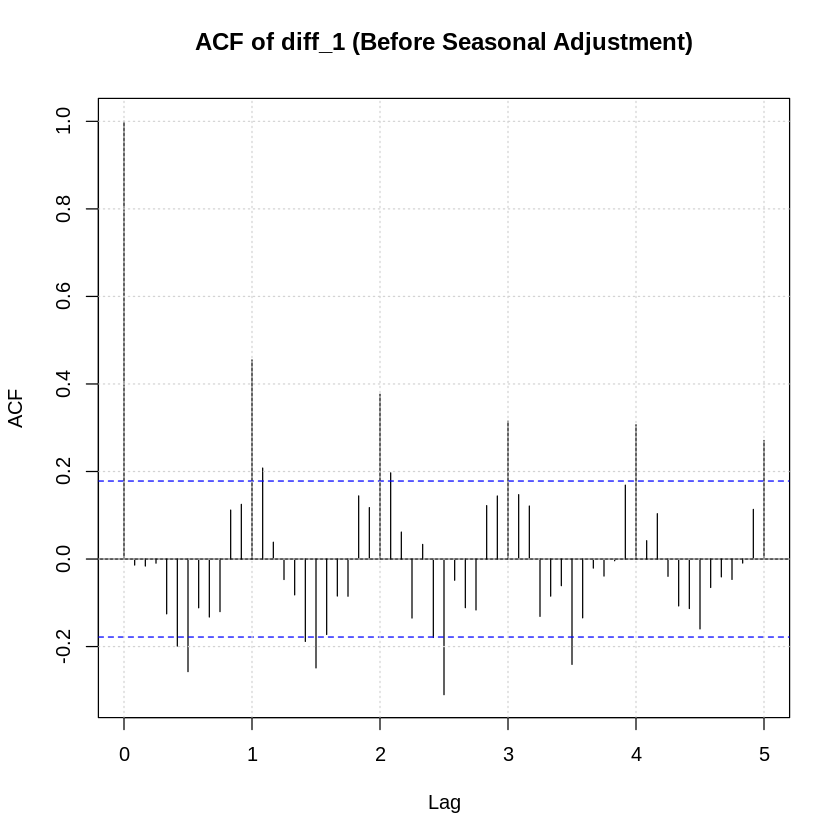

In [68]:
acf(D1_SVM,lag.max = 60,na.action = na.pass,main = "ACF of diff_1 (Before Seasonal Adjustment)")
acf(D1_SVM, lag.max = 60, plot = FALSE)

grid(col = "lightgray", lty = "dotted")


            Jan        Feb        Mar        Apr        May        Jun
2015                       -2.8100000 -2.7548841 -0.9102318  5.6151159
2016 -4.1120547  5.4941095 -2.7720547 -1.1900000 -2.3700000  2.3400000
2017 -4.5500000  2.0400000 -4.1068116  5.2036233 -6.4168116  2.9900000
2018 -1.9003100 -0.4800000 -2.2600000  1.7300000 -7.2500000  5.1700000
2019 -1.9305434 -0.3100000 -4.7900000  2.7800000 -2.4700000 -0.3200000
2020 -1.4100000  2.4000000 -2.0400000 -3.4435424  1.9570849  0.3564576
2021 -1.3288774  3.9877548 -3.3788774  3.1800000 -9.6000000  6.7100000
2022 -3.4229327  5.6458655 -2.0129327 -1.8400000 -1.2200000 -0.2300000
2023 -4.7209445  0.8300000 -1.9860116  4.5120231 -7.2260116  1.3600000
2024  0.2419542  2.8460915 -0.8680458 -0.5100000 -8.6500000  8.2200000
2025  2.2531283 -3.0200000                                            
            Jul        Aug        Sep        Oct        Nov        Dec
2015 -4.3100000  6.0800000 -0.3000000 -3.8400000  3.3300000 -0.6000000
2016  

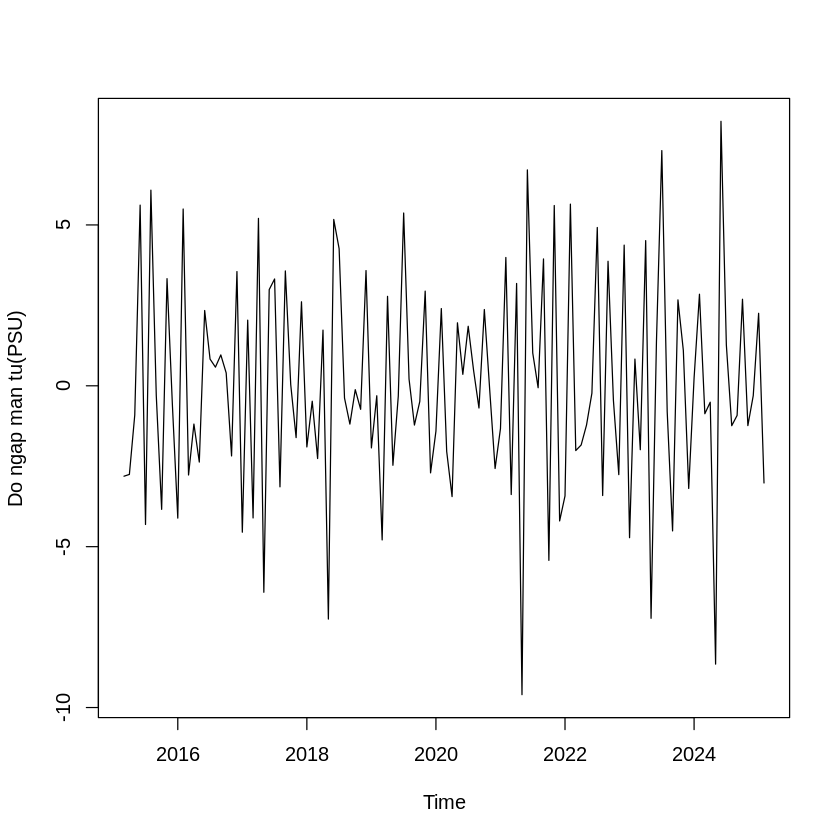

In [69]:
D2_SVM= diff(DL_SVM, differences=2)
print(D2_SVM)
plot.ts(D2_SVM, ylab = "Do ngap man tu(PSU)")

In [70]:
adf_D2_SVM=adf.test(D2_SVM)
print(adf_D2_SVM)
kpss_D2_SVM= kpss.test(D2_SVM)
print(kpss_D2_SVM)

Warning message in adf.test(D2_SVM):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  D2_SVM
Dickey-Fuller = -6.6356, Lag order = 4, p-value = 0.01
alternative hypothesis: stationary



Warning message in kpss.test(D2_SVM):
“p-value greater than printed p-value”



	KPSS Test for Level Stationarity

data:  D2_SVM
KPSS Level = 0.021007, Truncation lag parameter = 4, p-value = 0.1




Autocorrelations of series ‘D2_SVM’, by lag

0.0000 0.0833 0.1667 0.2500 0.3333 0.4167 0.5000 0.5833 0.6667 0.7500 0.8333 
 1.000 -0.496 -0.001  0.062 -0.029 -0.002 -0.110  0.083 -0.011 -0.115  0.111 
0.9167 1.0000 1.0833 1.1667 1.2500 1.3333 1.4167 1.5000 1.5833 1.6667 1.7500 
-0.151  0.278 -0.035 -0.040 -0.021  0.032 -0.024 -0.068 -0.007  0.042 -0.111 
1.8333 1.9167 2.0000 2.0833 2.1667 2.2500 2.3333 2.4167 2.5000 2.5833 2.6667 
 0.123 -0.136  0.214 -0.016  0.023 -0.172  0.184 -0.045 -0.190  0.156 -0.030 
2.7500 2.8333 2.9167 3.0000 3.0833 3.1667 3.2500 3.3333 3.4167 3.5000 3.5833 
-0.118  0.103 -0.071  0.169 -0.068  0.110 -0.136  0.002  0.096 -0.142 -0.002 
3.6667 3.7500 3.8333 3.9167 4.0000 4.0833 4.1667 4.2500 4.3333 4.4167 4.5000 
 0.065 -0.027 -0.072  0.019  0.200 -0.155  0.097 -0.033 -0.030  0.012 -0.070 
4.5833 4.6667 4.7500 4.8333 4.9167 5.0000 
 0.037  0.015 -0.026 -0.039 -0.015  0.182 

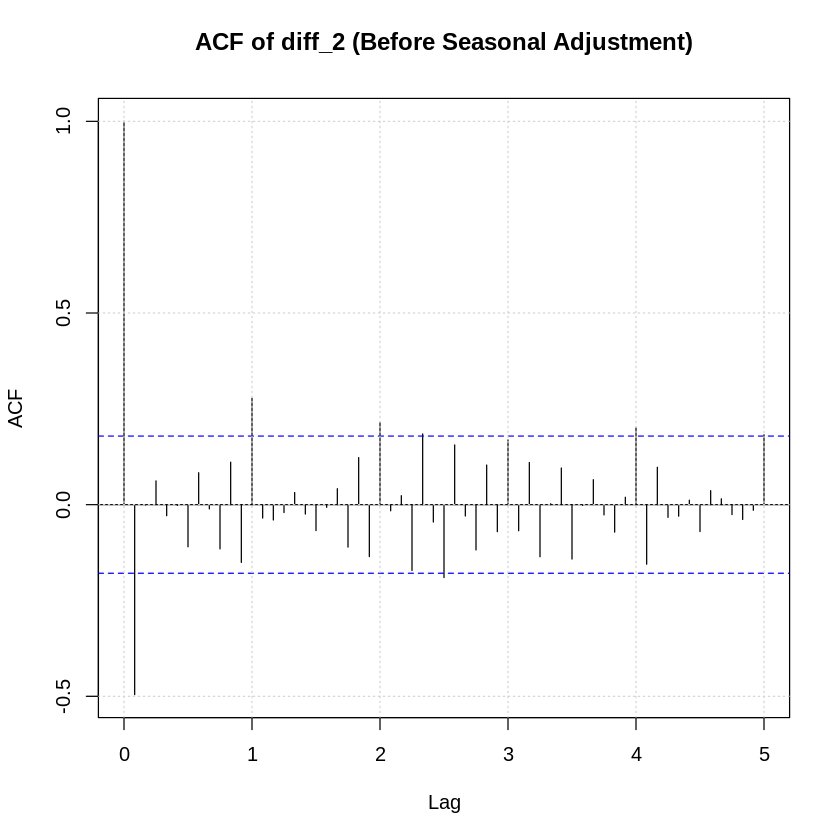

In [71]:
acf(D2_SVM,lag.max = 60,na.action = na.pass,main = "ACF of diff_2 (Before Seasonal Adjustment)")
acf(D2_SVM, lag.max = 60, plot = FALSE)

grid(col = "lightgray", lty = "dotted")



Partial autocorrelations of series ‘D2_SVM’, by lag

0.0833 0.1667 0.2500 0.3333 0.4167 0.5000 0.5833 0.6667 0.7500 0.8333 0.9167 
-0.496 -0.327 -0.149 -0.090 -0.059 -0.214 -0.159 -0.124 -0.274 -0.221 -0.479 
1.0000 1.0833 1.1667 1.2500 1.3333 1.4167 1.5000 1.5833 1.6667 1.7500 1.8333 
-0.258 -0.068  0.061 -0.001  0.046  0.068  0.085  0.016 -0.011 -0.110  0.030 
1.9167 2.0000 2.0833 2.1667 2.2500 2.3333 2.4167 2.5000 2.5833 2.6667 2.7500 
-0.134 -0.034  0.012  0.199 -0.088  0.027  0.090 -0.106  0.034  0.068 -0.002 
2.8333 2.9167 3.0000 3.0833 3.1667 3.2500 3.3333 3.4167 3.5000 3.5833 3.6667 
 0.053 -0.041 -0.043 -0.053  0.066  0.011 -0.079 -0.030 -0.028 -0.053 -0.068 
3.7500 3.8333 3.9167 4.0000 4.0833 4.1667 4.2500 4.3333 4.4167 4.5000 4.5833 
 0.110 -0.028 -0.019  0.098  0.003 -0.030  0.007  0.013 -0.046 -0.109 -0.023 
4.6667 4.7500 4.8333 4.9167 5.0000 
 0.031  0.086  0.081 -0.025 -0.042 

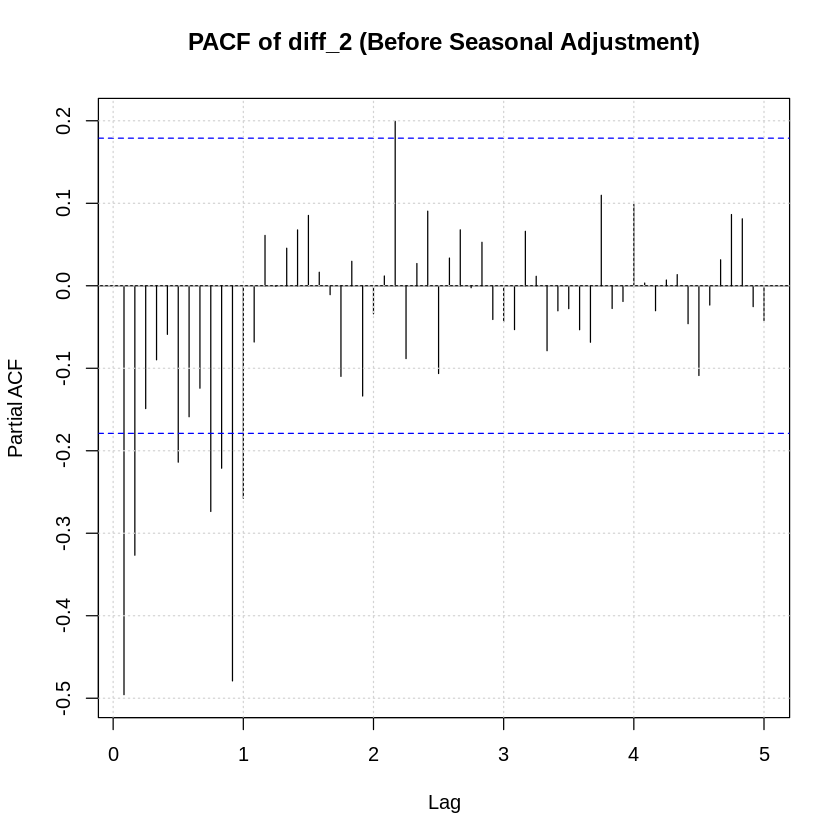

In [182]:
pacf(D2_SVM,lag.max = 60,na.action = na.pass,main = "PACF of diff_2 (Before Seasonal Adjustment)")
pacf(D2_SVM, lag.max = 60, plot = FALSE)

grid(col = "lightgray", lty = "dotted")


#ACF and PACF DESEASONAL SVM DATA



Autocorrelations of series ‘KhuMua_SVM’, by lag

0.0000 0.0833 0.1667 0.2500 0.3333 0.4167 0.5000 0.5833 0.6667 0.7500 0.8333 
 1.000  0.149  0.062  0.139 -0.049 -0.030 -0.006  0.044 -0.084  0.021  0.046 
0.9167 1.0000 1.0833 1.1667 1.2500 1.3333 1.4167 1.5000 1.5833 1.6667 1.7500 
-0.048  0.056 -0.022 -0.170 -0.119 -0.120 -0.163 -0.019 -0.096 -0.017  0.017 
1.8333 1.9167 2.0000 2.0833 2.1667 2.2500 2.3333 2.4167 2.5000 2.5833 2.6667 
 0.028 -0.103 -0.093 -0.027 -0.043 -0.019  0.082 -0.064 -0.189 -0.006 -0.041 
2.7500 2.8333 2.9167 3.0000 3.0833 3.1667 3.2500 3.3333 3.4167 3.5000 3.5833 
-0.019  0.069 -0.023  0.118  0.019  0.192  0.062  0.053  0.141 -0.072 -0.049 
3.6667 3.7500 3.8333 3.9167 4.0000 4.0833 4.1667 4.2500 4.3333 4.4167 4.5000 
 0.059  0.099  0.088  0.116  0.075 -0.039  0.014 -0.059 -0.109 -0.023  0.001 
4.5833 4.6667 4.7500 4.8333 4.9167 5.0000 
-0.073 -0.005 -0.055 -0.076 -0.053 -0.028 

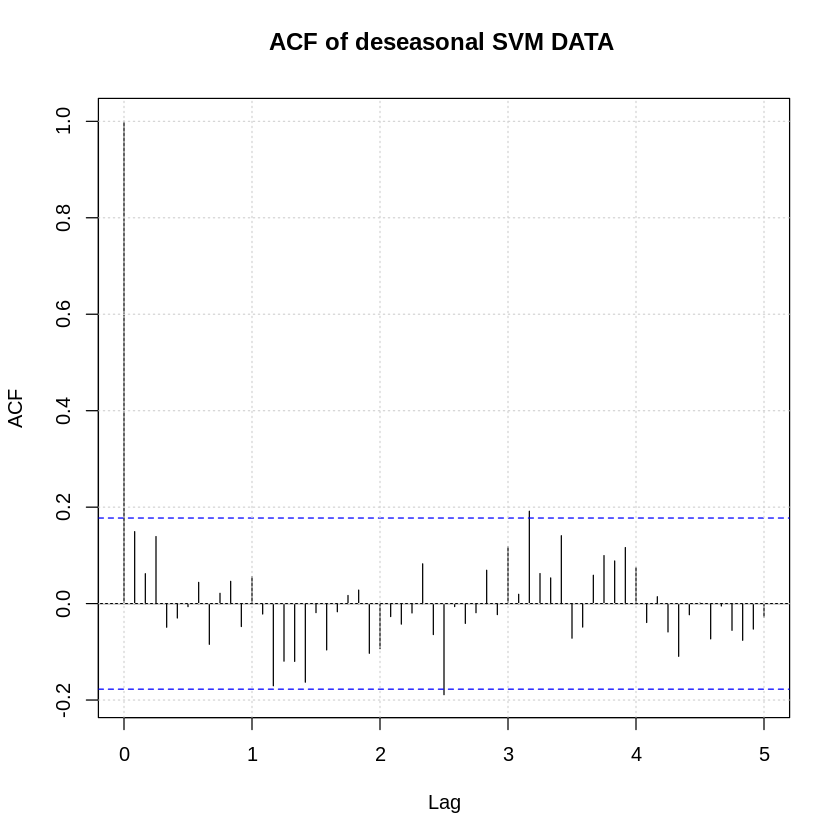

In [73]:
acf(KhuMua_SVM,lag.max = 60,na.action = na.pass,main = "ACF of deseasonal SVM DATA ")
acf(KhuMua_SVM, lag.max = 60, plot = FALSE)

grid(col = "lightgray", lty = "dotted")


Partial autocorrelations of series ‘KhuMua_SVM’, by lag

0.0833 0.1667 0.2500 0.3333 0.4167 0.5000 0.5833 0.6667 0.7500 0.8333 0.9167 
 0.149  0.041  0.127 -0.092 -0.022 -0.012  0.071 -0.103  0.046  0.026 -0.028 
1.0000 1.0833 1.1667 1.2500 1.3333 1.4167 1.5000 1.5833 1.6667 1.7500 1.8333 
 0.047 -0.046 -0.163 -0.081 -0.081 -0.095  0.043 -0.114  0.039  0.007  0.026 
1.9167 2.0000 2.0833 2.1667 2.2500 2.3333 2.4167 2.5000 2.5833 2.6667 2.7500 
-0.143 -0.066 -0.042  0.049 -0.031  0.069 -0.126 -0.237 -0.040 -0.052 -0.015 
2.8333 2.9167 3.0000 3.0833 3.1667 3.2500 3.3333 3.4167 3.5000 3.5833 3.6667 
 0.015 -0.061  0.145 -0.045  0.133 -0.050  0.005  0.080 -0.055 -0.112  0.039 
3.7500 3.8333 3.9167 4.0000 4.0833 4.1667 4.2500 4.3333 4.4167 4.5000 4.5833 
 0.085  0.015  0.058 -0.052 -0.090  0.030 -0.020  0.004  0.020  0.006  0.042 
4.6667 4.7500 4.8333 4.9167 5.0000 
-0.047 -0.063 -0.060 -0.079 -0.002 

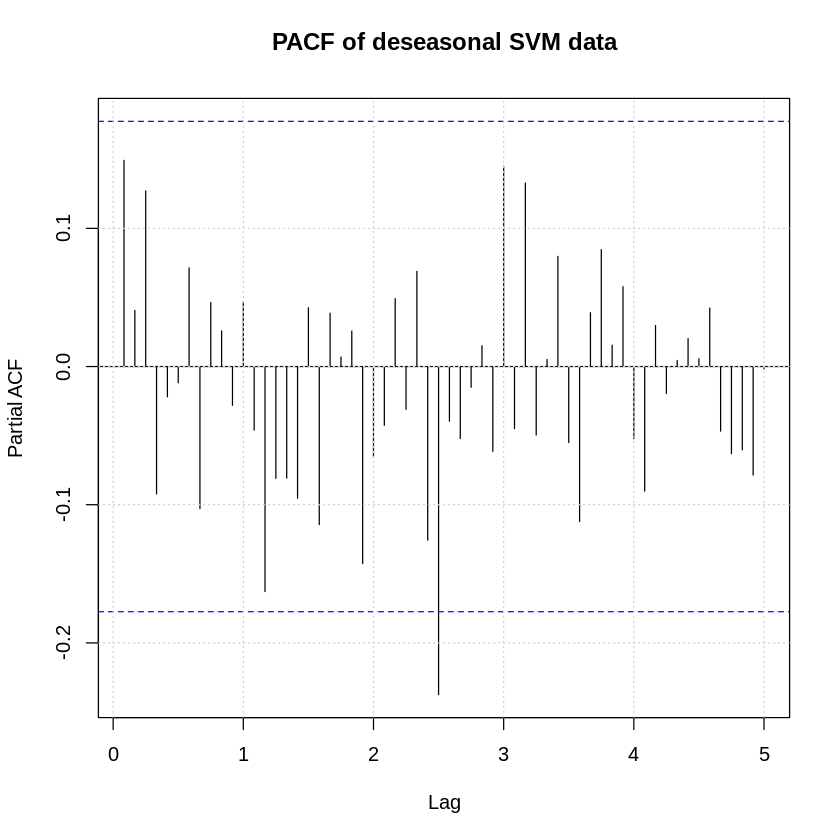

In [74]:
pacf(KhuMua_SVM,lag.max = 60,na.action = na.pass,main = "PACF of deseasonal SVM data")
pacf(KhuMua_SVM, lag.max = 60, plot = FALSE)

grid(col = "lightgray", lty = "dotted")


#Build models LI

In [75]:
MH1_LI <- Arima(DL_LI,
             order = c(1,1,1),
             seasonal = list(order = c(1,2,1), period = 12),
             include.constant = FALSE)

In [76]:
MH2_LI <- Arima(DL_LI,
             order = c(1,1,2),
             seasonal = list(order = c(1,2,1), period = 12),
             include.constant = FALSE)

In [77]:
MH3_LI <- Arima(DL_LI,
             order = c(1,1,4),
             seasonal = list(order = c(1,2,1), period = 12),
             include.constant = FALSE)

In [78]:
MH4_LI <- Arima(DL_LI,
             order = c(2,1,1),
             seasonal = list(order = c(1,2,1), period = 12),
             include.constant = FALSE)

In [79]:
MH5_LI <- Arima(DL_LI,
             order = c(2,1,2),
             seasonal = list(order = c(1,2,1), period = 12),
             include.constant = FALSE)

In [80]:
MH6_LI <- Arima(DL_LI,
             order = c(2,1,4),
             seasonal = list(order = c(1,2,1), period = 12),
             include.constant = FALSE)

In [81]:
MH7_LI <- Arima(DL_LI,
             order = c(1,1,1),
             seasonal = list(order = c(1,2,3), period = 12),
             include.constant = FALSE)

In [82]:
MH8_LI <- Arima(DL_LI,
             order = c(1,1,2),
             seasonal = list(order = c(1,2,3), period = 12),
             include.constant = FALSE)

In [83]:
MH9_LI <- Arima(DL_LI,
             order = c(1,1,4),
             seasonal = list(order = c(1,2,3), period = 12),
             include.constant = FALSE)

In [84]:
MH10_LI <- Arima(DL_LI,
             order = c(2,1,1),
             seasonal = list(order = c(1,2,3), period = 12),
             include.constant = FALSE)

In [85]:
MH11_LI <- Arima(DL_LI,
             order = c(2,1,2),
             seasonal = list(order = c(1,2,3), period = 12),
             include.constant = FALSE)

In [86]:
MH12_LI <- Arima(DL_LI,
             order = c(2,1,4),
             seasonal = list(order = c(1,2,3), period = 12),
             include.constant = FALSE)

In [87]:
AIC(MH1_LI,MH2_LI,MH3_LI,MH4_LI,MH5_LI,MH6_LI,MH7_LI,MH8_LI,MH9_LI,MH10_LI,MH11_LI,MH12_LI)
BIC(MH1_LI,MH2_LI,MH3_LI,MH4_LI,MH5_LI,MH6_LI,MH7_LI,MH8_LI,MH9_LI,MH10_LI,MH11_LI,MH12_LI)


df AIC     
MH1_LI   5 403.8976
MH2_LI   6 405.1186
MH3_LI   8 406.4282
MH4_LI   6 404.9988
MH5_LI   7 406.2751
MH6_LI   9 403.6362
MH7_LI   7 396.5362
MH8_LI   8 397.9784
MH9_LI  10 400.0685
MH10_LI  8 398.5062
MH11_LI  9 400.1895
MH12_LI 11 394.7674

df BIC     
MH1_LI   5 416.7711
MH2_LI   6 420.5668
MH3_LI   8 427.0259
MH4_LI   6 420.4471
MH5_LI   7 424.2981
MH6_LI   9 426.8086
MH7_LI   7 414.5592
MH8_LI   8 418.5760
MH9_LI  10 425.8156
MH10_LI  8 419.1039
MH11_LI  9 423.3619
MH12_LI 11 423.0893

## MH12_LI, MH7_LI

In [88]:
Box.test(MH12_LI$residuals, lag=20,type = "Ljung-Box")
Box.test(MH7_LI$residuals, lag=20,type = "Ljung-Box")


	Box-Ljung test

data:  MH12_LI$residuals
X-squared = 16.875, df = 20, p-value = 0.6611



	Box-Ljung test

data:  MH7_LI$residuals
X-squared = 26.051, df = 20, p-value = 0.1641


In [89]:
tsdiag(MH12_LI)
tsdiag(MH7_LI)

In [90]:
checkresiduals(MH12_LI)
checkresiduals(MH7_LI)


	Ljung-Box test

data:  Residuals from ARIMA(2,1,4)(1,2,3)[12]
Q* = 19.175, df = 14, p-value = 0.1584

Model df: 10.   Total lags used: 24




	Ljung-Box test

data:  Residuals from ARIMA(1,1,1)(1,2,3)[12]
Q* = 31.154, df = 18, p-value = 0.02763

Model df: 6.   Total lags used: 24



###MH12LI

##AUTO LI

In [91]:
fit_auto_LI = auto.arima(DL_LI,
                    seasonal=TRUE,
                    stepwise=FALSE,
                    approximation=FALSE,
                    lambda="auto")

In [92]:
fit_auto_LI

Series: DL_LI 
ARIMA(0,0,1)(0,1,1)[12] 
Box Cox transformation: lambda= 1.999927 

Coefficients:
         ma1     sma1
      0.2550  -0.7568
s.e.  0.0991   0.1081

sigma^2 = 157.7:  log likelihood = -438.53
AIC=883.07   AICc=883.29   BIC=891.17

In [93]:
Box.test(fit_auto_LI$residuals, lag=20,type = "Ljung-Box")


	Box-Ljung test

data:  fit_auto_LI$residuals
X-squared = 24.108, df = 20, p-value = 0.2377


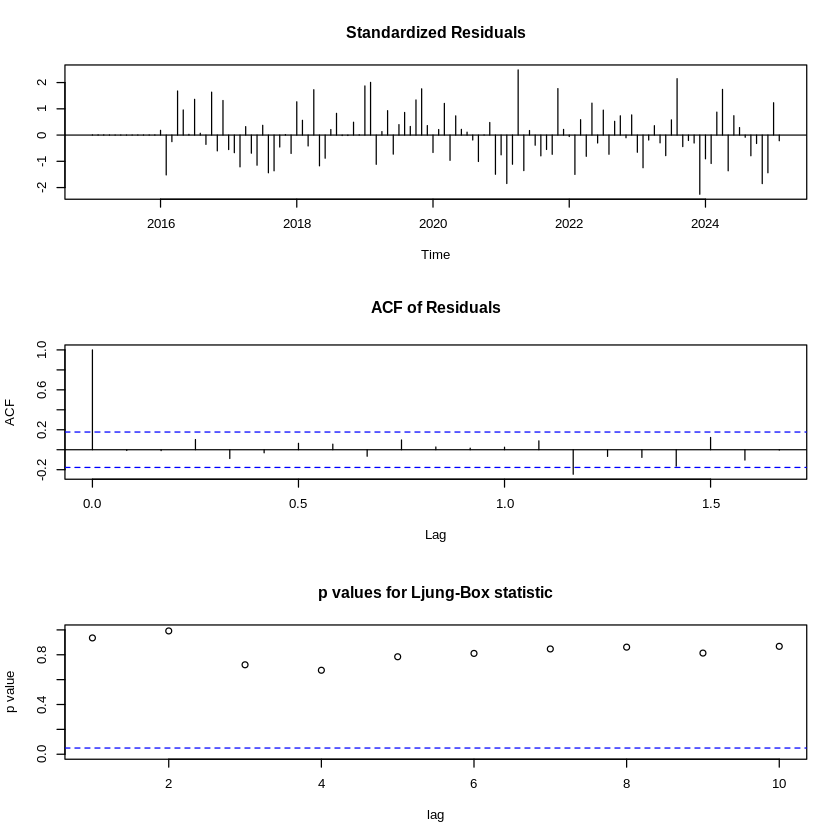

In [94]:
tsdiag(fit_auto_LI)


	Ljung-Box test

data:  Residuals from ARIMA(0,0,1)(0,1,1)[12]
Q* = 28.976, df = 22, p-value = 0.1456

Model df: 2.   Total lags used: 24



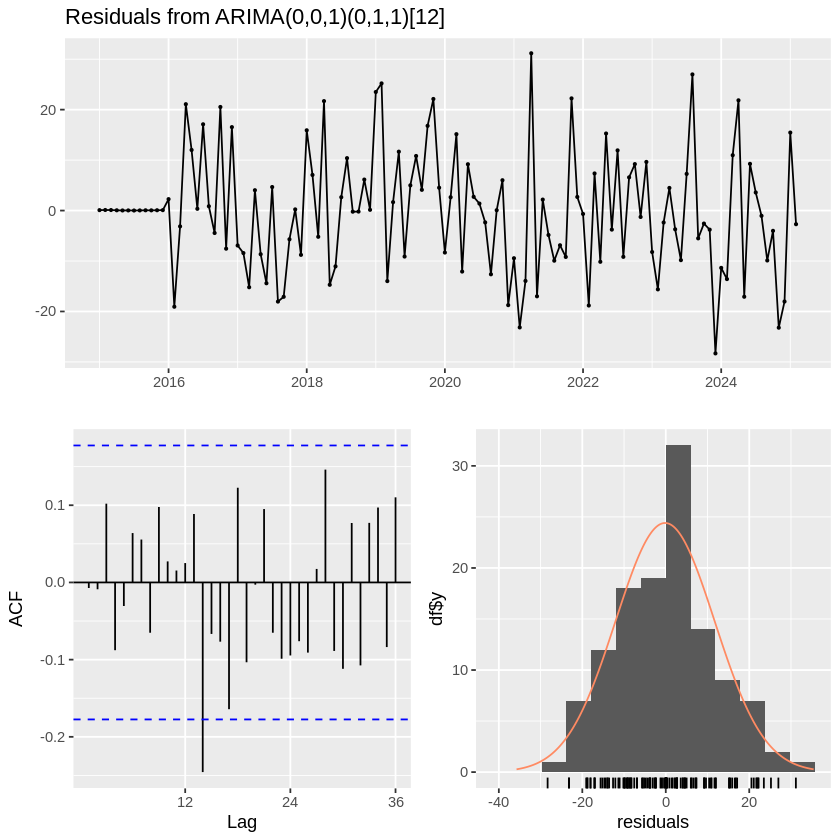

In [95]:
checkresiduals(fit_auto_LI)

#Build models KNN

In [96]:
MH1_KNN <- Arima(DL_KNN,
             order = c(1,1,1),
             seasonal = list(order = c(1,2,1), period = 12),
             include.constant = FALSE)

In [97]:
MH2_KNN <- Arima(DL_KNN,
             order = c(1,1,2),
             seasonal = list(order = c(1,2,1), period = 12),
             include.constant = FALSE)

In [98]:
MH3_KNN <- Arima(DL_KNN,
             order = c(2,1,1),
             seasonal = list(order = c(1,2,1), period = 12),
             include.constant = FALSE)

In [99]:
MH4_KNN <- Arima(DL_KNN,
             order = c(2,1,2),
             seasonal = list(order = c(1,2,1), period = 12),
             include.constant = FALSE)

In [100]:
MH5_KNN <- Arima(DL_KNN,
             order = c(1,1,1),
             seasonal = list(order = c(1,2,3), period = 12),
             include.constant = FALSE)

In [101]:
MH6_KNN <- Arima(DL_KNN,
             order = c(1,1,2),
             seasonal = list(order = c(1,2,3), period = 12),
             include.constant = FALSE)

In [102]:
MH7_KNN <- Arima(DL_KNN,
             order = c(2,1,1),
             seasonal = list(order = c(1,2,3), period = 12),
             include.constant = FALSE)

In [103]:
MH8_KNN <- Arima(DL_KNN,
             order = c(2,1,2),
             seasonal = list(order = c(1,2,3), period = 12),
             include.constant = FALSE)

In [104]:
AIC(MH1_KNN,MH2_KNN,MH3_KNN,MH4_KNN,MH5_KNN,MH6_KNN,MH7_KNN,MH8_KNN)
BIC(MH1_KNN,MH2_KNN,MH3_KNN,MH4_KNN,MH5_KNN,MH6_KNN,MH7_KNN,MH8_KNN)


df AIC     
MH1_KNN 5  403.9299
MH2_KNN 6  404.1031
MH3_KNN 6  404.6329
MH4_KNN 7  405.8634
MH5_KNN 7  396.3857
MH6_KNN 8  396.9649
MH7_KNN 8  398.2016
MH8_KNN 9  397.8561

df BIC     
MH1_KNN 5  416.8035
MH2_KNN 6  419.5514
MH3_KNN 6  420.0811
MH4_KNN 7  423.8864
MH5_KNN 7  414.4087
MH6_KNN 8  417.5626
MH7_KNN 8  418.7992
MH8_KNN 9  421.0285

##MH5_KNN

In [105]:
Box.test(MH5_KNN$residuals, lag=20,type = "Ljung-Box")


	Box-Ljung test

data:  MH5_KNN$residuals
X-squared = 26.145, df = 20, p-value = 0.1611


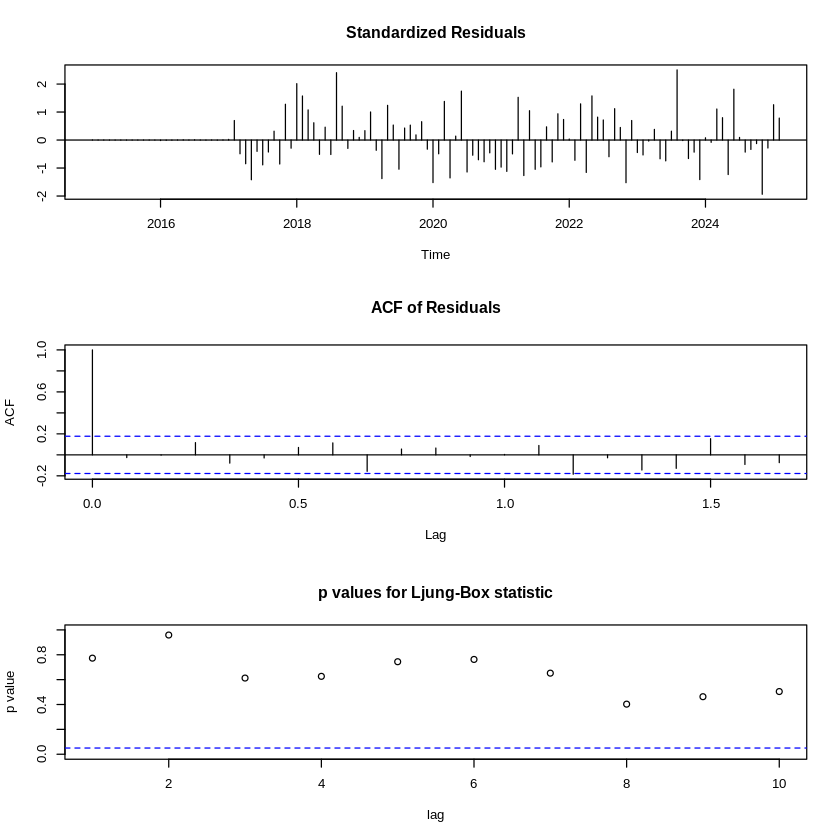

In [106]:
tsdiag(MH5_KNN)


	Ljung-Box test

data:  Residuals from ARIMA(1,1,1)(1,2,3)[12]
Q* = 30.876, df = 18, p-value = 0.02975

Model df: 6.   Total lags used: 24



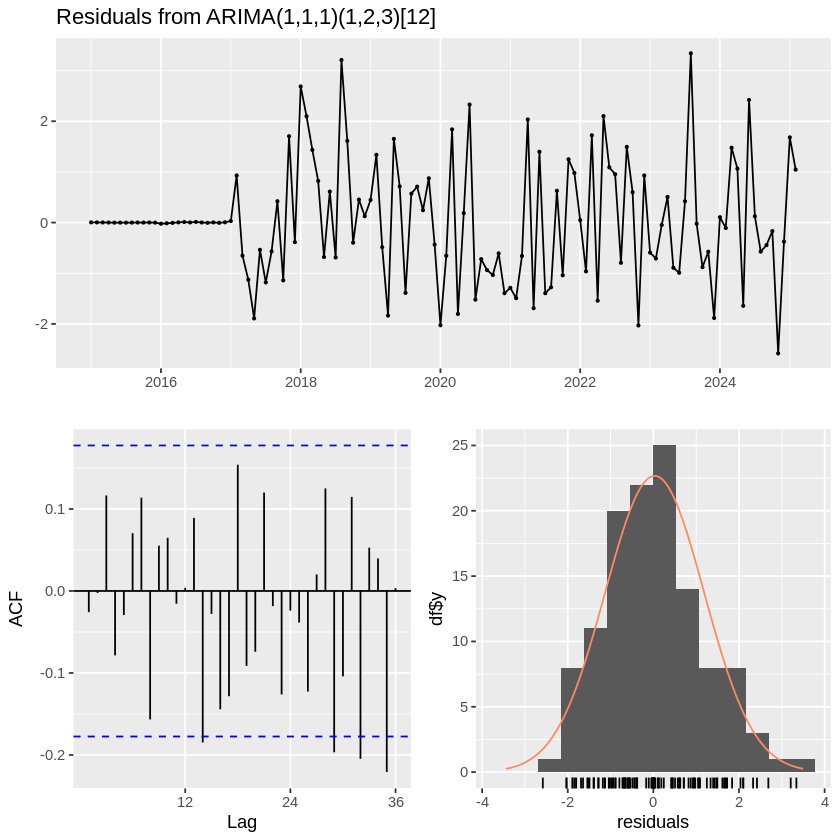

In [107]:
checkresiduals(MH5_KNN)

##auto KNN

In [108]:
fit_auto_knn = auto.arima(DL_KNN,
                    seasonal=TRUE,
                    stepwise=FALSE,
                    approximation=FALSE,
                    lambda="auto")

In [109]:
fit_auto_knn

Series: DL_KNN 
ARIMA(0,0,1)(0,1,1)[12] 
Box Cox transformation: lambda= 1.999927 

Coefficients:
         ma1     sma1
      0.2299  -0.7752
s.e.  0.0971   0.1114

sigma^2 = 154.9:  log likelihood = -437.93
AIC=881.87   AICc=882.09   BIC=889.97

In [110]:
Box.test(fit_auto_knn$residuals, lag=20,type = "Ljung-Box")


	Box-Ljung test

data:  fit_auto_knn$residuals
X-squared = 25.544, df = 20, p-value = 0.1814


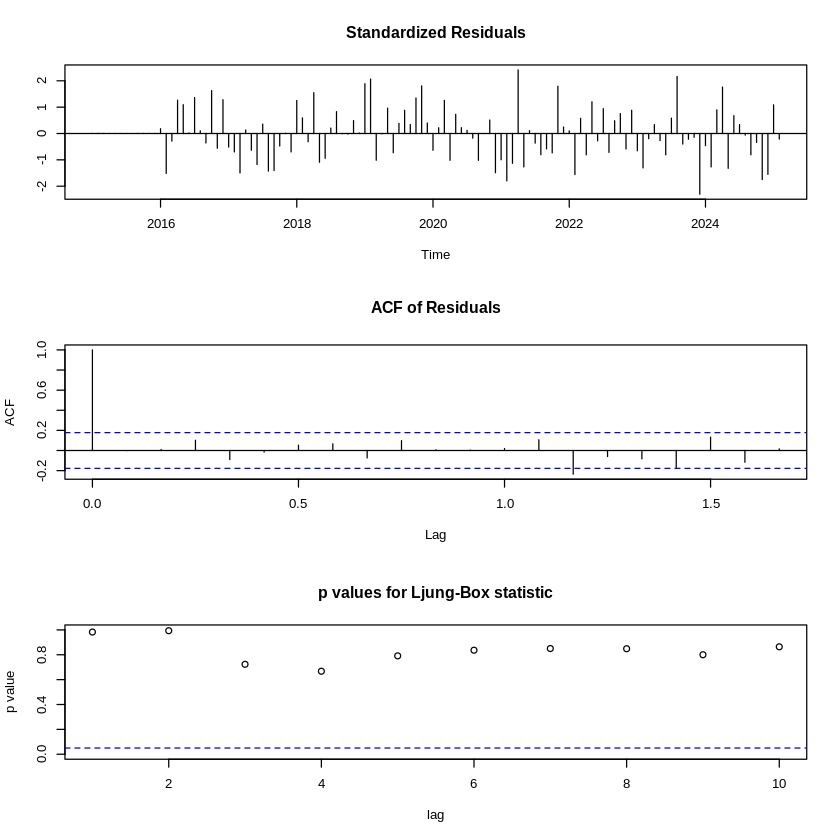

In [111]:
tsdiag(fit_auto_knn)


	Ljung-Box test

data:  Residuals from ARIMA(0,0,1)(0,1,1)[12]
Q* = 30.601, df = 22, p-value = 0.1046

Model df: 2.   Total lags used: 24



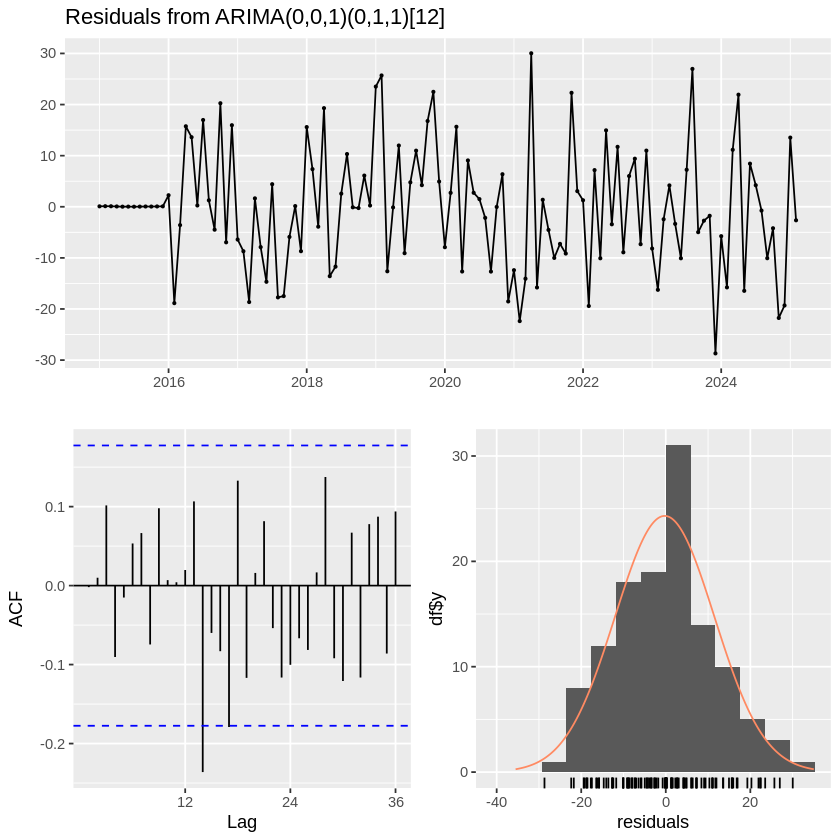

In [112]:
checkresiduals(fit_auto_knn)

#Build models SVM


In [113]:
MH1_SVM <- Arima(DL_SVM,
             order = c(3,1,1),
             seasonal = list(order = c(1,2,1), period = 12),
             include.constant = FALSE)

In [114]:
MH2_SVM <- Arima(DL_SVM,
             order = c(3,1,3),
             seasonal = list(order = c(1,2,1), period = 12),
             include.constant = FALSE)

In [115]:
MH3_SVM <- Arima(DL_SVM,
             order = c(3,1,4),
             seasonal = list(order = c(1,2,1), period = 12),
             include.constant = FALSE)

In [116]:
MH4_SVM <- Arima(DL_SVM,
             order = c(3,1,1),
             seasonal = list(order = c(1,2,2), period = 12),
             include.constant = FALSE)

In [117]:
MH5_SVM <- Arima(DL_SVM,
             order = c(3,1,3),
             seasonal = list(order = c(1,2,1), period = 12),
             include.constant = FALSE)

In [118]:
MH6_SVM <- Arima(DL_SVM,
             order = c(3,1,4),
             seasonal = list(order = c(1,2,1), period = 12),
             include.constant = FALSE)

In [119]:
MH7_SVM <- Arima(DL_SVM,
             order = c(3,1,1),
             seasonal = list(order = c(3,2,1), period = 12),
             include.constant = FALSE)

In [121]:
MH8_SVM <- Arima(DL_SVM,
             order = c(3,1,3),
             seasonal = list(order = c(3,2,1), period = 12),
             include.constant = FALSE)

ERROR: Error in optim(init[mask], armafn, method = optim.method, hessian = TRUE, : initial value in 'vmmin' is not finite


In [122]:
MH9_SVM <- Arima(DL_SVM,
             order = c(3,1,4),
             seasonal = list(order = c(3,2,1), period = 12),
             include.constant = FALSE)

ERROR: Error in optim(init[mask], armafn, method = optim.method, hessian = TRUE, : non-finite finite-difference value [2]


In [123]:
MH10_SVM <- Arima(DL_SVM,
             order = c(3,1,1),
             seasonal = list(order = c(3,2,2), period = 12),
             include.constant = FALSE)

In [125]:
MH11_SVM <- Arima(DL_SVM,
             order = c(3,1,3),
             seasonal = list(order = c(3,2,2), period = 12),
             include.constant = FALSE)

ERROR: Error in optim(init[mask], armafn, method = optim.method, hessian = TRUE, : non-finite finite-difference value [9]


In [124]:
MH12_SVM <- Arima(DL_SVM,
             order = c(3,1,4),
             seasonal = list(order = c(3,2,2), period = 12),
             include.constant = FALSE)

In [126]:
AIC(MH1_SVM,MH2_SVM,MH3_SVM,MH4_SVM,MH5_SVM,MH6_SVM,MH7_SVM,MH10_SVM,MH12_SVM)
BIC(MH1_SVM,MH2_SVM,MH3_SVM,MH4_SVM,MH5_SVM,MH6_SVM,MH7_SVM,MH10_SVM,MH12_SVM)


df AIC     
MH1_SVM   7 438.4607
MH2_SVM   9 440.4581
MH3_SVM  10 437.7422
MH4_SVM   8 433.3571
MH5_SVM   9 440.4581
MH6_SVM  10 437.7422
MH7_SVM   9 437.4898
MH10_SVM 10 436.5763
MH12_SVM 13 440.1262

df BIC     
MH1_SVM   7 456.4837
MH2_SVM   9 463.6305
MH3_SVM  10 463.4894
MH4_SVM   8 453.9548
MH5_SVM   9 463.6305
MH6_SVM  10 463.4894
MH7_SVM   9 460.6622
MH10_SVM 10 462.3234
MH12_SVM 13 473.5974

##MH4_SVM

In [127]:
Box.test(MH4_SVM$residuals, lag=20,type = "Ljung-Box")


	Box-Ljung test

data:  MH4_SVM$residuals
X-squared = 16.45, df = 20, p-value = 0.6884


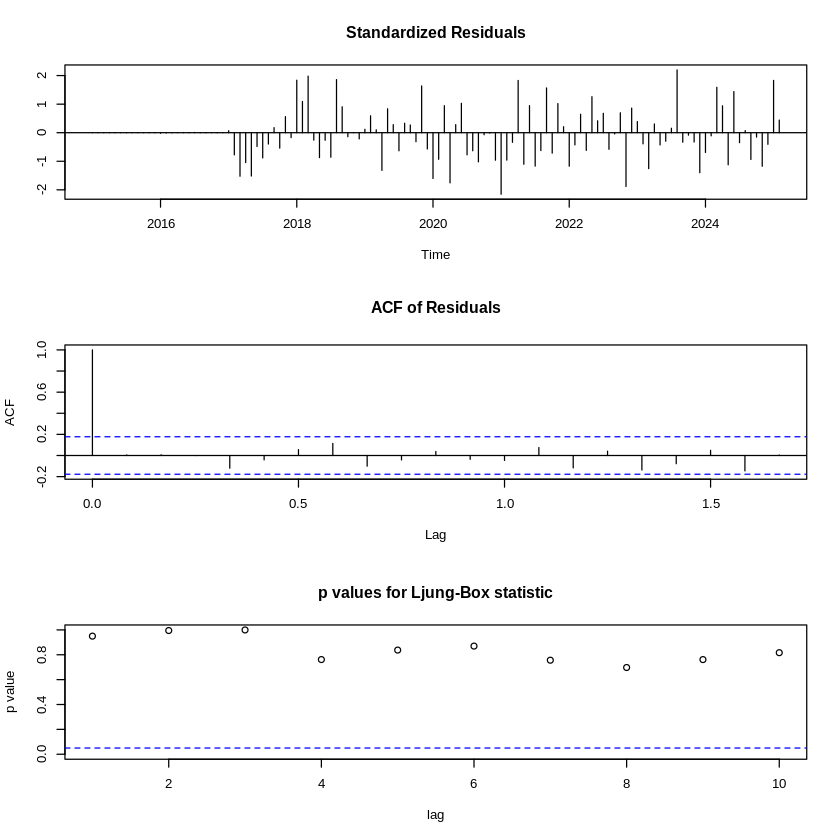

In [128]:
tsdiag(MH4_SVM)


	Ljung-Box test

data:  Residuals from ARIMA(3,1,1)(1,2,2)[12]
Q* = 19.627, df = 17, p-value = 0.2937

Model df: 7.   Total lags used: 24



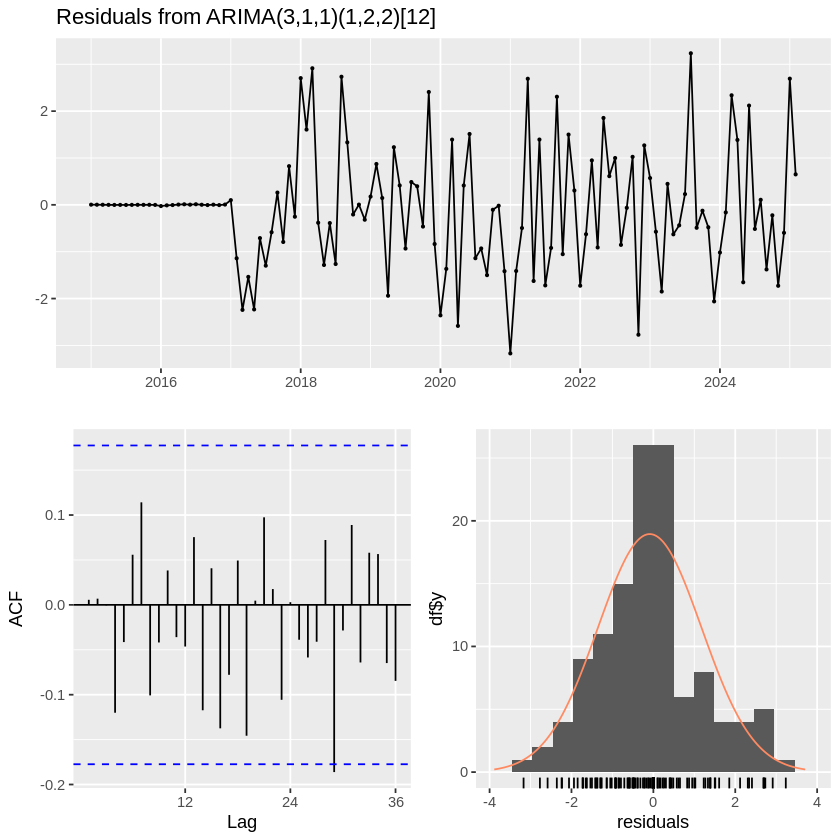

In [129]:
checkresiduals(MH4_SVM)

##auto SVM


In [130]:
fit_auto_SVM = auto.arima(DL_SVM,
                    seasonal=TRUE,
                    stepwise=FALSE,
                    approximation=FALSE,
                    lambda="auto")

In [131]:
fit_auto_SVM

Series: DL_SVM 
ARIMA(1,0,1)(2,1,0)[12] 
Box Cox transformation: lambda= 1.54581 

Coefficients:
          ar1     ma1     sar1     sar2
      -0.5574  0.7728  -0.6115  -0.2492
s.e.   0.2803  0.2230   0.0997   0.1065

sigma^2 = 30.19:  log likelihood = -343.98
AIC=697.96   AICc=698.54   BIC=711.47

In [132]:
Box.test(fit_auto_SVM$residuals, lag=20,type = "Ljung-Box")


	Box-Ljung test

data:  fit_auto_SVM$residuals
X-squared = 14.503, df = 20, p-value = 0.8041


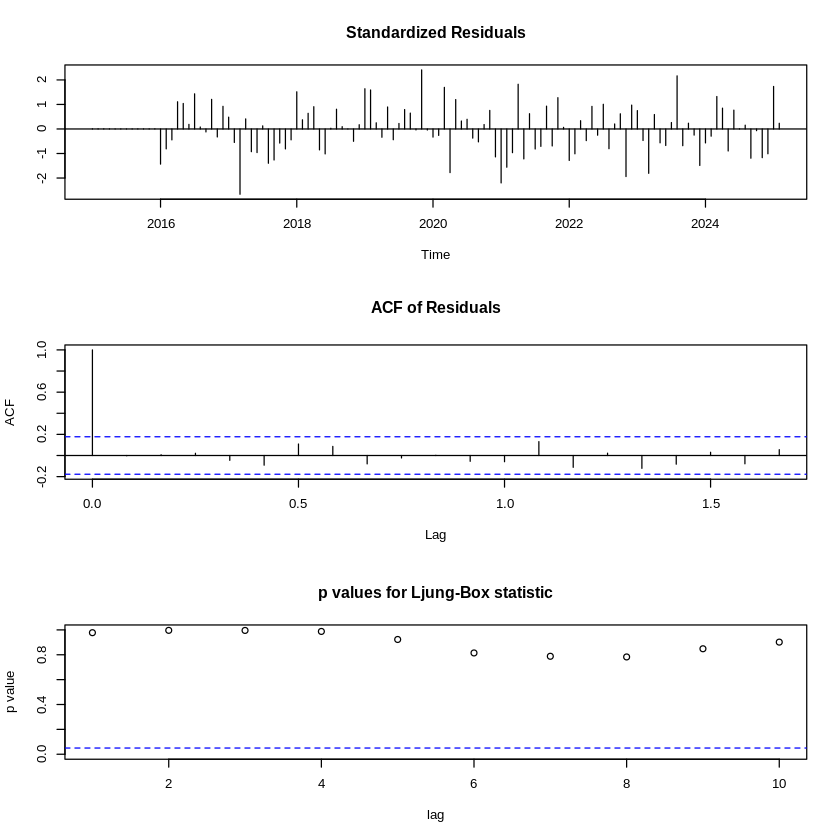

In [133]:
tsdiag(fit_auto_SVM)


	Ljung-Box test

data:  Residuals from ARIMA(1,0,1)(2,1,0)[12]
Q* = 22.12, df = 20, p-value = 0.334

Model df: 4.   Total lags used: 24



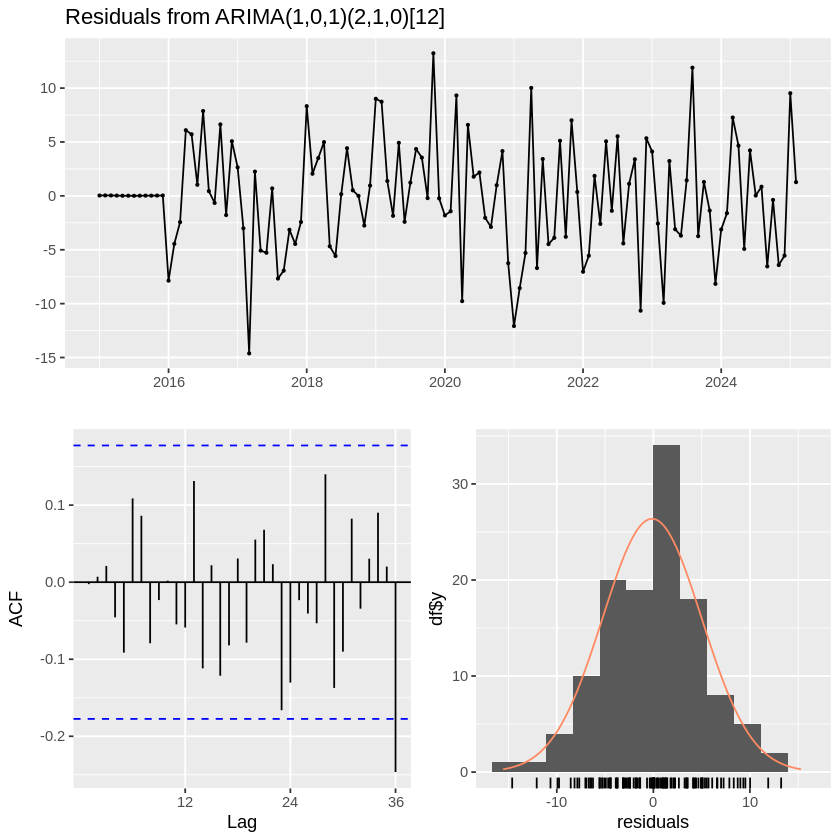

In [134]:
checkresiduals(fit_auto_SVM)

#FORECAST LI

In [135]:
predmh12_li <- forecast(MH12_LI, h = 4)
predmh12_li

         Point Forecast     Lo 80     Hi 80     Lo 95     Hi 95
Mar 2025      12.953598 11.298018 14.609178 10.421607 15.485590
Apr 2025      13.650651 11.934994 15.366308 11.026781 16.274522
May 2025       7.629508  5.880679  9.378337  4.954905 10.304111
Jun 2025       5.152634  3.372488  6.932779  2.430135  7.875132

In [136]:
forecast::accuracy(predmh12_li, test)

ME         RMSE      MAE       MPE        MAPE     MASE     
Training set 0.03237375 1.0182143 0.7624220 -0.1521538 8.057303 0.5981060
Test set     0.70590223 0.8162536 0.7059022  7.6118008 7.611801 0.5537673
             ACF1         Theil's U
Training set  0.007620135        NA
Test set     -0.716139607 0.1953748

In [137]:
pred_autoli <- forecast(fit_auto_LI, h = 4)
pred_autoli

         Point Forecast     Lo 80     Hi 80     Lo 95     Hi 95
Mar 2025      13.092414 11.797888 14.269993 11.051398 14.855630
Apr 2025      12.865355 11.500648 14.098583 10.708045 14.709624
May 2025       7.522319  4.830577  9.478231  2.394417 10.365297
Jun 2025       5.902348  1.260186  8.251597 -4.001562  9.256954

In [138]:
forecast::accuracy(pred_autoli, test)

ME          RMSE      MAE      MPE       MAPE      MASE     
Training set -0.05131583 1.1632793 0.900991 -2.048849 10.127781 0.7068108
Test set      0.70689102 0.8733962 0.793065  5.834062  7.337972 0.6221449
             ACF1        Theil's U
Training set -0.03017883        NA
Test set     -0.19963177 0.2048059

#COMPARE (LI)

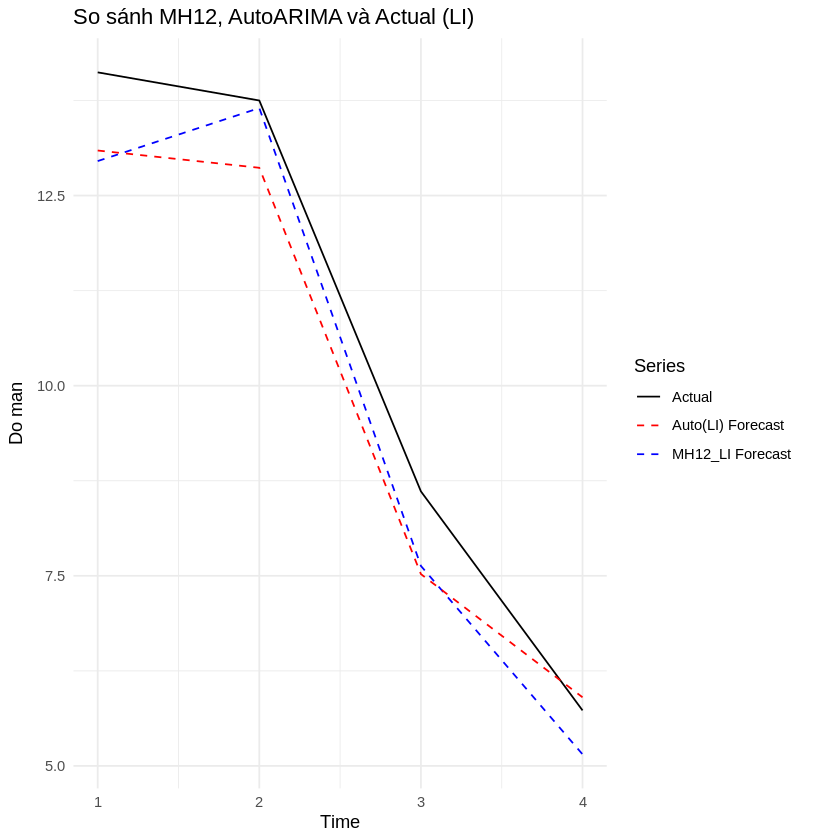

In [139]:
autoplot(ts(test), series = "Actual") +
  autolayer(ts(predmh12_li$mean), series = "MH12_LI Forecast", linetype = "dashed") +
  autolayer(ts(pred_autoli$mean), series = "Auto(LI) Forecast", linetype = "dashed") +
  ggtitle("So sánh MH12, AutoARIMA và Actual (LI)") +
  ylab("Do man") +
  theme_minimal() +
  scale_color_manual(values = c(
    "Actual" = "black",
    "MH12_LI Forecast" = "blue",
    "Auto(LI) Forecast" = "red"
  )) +
  guides(color = guide_legend(title = "Series"))


#FORECAST KNN

In [140]:
pred_autoknn <- forecast(fit_auto_knn, h = 4)
pred_autoknn

         Point Forecast     Lo 80     Hi 80     Lo 95     Hi 95
Mar 2025      13.087496 11.804104 14.255822 11.064626 14.837105
Apr 2025      12.840062 11.492959 14.058682 10.711491 14.662842
May 2025       7.539072  4.905111  9.466564  2.590248 10.342523
Jun 2025       5.920246  1.507623  8.235721 -3.882915  9.229241

In [141]:
forecast::accuracy(pred_autoknn, test)

ME          RMSE      MAE       MPE       MAPE     MASE     
Training set -0.05965309 1.1511257 0.8904016 -2.120762 10.00682 0.6992267
Test set      0.70578097 0.8770877 0.8009039  5.762024  7.42211 0.6289447
             ACF1        Theil's U
Training set -0.02019909        NA
Test set     -0.17142504 0.2060015

#COMPARE (KNN)

In [142]:
autoplot(ts(test), series = "Actual") +
  autolayer(ts(pred_autoknn$mean), series = "Auto(KNN) Forecast", linetype = "dashed") +
  ggtitle("So sánhAuto(KNN) và Actual (KNN)") +
  ylab("Do man") +
  theme_minimal() +
  scale_color_manual(values = c(
    "Actual" = "black",
    "Auto(KNN) Forecast" = "red"
  )) +
  guides(color = guide_legend(title = "Series"))


#FORECAST (SVM)

In [143]:
predmh4_svm <- forecast(MH4_SVM, h = 4)
predmh4_svm

         Point Forecast     Lo 80     Hi 80     Lo 95     Hi 95
Mar 2025      12.019859  9.933949 14.105768  8.829735 15.209982
Apr 2025      13.575533 11.438331 15.712735 10.306965 16.844101
May 2025       7.581140  5.447184  9.715095  4.317537 10.844743
Jun 2025       4.950612  2.783443  7.117781  1.636213  8.265011

In [144]:
forecast::accuracy(predmh4_svm, test)

ME          RMSE     MAE       MPE       MAPE      MASE     
Training set -0.08888984 1.263584 0.9196046 -1.730965  9.577028 0.6040404
Test set      1.02071411 1.235620 1.0207141 10.423463 10.423463 0.6704540
             ACF1         Theil's U
Training set  0.005618824        NA
Test set     -0.475521134 0.2350988

In [145]:
pred_autosvm <- forecast(fit_auto_SVM, h = 4)
pred_autosvm

         Point Forecast     Lo 80     Hi 80     Lo 95     Hi 95
Mar 2025      12.154092 10.270981 13.889374  9.194230 14.761239
Apr 2025      13.188698 11.355119 14.892237 10.316394 15.751947
May 2025       7.415180  4.695446  9.666322  2.827562 10.746910
Jun 2025       5.643471  2.155299  8.177546 -1.887661  9.354273

In [146]:
forecast::accuracy(pred_autosvm, test)

ME          RMSE     MAE       MPE       MAPE      MASE     
Training set -0.05356486 1.434819 1.1204825 -2.194814 12.176478 0.7359867
Test set      0.95213989 1.184793 0.9521399  8.348071  8.348071 0.6254112
             ACF1        Theil's U
Training set -0.02360638        NA
Test set     -0.35256692 0.1912853

#COMPARE SVMI

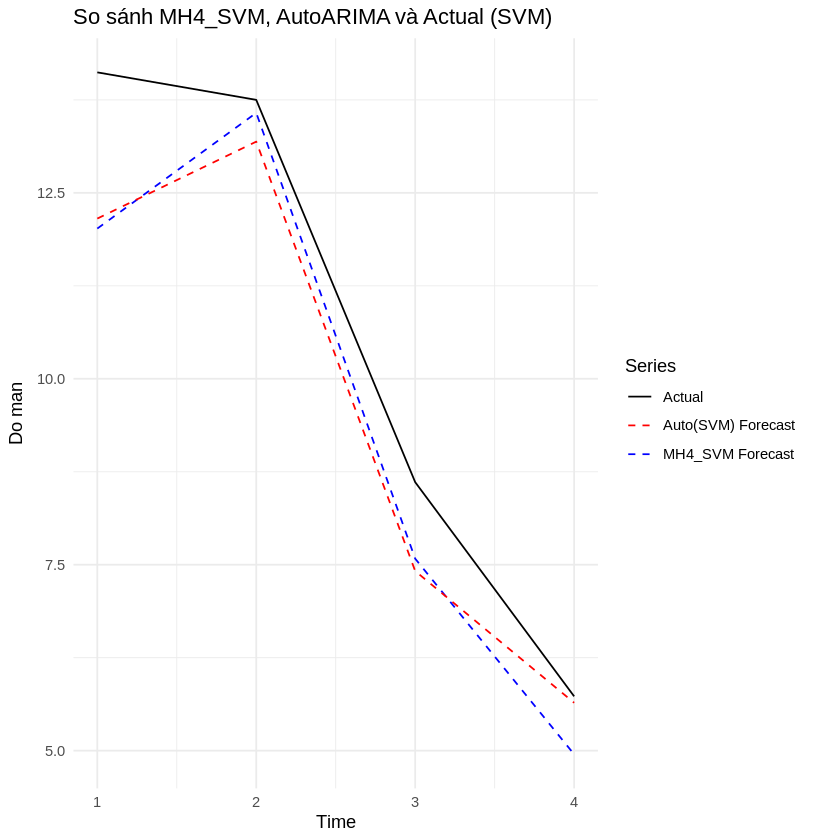

In [147]:
autoplot(ts(test), series = "Actual") +
  autolayer(ts(predmh4_svm$mean), series = "MH4_SVM Forecast", linetype = "dashed") +
  autolayer(ts(pred_autosvm$mean), series = "Auto(SVM) Forecast", linetype = "dashed") +
  ggtitle("So sánh MH4_SVM, AutoARIMA và Actual (SVM)") +
  ylab("Do man") +
  theme_minimal() +
  scale_color_manual(values = c(
    "Actual" = "black",
    "MH4_SVM Forecast" = "blue",
    "Auto(SVM) Forecast" = "red"
  )) +
  guides(color = guide_legend(title = "Series"))


#XGBOOST


##XGBOOST LI

In [148]:
re_sarima_li <- residuals(pred_autoli)
re_sarima_li

Jan           Feb           Mar           Apr           May          
2015   0.082821405   0.111981666   0.101442935   0.053053942   0.020106092
2016   2.263557048 -19.061336548  -3.138111454  21.083044816  12.006780226
2017  -6.925347542  -8.419428490 -15.197860784   4.032507225  -8.659273350
2018  15.909650808   7.060225595  -5.198724805  21.693608326 -14.713758416
2019  23.502185786  25.203762558 -13.982705631   1.663791766  11.672482441
2020  -8.321485543   2.641578837  15.141612770 -12.088775241   9.180638287
2021  -9.445970789 -23.165398950 -13.947937597  31.174224492 -16.994932639
2022  -0.672639637 -18.820559163   7.353872704 -10.153314398  15.272750843
2023  -8.208507070 -15.621423536  -2.362178247   4.483802584  -3.707782437
2024 -11.357763070 -13.581269875  10.973867604  21.848737098 -17.081155947
2025  15.458376404  -2.703166250                                          
     Jun           Jul           Aug           Sep           Oct          
2015   0.028757911   0.009941632   0.028149206   0.052229313   0.041173153
2016   0.347677703  17.098808749   0.856299079  -4.445910075  20.532369055
2017 -14.408425452   4.663533633 -18.039913783 -17.089449669  -5.697426964
2018 -11.064457949   2.643541640  10.391001754  -0.220266950  -0.199956480
2019  -9.114886261   4.992046394  10.817234723   4.108157370  16.796711990
2020   2.724810680   1.385529749  -2.346873369 -12.632269449   0.071516637
2021   2.173655922  -4.845736104  -9.934164975  -6.877438119  -9.192540472
2022  -3.773951711  11.928024924  -9.173073515   6.576790424   9.209422097
2023  -9.827527931   7.268121538  26.982904322  -5.507858869  -2.576049400
2024   9.259703420   3.582378002  -1.041639590  -9.892902784  -4.018173291
2025                                                                      
     Nov           Dec          
2015   0.063562074   0.082821395
2016  -7.555867545  16.537216789
2017   0.230119454  -8.780733970
2018   6.141815414   0.146743922
2019  22.117852844   4.530508524
2020   6.010726756 -18.745671343
2021  22.233953550   2.700675708
2022  -1.269539672   9.638331828
2023  -3.784637549 -28.311268319
2024 -23.215002493 -18.030593478
2025

In [149]:
df <- data.table(
residual = as.numeric(re_sarima_li)
)

In [150]:
df[, `:=`(
  lag1 = shift(residual, 1),
  lag2 = shift(residual, 2),
  lag3 = shift(residual, 3)
)]
df <- na.omit(df)

In [151]:
train_matrix <- as.matrix(df[, .(lag1, lag2, lag3)])
train_label <- df$residual

dtrain <- xgb.DMatrix(data = train_matrix, label = train_label)


In [152]:
params <- list(objective = "reg:squarederror", max_depth = 3, eta = 0.1)
xgb_model <- xgb.train(params = params, data = dtrain, nrounds = 100)
residual_forecast_li <- c()
lag_vals <- tail(re_sarima_li, 3)
for (i in 1:4) {
  input_matrix <- matrix(lag_vals[(length(lag_vals)-2):length(lag_vals)], nrow = 1)
  colnames(input_matrix) <- c("lag1", "lag2", "lag3")
  pred <- predict(xgb_model, input_matrix)

  residual_forecast_li <- c(residual_forecast_li, pred)
  lag_vals <- c(lag_vals, pred)
}


In [153]:
sarima_auto_li <- as.numeric(pred_autoli$mean)
print(pred_autoli)

         Point Forecast     Lo 80     Hi 80     Lo 95     Hi 95
Mar 2025      13.092414 11.797888 14.269993 11.051398 14.855630
Apr 2025      12.865355 11.500648 14.098583 10.708045 14.709624
May 2025       7.522319  4.830577  9.478231  2.394417 10.365297
Jun 2025       5.902348  1.260186  8.251597 -4.001562  9.256954


In [154]:
hybrid_forecast_li <- sarima_auto_li + residual_forecast_li

In [155]:
print(data.frame(
  Month = seq(as.Date("2025-03-01"), by = "month", length.out = 8),
  SARIMA = sarima_auto_li,
  Residual = residual_forecast_li,
  Hybrid = hybrid_forecast_li,
  Actual = as.numeric(test)
))


       Month    SARIMA   Residual    Hybrid Actual
1 2025-03-01 13.092414 -0.2954535 12.796961  14.12
2 2025-04-01 12.865355 -1.5468889 11.318466  13.75
3 2025-05-01  7.522319 -5.3366857  2.185634   8.61
4 2025-06-01  5.902348 -9.6893148 -3.786967   5.73
5 2025-07-01 13.092414 -0.2954535 12.796961  14.12
6 2025-08-01 12.865355 -1.5468889 11.318466  13.75
7 2025-09-01  7.522319 -5.3366857  2.185634   8.61
8 2025-10-01  5.902348 -9.6893148 -3.786967   5.73


##XGBOOST KNN

In [156]:
re_sarima_knn <- residuals(pred_autoknn)
re_sarima_knn

Jan           Feb           Mar           Apr           May          
2015   0.082821404   0.111981668   0.101442938   0.059607167   0.020106091
2016   2.256431171 -18.856005124  -3.589531115  15.749200055  13.608523538
2017  -6.410923989  -8.701607748 -18.642156611   1.644869461  -7.896185142
2018  15.592925178   7.361478987  -3.896582955  19.297940007 -13.580102660
2019  23.515254289  25.693747976 -12.624490143  -0.126481903  11.983433090
2020  -7.913184329   2.726589005  15.652453883 -12.664990590   9.065119665
2021 -12.405817788 -22.370072799 -14.071520879  30.032749121 -15.792551936
2022   1.270641356 -19.414905852   7.172794085 -10.080892309  14.952500658
2023  -8.168657098 -16.247692674  -2.441494270   4.178152231  -3.341200088
2024  -5.751917878 -15.774074301  11.150582769  21.932607614 -16.447951297
2025  13.532527568  -2.645844973                                          
     Jun           Jul           Aug           Sep           Oct          
2015   0.028757912   0.009941633   0.028149207   0.052229314   0.041173154
2016   0.250768019  16.977444860   1.267435237  -4.481448568  20.256887741
2017 -14.673773998   4.414686984 -17.730134692 -17.477006825  -5.900896659
2018 -11.718060246   2.562566586  10.317462318  -0.108523224  -0.252178745
2019  -9.082302615   4.776062863  10.978115261   4.229289258  16.783228519
2020   2.736891661   1.499776181  -2.164720130 -12.678156052  -0.028683227
2021   1.369991055  -4.528057111 -10.006973108  -7.259622562  -9.149403383
2022  -3.429457764  11.727040260  -8.911738312   6.009578679   9.405214924
2023 -10.079273554   7.242885831  26.973439413  -4.968763486  -2.723636257
2024   8.434697723   4.211078598  -0.740164639 -10.066304938  -4.204407904
2025                                                                      
     Nov           Dec          
2015   0.063562075   0.082821396
2016  -6.956238765  15.957912818
2017   0.134366284  -8.692595663
2018   6.103000699   0.238656081
2019  22.486766236   4.937244393
2020   6.366466544 -18.523839067
2021  22.298557612   3.061788461
2022  -7.321322821  10.987773142
2023  -1.767260052 -28.690236444
2024 -21.756970092 -19.309463559
2025

In [157]:
df <- data.table(
residual = as.numeric(re_sarima_knn)
)

In [158]:
df[, `:=`(
  lag1 = shift(residual, 1),
  lag2 = shift(residual, 2),
  lag3 = shift(residual, 3)
)]
df <- na.omit(df)

In [159]:
train_matrix <- as.matrix(df[, .(lag1, lag2, lag3)])
train_label <- df$residual

dtrain <- xgb.DMatrix(data = train_matrix, label = train_label)

In [160]:
params <- list(objective = "reg:squarederror", max_depth = 3, eta = 0.1)
xgb_model <- xgb.train(params = params, data = dtrain, nrounds = 100)
residual_forecast_knn <- c()
lag_vals <- tail(re_sarima_knn, 3)
for (i in 1:4) {
  input_matrix <- matrix(lag_vals[(length(lag_vals)-2):length(lag_vals)], nrow = 1)
  colnames(input_matrix) <- c("lag1", "lag2", "lag3")
  pred <- predict(xgb_model, input_matrix)

  residual_forecast_knn <- c(residual_forecast_knn, pred)
  lag_vals <- c(lag_vals, pred)
}


In [161]:
sarima_auto_knn<- as.numeric(pred_autoknn$mean)
print(pred_autoknn)

         Point Forecast     Lo 80     Hi 80     Lo 95     Hi 95
Mar 2025      13.087496 11.804104 14.255822 11.064626 14.837105
Apr 2025      12.840062 11.492959 14.058682 10.711491 14.662842
May 2025       7.539072  4.905111  9.466564  2.590248 10.342523
Jun 2025       5.920246  1.507623  8.235721 -3.882915  9.229241


In [162]:
hybrid_forecast_knn <- sarima_auto_knn + residual_forecast_knn

In [163]:
print(data.frame(
  Month = seq(as.Date("2025-03-01"), by = "month", length.out = 8),
  SARIMA = sarima_auto_knn,
  Residual = residual_forecast_knn,
  Hybrid = hybrid_forecast_knn,
  Actual = as.numeric(test)
))


       Month    SARIMA   Residual     Hybrid Actual
1 2025-03-01 13.087496  -3.796897  9.2905987  14.12
2 2025-04-01 12.840062  -5.222239  7.6178238  13.75
3 2025-05-01  7.539072 -14.263289 -6.7242176   8.61
4 2025-06-01  5.920246  -6.096279 -0.1760328   5.73
5 2025-07-01 13.087496  -3.796897  9.2905987  14.12
6 2025-08-01 12.840062  -5.222239  7.6178238  13.75
7 2025-09-01  7.539072 -14.263289 -6.7242176   8.61
8 2025-10-01  5.920246  -6.096279 -0.1760328   5.73


##XGBOOST SVM

In [164]:
re_sarima_svm <- residuals(pred_autosvm)
re_sarima_svm

Jan           Feb           Mar           Apr           May          
2015   0.033091504   0.041898952   0.038783757   0.024976584   0.010811895
2016  -7.869161201  -4.451842168  -2.436225231   6.093076974   5.712066165
2017   2.643581761  -3.011576346 -14.619677410   2.252157184  -5.080363434
2018   8.324782077   2.054845558   3.507423666   4.988455736  -4.680665747
2019   9.010551487   8.735384972   1.377804392  -1.849118945   4.923189886
2020  -1.812930458  -1.431438306   9.318878504  -9.768225069   6.586302952
2021 -12.079953245  -8.559703036  -5.304103341  10.016668945  -6.698359259
2022  -7.040918658  -5.556715340   1.852777778  -2.602003715   5.060801069
2023   4.112587762  -2.571117815  -9.928905059   3.233952946  -3.098937322
2024  -3.119015726  -1.606389355   7.270566564   4.662569627  -4.922667576
2025   9.526384076   1.274278866                                          
     Jun           Jul           Aug           Sep           Oct          
2015   0.014378155   0.006128702   0.014135966   0.023041689   0.019102267
2016   1.029302703   7.871923560   0.439420763  -0.655501575   6.631893391
2017  -5.279350731   0.693415005  -7.672561271  -6.941199886  -3.148936404
2018  -5.578129354   0.158627904   4.423112456   0.515596582  -0.002661250
2019  -2.406180107   1.229495787   4.347333116   3.553385427  -0.209166172
2020   1.778317360   2.169300932  -2.040479644  -2.884732338   0.989513152
2021   3.419705393  -4.477378660  -3.891947416   5.112221036  -3.798761603
2022  -1.386403208   5.528864804  -4.412189278   1.119176363   3.396730972
2023  -3.692341776   1.440272941  11.895136106  -3.740952122   1.290217348
2024   4.218212011   0.032459111   0.849602360  -6.543333923  -0.376314472
2025                                                                      
     Nov           Dec          
2015   0.026888404   0.033091501
2016  -1.782342707   5.071637168
2017  -4.462577567  -2.427996788
2018  -2.756028499   0.952663299
2019  13.232588330  -0.229946007
2020   4.155022656  -6.249585818
2021   7.011023164   0.364020450
2022 -10.653507037   5.343775179
2023  -1.364362706  -8.164431259
2024  -6.419121509  -5.548700137
2025

In [165]:
df <- data.table(
residual = as.numeric(re_sarima_svm)
)

In [166]:
df[, `:=`(
  lag1 = shift(residual, 1),
  lag2 = shift(residual, 2),
  lag3 = shift(residual, 3)
)]
df <- na.omit(df)

In [167]:
train_matrix <- as.matrix(df[, .(lag1, lag2, lag3)])
train_label <- df$residual

dtrain <- xgb.DMatrix(data = train_matrix, label = train_label)

In [168]:
params <- list(objective = "reg:squarederror", max_depth = 3, eta = 0.1)
xgb_model <- xgb.train(params = params, data = dtrain, nrounds = 100)
residual_forecast_svm <- c()
lag_vals <- tail(re_sarima_svm, 3)
for (i in 1:4) {
  input_matrix <- matrix(lag_vals[(length(lag_vals)-2):length(lag_vals)], nrow = 1)
  colnames(input_matrix) <- c("lag1", "lag2", "lag3")
  pred <- predict(xgb_model, input_matrix)

  residual_forecast_svm <- c(residual_forecast_svm, pred)
  lag_vals <- c(lag_vals, pred)
}


In [169]:
sarima_auto_svm <- as.numeric(pred_autosvm$mean)
print(sarima_auto_svm)

[1] 12.154092 13.188698  7.415180  5.643471


In [170]:
hybrid_forecast_svm <- sarima_auto_svm + residual_forecast_svm

In [171]:
print(data.frame(
  Month = seq(as.Date("2025-03-01"), by = "month", length.out = 8),
  SARIMA = sarima_auto_svm,
  Residual = residual_forecast_svm,
  Hybrid = hybrid_forecast_svm,
  Actual = as.numeric(test)
))


       Month    SARIMA   Residual    Hybrid Actual
1 2025-03-01 12.154092  4.7547712 16.908863  14.12
2 2025-04-01 13.188698 -2.6961238 10.492574  13.75
3 2025-05-01  7.415180  1.9936807  9.408860   8.61
4 2025-06-01  5.643471 -0.7007927  4.942679   5.73
5 2025-07-01 12.154092  4.7547712 16.908863  14.12
6 2025-08-01 13.188698 -2.6961238 10.492574  13.75
7 2025-09-01  7.415180  1.9936807  9.408860   8.61
8 2025-10-01  5.643471 -0.7007927  4.942679   5.73


#COMPARE FORECAST

In [172]:
sarima_auto_li_ts <- ts(sarima_auto_li,
                     start = start(test),
                     frequency = frequency(test))
sarima_auto_knn_ts <- ts(sarima_auto_knn,
                     start = start(test),
                     frequency = frequency(test))
sarima_auto_svm_ts <- ts(sarima_auto_svm,
                     start = start(test),
                     frequency = frequency(test))

In [173]:
hybrid_forecast_li_ts <- ts(hybrid_forecast_li,
                         start = start(test),
                         frequency = frequency(test))
hybrid_forecast_knn_ts <- ts(hybrid_forecast_knn,
                         start = start(test),
                         frequency = frequency(test))
hybrid_forecast_svm_ts <- ts(hybrid_forecast_svm,
                         start = start(test),
                         frequency = frequency(test))

In [174]:
forecast::accuracy(sarima_auto_li_ts, test)
forecast::accuracy(hybrid_forecast_li_ts, test)

ME       RMSE      MAE      MPE      MAPE     ACF1       Theil's U
Test set 0.706891 0.8733962 0.793065 5.834062 7.337972 -0.1996318 0.2048059

ME       RMSE     MAE      MPE     MAPE    ACF1     Theil's U
Test set 4.923977 5.905674 4.923977 66.9398 66.9398 0.285163 2.413506

In [175]:
forecast::accuracy(sarima_auto_knn_ts, test)
forecast::accuracy(hybrid_forecast_knn_ts, test)

ME       RMSE      MAE       MPE      MAPE    ACF1      Theil's U
Test set 0.705781 0.8770877 0.8009039 5.762024 7.42211 -0.171425 0.2060015

ME       RMSE     MAE      MPE      MAPE     ACF1       Theil's U
Test set 8.050457 9.095963 8.050457 89.99252 89.99252 -0.3265089 2.746194

In [176]:
forecast::accuracy(sarima_auto_svm_ts, test)
forecast::accuracy(hybrid_forecast_svm_ts, test)

ME        RMSE     MAE       MPE      MAPE     ACF1       Theil's U
Test set 0.9521399 1.184793 0.9521399 8.348071 8.348071 -0.3525669 0.1912853

ME       RMSE     MAE      MPE      MAPE     ACF1       Theil's U
Test set 0.114256 2.216226 1.908118 2.100318 16.61504 -0.6435335 0.5073943

#visual compare

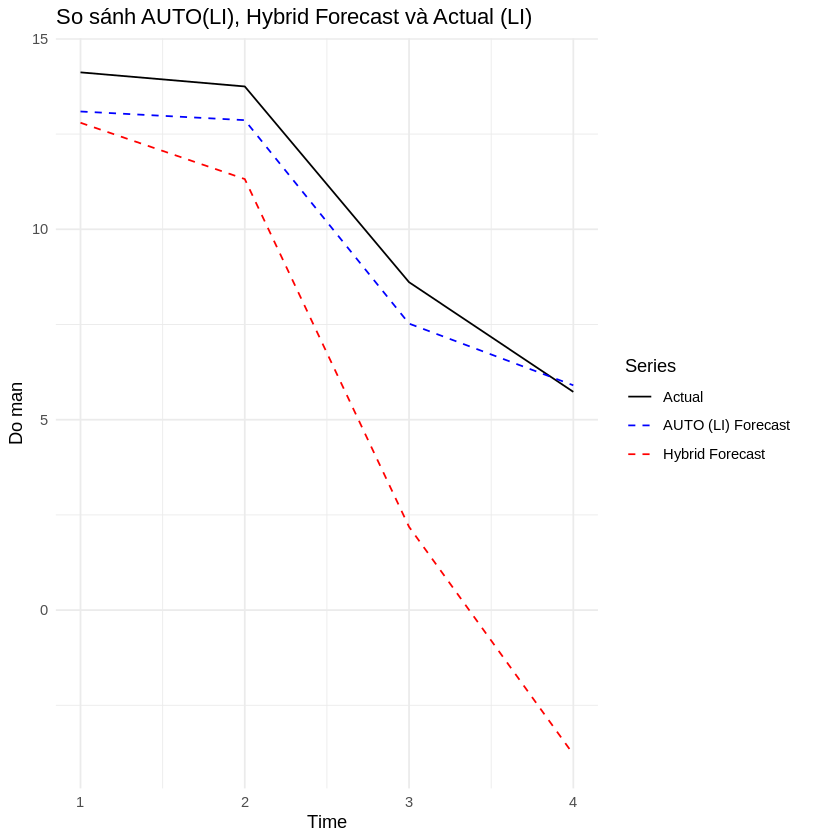

In [177]:
autoplot(ts(test), series = "Actual") +
  autolayer(ts(sarima_auto_li_ts), series = "AUTO (LI) Forecast", linetype = "dashed") +
  autolayer(ts(hybrid_forecast_li_ts), series = "Hybrid Forecast", linetype = "dashed") +
  ggtitle("So sánh AUTO(LI), Hybrid Forecast và Actual (LI)") +
  ylab("Do man") +
  theme_minimal() +
  scale_color_manual(values = c(
    "Actual" = "black",
    "AUTO (LI) Forecast" = "blue",
    "Hybrid Forecast" = "red"
  )) +
  guides(color = guide_legend(title = "Series"))


In [178]:
autoplot(ts(test), series = "Actual") +
  autolayer(ts(sarima_auto_knn_ts), series = "AUTO (KNN) Forecast", linetype = "dashed") +
  autolayer(ts(hybrid_forecast_knn_ts), series = "Hybrid Forecast", linetype = "dashed") +
  ggtitle("So sánh AUTO(KNN), Hybrid Forecast và Actual (KNN)") +
  ylab("Do man") +
  theme_minimal() +
  scale_color_manual(values = c(
    "Actual" = "black",
    "AUTO (KNN) Forecast" = "blue",
    "Hybrid Forecast" = "red"
  )) +
  guides(color = guide_legend(title = "Series"))


In [179]:
autoplot(ts(test), series = "Actual") +
  autolayer(ts(sarima_auto_svm_ts), series = "AUTO (SVM) Forecast", linetype = "dashed") +
  autolayer(ts(hybrid_forecast_svm_ts), series = "Hybrid Forecast", linetype = "dashed") +
  ggtitle("So sánh AUTO(SVM), Hybrid Forecast và Actual (SVM)") +
  ylab("Do man") +
  theme_minimal() +
  scale_color_manual(values = c(
    "Actual" = "black",
    "AUTO (SVM) Forecast" = "blue",
    "Hybrid Forecast" = "red"
  )) +
  guides(color = guide_legend(title = "Series"))


##final compare

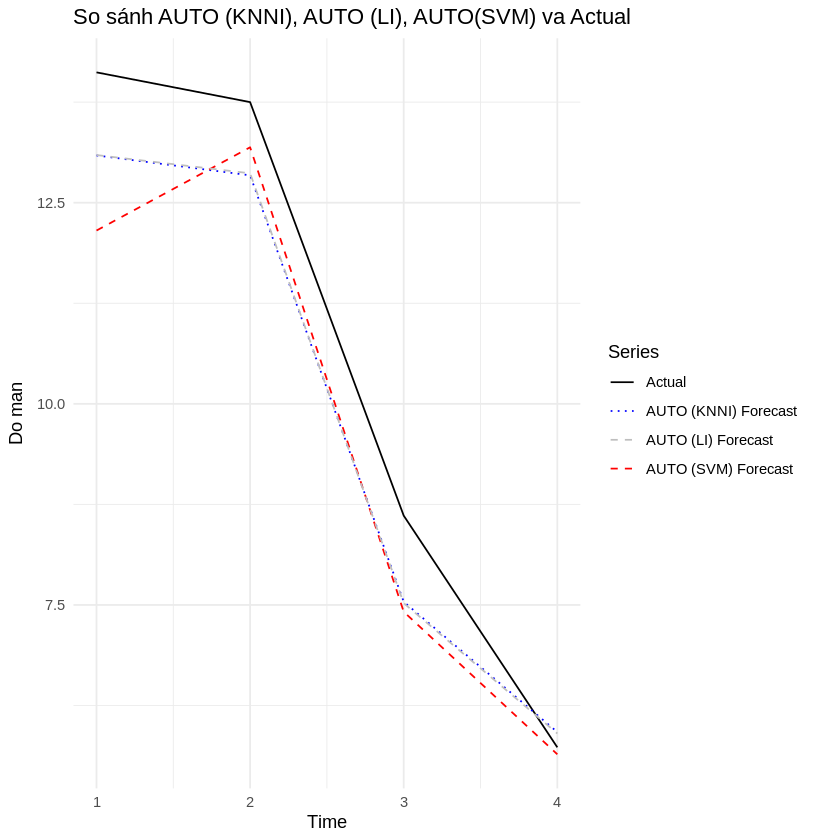

In [191]:
autoplot(ts(test), series = "Actual") +
  autolayer(ts(sarima_auto_knn_ts), series = "AUTO (KNNI) Forecast", linetype = "dotted") +
  autolayer(ts(sarima_auto_svm_ts), series = "AUTO (SVM) Forecast", linetype = "dashed") +
  autolayer(ts(sarima_auto_li_ts), series = "AUTO (LI) Forecast", linetype = "dashed") +

  ggtitle("So sánh AUTO (KNNI), AUTO (LI), AUTO(SVM) va Actual") +
  ylab("Do man") +
  theme_minimal() +
  scale_color_manual(values = c(
    "Actual" = "black",
    "AUTO (SVM) Forecast" = "red",
    "AUTO (KNNI) Forecast" = "blue",
    "AUTO (LI) Forecast" = "grey"

  )) +
  guides(color = guide_legend(title = "Series"))


#FORECAST 12 MONTHS

In [195]:
predmh12_li_12 <- forecast(MH12_LI, h = 12)
predmh12_li_12

         Point Forecast     Lo 80     Hi 80     Lo 95     Hi 95
Mar 2025      12.953598 11.298018 14.609178 10.421607 15.485590
Apr 2025      13.650651 11.934994 15.366308 11.026781 16.274522
May 2025       7.629508  5.880679  9.378337  4.954905 10.304111
Jun 2025       5.152634  3.372488  6.932779  2.430135  7.875132
Jul 2025       7.896593  6.108746  9.684440  5.162317 10.630870
Aug 2025       8.068495  6.281746  9.855244  5.335898 10.801091
Sep 2025       7.557946  5.741269  9.374622  4.779578 10.336313
Oct 2025       9.797872  7.980638 11.615106  7.018652 12.577091
Nov 2025      11.817361  9.997859 13.636864  9.034672 14.600051
Dec 2025      11.820891  9.996026 13.645756  9.030001 14.611781
Jan 2026      12.611376 10.770079 14.452672  9.795356 15.427395
Feb 2026      12.218270 10.380354 14.056186  9.407421 15.029119

In [196]:
autoplot(predmh12_li_12)